The goal of this Notebook is to take the parts of NovemberPhyloProc.ipynb that I expect to go into the actual manuscript.

# Figure Outline

* Figure 1. Antibodies over time.

* Figure 2. Weighted unifrac PCoA

* Table 1. Kernel regression and weighted unifrac 1 test - binomial

* Table S1. Kernel regression and weighted unifrac 1 test - gaussian

* Table S2. Weighted unifrac components 2-N

* Figure S1. Jensen Shannon at different agglomeration levels.

* Figure S2. Statistically significant (p< 0.05, q < 0.2) family genus and species abundances (clr transformed) regressed against weighted unifrac 1.

* Table S3. All family - genus and species vs antibody vs glm scores.

* Figure 3. Stacked bars of key groups ordered by weighted unifrac axis 1.

* Figure S3. Groups associated with IgGs.

* Figure 4. Proportionality heat-map

* Other supplements: The entire data table
    * Basically the components of psN2, except the tree?
    * Or can I just release the input data files?

3/20/2017
Re-ran whole pipeline end-to-end. Hits on everything (including igg gp41 0 day) except only trending on gp41 Month 6.5. However I don't see family level groups for gp41 that relate to community structure (q < 0.2, p < 0.05). I may just try running everything end to end a few more times to see what happens. This because I want to see how consistant (or otherwise) the results are between runs.
Also, I'm going to start setting seeds now.

# Loading libraries, functions and data

## Libraries

In [1]:
# only use library paths in the anaconda environment

#.libPaths(grep('anaconda3', .libPaths(), value = T))

In [2]:
.libPaths()

[1] "/home/ohnoplus/Nyvac_096_Microbiome/packrat/lib/x86_64-pc-linux-gnu/3.4.1"
[2] "/home/ohnoplus/Nyvac_096_Microbiome/packrat/lib-ext"                      
[3] "/home/ohnoplus/Nyvac_096_Microbiome/packrat/lib-R"

In [3]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.1                         
year           2017                        
month          06                          
day            30                          
svn rev        72865                       
language       R                           
version.string R version 3.4.1 (2017-06-30)
nickname       Single Candle               

In [4]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.10

Matrix products: default
BLAS: /home/ohnoplus/R/lib/R/lib/libRblas.so
LAPACK: /home/ohnoplus/R/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.4.1       IRdisplay_0.6        pbdZMQ_0.3-3        
 [4] htmltools_0.3.6      tools_3.4.1          base64enc_0.1-3     
 [7] crayon_1.3.4         Rcpp_0.12.19         uuid_0.1-2          
[10] IRkernel_0.8.13.9000 jsonlite_1.5         digest_0.6.18       
[13] r

In [5]:
# https://stackoverflow.com/questions/46354826/have-a-function-that-calls-library-and-takes-either-a-package-or-its-name-as-inp


# Also return package version when loading in packages
# accept strings or functions
libver <- function(pac){

    pac <- as.character(substitute(pac))
    library(pac, character.only=TRUE)
    packageVersion(pac)
    }

In [6]:
#libver("dada2")
#libver("ggplot2")

In [7]:
libver("Cairo")

[1] ‘1.5.9’

In [8]:
# Much of the data handling
libver('phyloseq')

[1] ‘1.22.3’

In [9]:
# A bunch of environments, including ggplot, dplyr, tidyr, and broom, which I use a lot
libver('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.1.1     ✔ dplyr   0.7.7
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] ‘1.2.1’

In [10]:
# Mostly for concatenating ggplots
library(gridExtra); packageVersion("gridExtra")


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



[1] ‘2.3’

In [11]:
# I use this surprisingly not a lot here.
library(vegan); packageVersion("vegan")

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-3


[1] ‘2.5.3’

In [12]:
# For making trees
# libver('phangorn')

In [13]:
# A prerequesite to phangorn
# libver("DECIPHER")

In [14]:
# Some pre-processing stuff
# libver("dada2")

In [15]:
# I usually reshape with tidyverse tools now, but melt and cast are often easier in a pinch
# libver("reshape2")

In [16]:
# For replacing NaNs without too much thought.
# libver("imputeMissings")

In [17]:
# Deal with proportional data, especially useful for calculating proportionality phi
libver('compositions')

Loading required package: tensorA

Attaching package: ‘tensorA’

The following object is masked from ‘package:base’:

    norm

Loading required package: robustbase
Loading required package: energy
Loading required package: bayesm
Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"


Attaching package: ‘compositions’

The following objects are masked from ‘package:stats’:

    cor, cov, dist, var

The following objects are masked from ‘package:base’:

    %*%, scale, scale.default



[1] ‘1.40.2’

In [18]:
# Works with tidyverse to make model output tidy
libver('broom')

[1] ‘0.5.0’

In [19]:
# Make pretty tables
libver('knitr')
libver('kableExtra')

[1] ‘1.20’

[1] ‘0.9.0’

In [20]:
# Let those pretty tables actually show up in a jupyter notebook
library('IRdisplay')

In [21]:
# For bootstrapping
libver('boot')


Attaching package: ‘boot’

The following object is masked from ‘package:robustbase’:

    salinity

The following object is masked from ‘package:lattice’:

    melanoma



[1] ‘1.3.20’

In [22]:
# Calculate kernel regressions
libver("MiRKAT")

Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:boot’:

    aml

The following object is masked from ‘package:robustbase’:

    heart

Loading required package: PearsonDS
Loading required package: GUniFrac
Loading required package: ape

Attaching package: ‘ape’

The following object is masked from ‘package:compositions’:

    balance

Loading required package: matrixStats

Attaching package: ‘matrixStats’

The following objects are masked from ‘package:robustbase’:

    colMedians, rowMedians

The following object is masked from ‘package:dplyr’:

    count

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



[1] ‘1.0.1’

In [23]:
libver("car")

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:boot’:

    logit

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some



[1] ‘3.0.2’

In [24]:
#libver(mclust)

In [25]:
#libver(chemometrics)

In [26]:
libver(purrrlyr)

[1] ‘0.0.3’

In [27]:
libver('qvalue')

[1] ‘2.10.0’

## Functions

I have put the functions in a library file

In [28]:
source('libraries/library096.R')

## Data

In [29]:
# Set upOriginal to false, if you want to used user-reprocessed data.
# Results may differ slightly from those in the manuscript due to inter-run variation
# especially in the tree-ing algorithm.
 upOriginal <- TRUE
# upOriginal <- FALSE

In [30]:
# For permutation tests, how fast do things need to run
# 9999 for most runs, 99999 for publication quality ones suggested
jnperm <- 9999

In [31]:
# Data paths
getwd()
(mapping_file_path <- file.path('data', 'mapping_file_096a.csv'))
(immune_file_path <- file.path('data', 'immune096b.csv'))

if(upOriginal){
     seqtab_file_path <- file.path('data', 'seqtab.nochimNov2017.csv')
     taxa_file_path <- file.path('data', 'TaxaNov2017.csv')
     tree_path <- file.path('data', 'phylogeny096NovTree.tre')
    } else {
     seqtab_file_path <- file.path('data1', 'seqtab.nochimMar2018.csv')
     taxa_file_path <- file.path('data1', 'TaxaMar2018.csv')
     tree_path <- file.path('data1', 'phylogeny096Mar2018tre.tre')
}

seqtab_file_path
taxa_file_path
tree_path

[1] "/home/ohnoplus/Nyvac_096_Microbiome"

[1] "data/mapping_file_096a.csv"

[1] "data/immune096b.csv"

[1] "data/seqtab.nochimNov2017.csv"

[1] "data/TaxaNov2017.csv"

[1] "data/phylogeny096NovTree.tre"

In [32]:
# Sequence data
seqtab.nochim.data <- read.csv(seqtab_file_path)

seqtabNames = gsub('\\.', '-',
    gsub('.fastq', '', seqtab.nochim.data$X)
                   )

seqtab.nochim = as.matrix(seqtab.nochim.data[,-1])
rownames(seqtab.nochim) = seqtabNames

In [33]:
# Taxa names
taxa.data <- read.csv(taxa_file_path)
taxa = taxa.data[,-1]

## I reverse complemented the sequences to generate the taxonomy
# (but only in this latest re-run, not the original)
## The following undoes that reverse complement to get original sequence
#rownames(taxa) = dada2:::rc(taxa.data[,1]) 

if(upOriginal){
    rownames(taxa) = (taxa.data[,1])} else {
    rownames(taxa) = dada2:::rc(taxa.data[,1]) 
}

taxa <- as.matrix(taxa)

In [34]:
# Mapping file
mapping.data <- read_csv(mapping_file_path) %>%
mutate(pub_id = sapply(pub_id,  function(x) {as.numeric(gsub("096-", "", x))}))
#mapping = mapping.data[,-1]
#rownames(mapping) = mapping.data[,1]
#mapping <- as.matrix(mapping)

Parsed with column specification:
cols(
  SampleID = col_character(),
  BarcodeSequence = col_character(),
  LinkerPrimerSequence = col_character(),
  ReversePrimer = col_character(),
  run_prefix = col_character(),
  pub_id = col_character(),
  Sex = col_character(),
  Visit = col_integer(),
  visitRank = col_integer(),
  RXCode = col_character(),
  Description = col_character()
)


In [35]:
head(mapping.data)

SampleID  BarcodeSequence LinkerPrimerSequence  
1 Sample-57 TTACGC          GCGGACTACCVGGGTATCTAAT
2 Sample-58 TTAGGT          GCGGACTACCVGGGTATCTAAT
3 Sample-60 TTCCAC          GCGGACTACCVGGGTATCTAAT
4 Sample-61 TTGTAC          GCGGACTACCVGGGTATCTAAT
5 Sample-62 TTGTGT          GCGGACTACCVGGGTATCTAAT
6 Sample-63 TATCAC          GCGGACTACCVGGGTATCTAAT
  ReversePrimer                                                    run_prefix
1 GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC JH3VWZ201 
2 GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC JH3VWZ201 
3 GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC JH3VWZ201 
4 GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC JH3VWZ201 
5 GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC JH3VWZ201 
6 GCACTCCTRCGGGAGGCAGCAG,GCACACCTACGGGTGGCTGC,GCACACCTACGGGTGGCAGC JH3VWZ201 
  pub_id Sex    Visit visitRank RXCode
1 282    Male    9    1         T1    
2 282    Male   12    2         T1    
3 176    Female  9    1         T1    
4 176    Female 12    2         T1    
5 123    Female 12    1         T4    
6  49    Female  9    1         T2    
  Description                                                          
1 NYVAC (2) & placebo mo(0,1) + NYVAC (2) & AIDSVAX B/E mo(3,6)        
2 NYVAC (2) & placebo mo(0,1) + NYVAC (2) & AIDSVAX B/E mo(3,6)        
3 NYVAC (2) & placebo mo(0,1) + NYVAC (2) & AIDSVAX B/E mo(3,6)        
4 NYVAC (2) & placebo mo(0,1) + NYVAC (2) & AIDSVAX B/E mo(3,6)        
5 DNA & placebo & AIDSVAX B/E mo(0,1) + NYVAC (2) & AIDSVAX B/E mo(3,6)
6 NYVAC (2) & AIDSVAX B/E mo(0,1,3,6)

In [36]:
# Immune Data
immune.data0 <- read_csv(immune_file_path)
immune.data <- mutate(immune.data0, pub_id = sapply(pub_id,  function(x) {as.numeric(gsub("096-", "", x))}))
levels(immune.data$antigen) <- gsub("[ /]", ".", levels(immune.data$antigen))

Parsed with column specification:
cols(
  visitno = col_integer(),
  rx_code = col_character(),
  type = col_character(),
  antigen = col_character(),
  mag = col_double(),
  mag_bl = col_double(),
  response = col_integer(),
  day = col_integer(),
  month = col_double(),
  ct = col_character(),
  response_j = col_double(),
  assay = col_character(),
  pub_id = col_character()
)


In [37]:
head(immune.data)

visitno rx_code type antigen mag    mag_bl response day month ct  
1  5      CTRL    IgA  gp41    180.50 213.5  0         42  1.5  CTRL
2  7      CTRL    IgA  gp41    174.80 213.5  0         98  3.5  CTRL
3  9      CTRL    IgA  gp41    177.25 213.5  0        182  6.5  CTRL
4 12      CTRL    IgA  gp41    173.00 213.5  0        364 12.0  CTRL
5  5      CTRL    IgA  p24     447.20 454.3  0         42  1.5  CTRL
6  7      CTRL    IgA  p24     766.80 454.3  0         98  3.5  CTRL
  response_j   assay pub_id
1 -0.002373369 BAMA  41    
2 -0.159842993 BAMA  41    
3  0.173147267 BAMA  41    
4  0.165522137 BAMA  41    
5  0.146694884 BAMA  41    
6  0.186938554 BAMA  41

In [38]:
# Phylogenetic tree
seqs <- dada2::getSequences(seqtab.nochim)
names(seqs) <- seqs

pt <- ape::read.tree(file=tree_path)

pt2 <- phangorn::midpoint(pt)

In [39]:
immune.data$antigen %>% unique

[1] "gp41"               "p24"                "Con.6.gp120.B"     
[4] "ZM96.gp140"         "gp70_B.CaseA_V1_V2" "ANY.ENV.PTEG"

Save options to a variable

In [40]:
par0 <- options()

# Pre-processing

In [41]:
## minimal sample identification data
pub_id_key <- unique(immune.data[,c("pub_id", "rx_code", "ct")])

sample_sm0 <- dplyr::select(mapping.data, SampleID, pub_id, sex = Sex, muVisit = Visit, muVisitRank = visitRank)
sample_sm <- left_join(sample_sm0, pub_id_key, by = "pub_id") %>%
as.data.frame %>%
tibble::column_to_rownames(var = "SampleID")
# rownames(sample_sm)
# head(sample_sm)

Warning message:
“Column `pub_id` has different attributes on LHS and RHS of join”

In [42]:
# Make raw phyloseq object
ot <- otu_table(seqtab.nochim, taxa_are_rows=FALSE)

tt <- tax_table(taxa)
dimnames(tt) = dimnames(taxa)

spl <- sample_data(sample_sm)


psN is a really raw phyloseq object
* OTU names are given as accession numbers
* Numbers are in total counts
* We have samples from both time points

In [43]:
# Quite raw phyloseq object. Species names are given as accession numbers
psN <- phyloseq(ot, tt, spl, pt2)

psN

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 960 taxa and 47 samples ]
sample_data() Sample Data:       [ 47 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 960 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 960 tips and 959 internal nodes ]

I want to make a phyloseq object for use in essentally all of the subsequent analyses.
Features include:
* Some basic taxonomic pre-processing.
    * No uncharacterized phyla.
    * Only OTUs that show up at least 10% of the time in the final data set .
        * Do this after filtering samples.
* No tip-glomming. I'll save that untill later.
* Immune data is included in the sample data table. 
    * We'll do Andrew's representitive IgGs and IgAs.
* We only have samples from visit 1.
* We only have samples from experemental (not control) groups.

In [44]:
immune.data %>% pull(type) %>% unique

[1] "IgA"  "IgG"  "CD4+"

In [45]:
#immune.data %>% unite(type_antigen ,type, antigen, sep = "_")

In [46]:
immune.data %>% dplyr::select(pub_id, month, type, antigen, mag) %>% 
filter(month %in% c(0, 6.5, 12)) %>%
unite(type_antigen, type, antigen, sep = "_") %>%
unite(type_antigen_month,type_antigen, month, sep = "_Month_") %>%
spread(key = type_antigen_month, value = mag, drop = TRUE) -> immune.table

In [47]:
immune.table %>% head

pub_id CD4+_ANY.ENV.PTEG_Month_0 CD4+_ANY.ENV.PTEG_Month_12
1  3     0.025                        NA                     
2  4     0.025                        NA                     
3  5     0.025                     0.025                     
4  7     0.025                     0.025                     
5 12     0.025                     0.025                     
6 14     0.025                     0.025                     
  CD4+_ANY.ENV.PTEG_Month_6.5 IgA_gp41_Month_0 IgA_gp41_Month_12
1 0.06780192                   53.0             29.0            
2         NA                   18.5               NA            
3 0.02500000                  157.0            239.7            
4 0.02500000                    4.0             71.0            
5 0.05147362                   22.0            175.5            
6 0.30173181                   18.0             73.2            
  IgA_gp41_Month_6.5 IgA_p24_Month_0 IgA_p24_Month_12 IgA_p24_Month_6.5 ...
1  75.50              573.3           773.0             433.70          ...
2     NA              404.5              NA                 NA          ...
3 206.00              377.0          1662.2           12705.50          ...
4 125.25             2886.0          6346.5            4091.50          ...
5 271.00              446.5          2782.5            6338.75          ...
6 163.75              183.0          2514.0            7305.50          ...
  IgG_gp41_Month_6.5 IgG_gp70_B.CaseA_V1_V2_Month_0
1 18352.75           1                             
2       NA           1                             
3   169.50           1                             
4   222.25           1                             
5 23121.25           1                             
6 31671.50           1                             
  IgG_gp70_B.CaseA_V1_V2_Month_12 IgG_gp70_B.CaseA_V1_V2_Month_6.5
1   1.00                           7274.50                        
2     NA                                NA                        
3   1.00                              1.00                        
4   1.00                              1.00                        
5  67.25                           4326.25                        
6 200.50                          11818.25                        
  IgG_p24_Month_0 IgG_p24_Month_12 IgG_p24_Month_6.5 IgG_ZM96.gp140_Month_0
1  766.00          3020.00         30974.5           179.00                
2 1499.00               NA              NA             1.00                
3  375.00          1169.50          1776.0             7.25                
4 3730.25          2585.50          1874.5             1.00                
5 3089.75         29983.25         32315.0             1.00                
6   95.50         30760.50         32343.5            32.75                
  IgG_ZM96.gp140_Month_12 IgG_ZM96.gp140_Month_6.5
1 185.25                  5384.00                 
2     NA                       NA                 
3   1.00                   377.50                 
4   1.00                    43.00                 
5 298.50                  8202.75                 
6 719.25                  7122.00

## Initial Taxonomic filter.
Some investegation suggested by the phyloseq tutorials
to identify phyla for removal, and to identify an abundance threshold

In [48]:
psN

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 960 taxa and 47 samples ]
sample_data() Sample Data:       [ 47 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 960 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 960 tips and 959 internal nodes ]

In [49]:
psN %>% subset_samples(!is.na(pub_id))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 960 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 960 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 960 tips and 959 internal nodes ]

In [50]:
# skip the blanks
psN %>% subset_samples(!is.na(pub_id)) %>%
# OTUs must be characterized to phylum
subset_taxa(!is.na(Phylum)& !Phylum %in% c("", "uncharacterized")) -> psN_hasPhylum
psN_hasPhylum
# from 960 to 929 otus

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 929 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 929 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 929 tips and 928 internal nodes ]

Identifying and removing phyla with very few taxa in them

In [51]:
prevdf = apply(X = otu_table(psN_hasPhylum),
                 MARGIN = ifelse(taxa_are_rows(psN_hasPhylum), yes = 1, no = 2),
                 FUN = function(x){sum(x > 0)})
# Add taxonomy and total read counts to this data.frame
prevdf = data.frame(Prevalence = prevdf,
                      TotalAbundance = taxa_sums(psN_hasPhylum),
                      tax_table(psN_hasPhylum))

plyr::ddply(prevdf, "Phylum", function(df1){cbind(mean(df1$Prevalence),sum(df1$Prevalence))})

Phylum          1        2   
1 Actinobacteria  7.953846  517
2 Bacteroidetes   9.414634 1930
3 Elusimicrobia   2.000000    2
4 Firmicutes      9.711604 5691
5 Fusobacteria    5.875000   94
6 Proteobacteria  6.960000  348
7 Synergistetes   3.750000   15
8 Tenericutes     4.000000    4
9 Verrucomicrobia 6.000000    6

In [52]:
filterPhyla = c("Verrucomicrobia", "Tenericutes", "Elusimicrobia", "Synergistetes")
psN_MainPhyla = subset_taxa(psN_hasPhylum, !Phylum %in% filterPhyla)
psN_MainPhyla

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 922 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 922 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 922 tips and 921 internal nodes ]

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message in grid.Call.graphics(C_segments, x$x0, x$y0, x$x1, x$y1, x$arrow):
“semi-transparency is not supported on this device: reported only once per page”

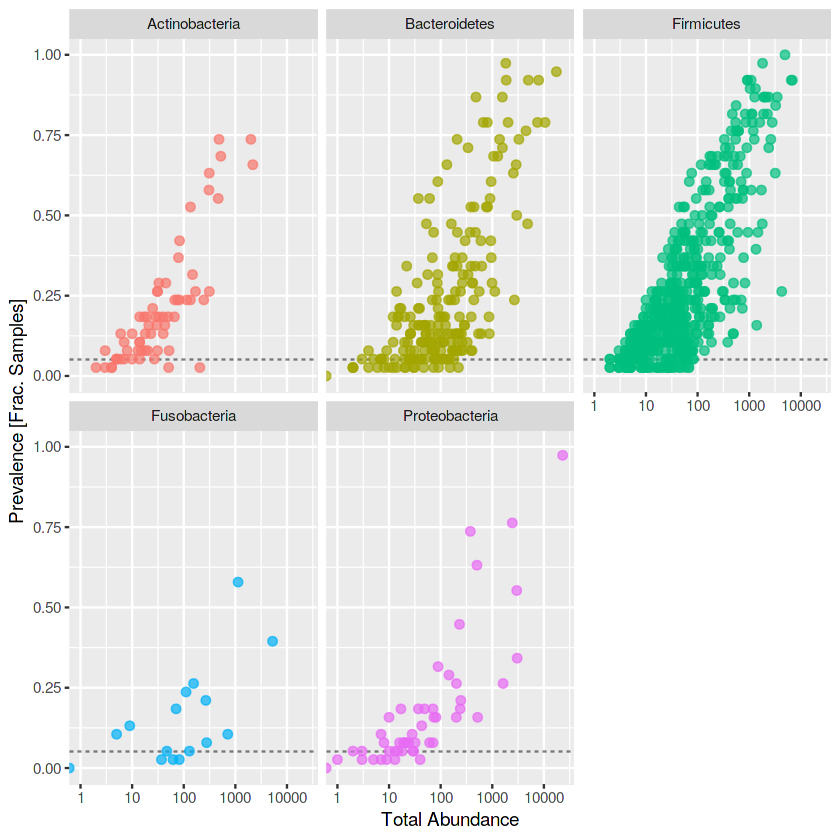

In [53]:
# Determining abundance threshold
prevdf1 = subset(prevdf, Phylum %in% get_taxa_unique(psN_MainPhyla, "Phylum"))
ggplot(prevdf1, aes(TotalAbundance, Prevalence / nsamples(psN_hasPhylum),color=Phylum)) +
  # Include a guess for parameter
  geom_hline(yintercept = 0.05, alpha = 0.5, linetype = 2) + geom_point(size = 2, alpha = 0.7) +
  scale_x_log10() +  xlab("Total Abundance") + ylab("Prevalence [Frac. Samples]") +
  facet_wrap(~Phylum) + theme(legend.position="none")

Warning message in grid.Call.graphics(C_segments, x$x0, x$y0, x$x1, x$y1, x$arrow):
“semi-transparency is not supported on this device: reported only once per page”

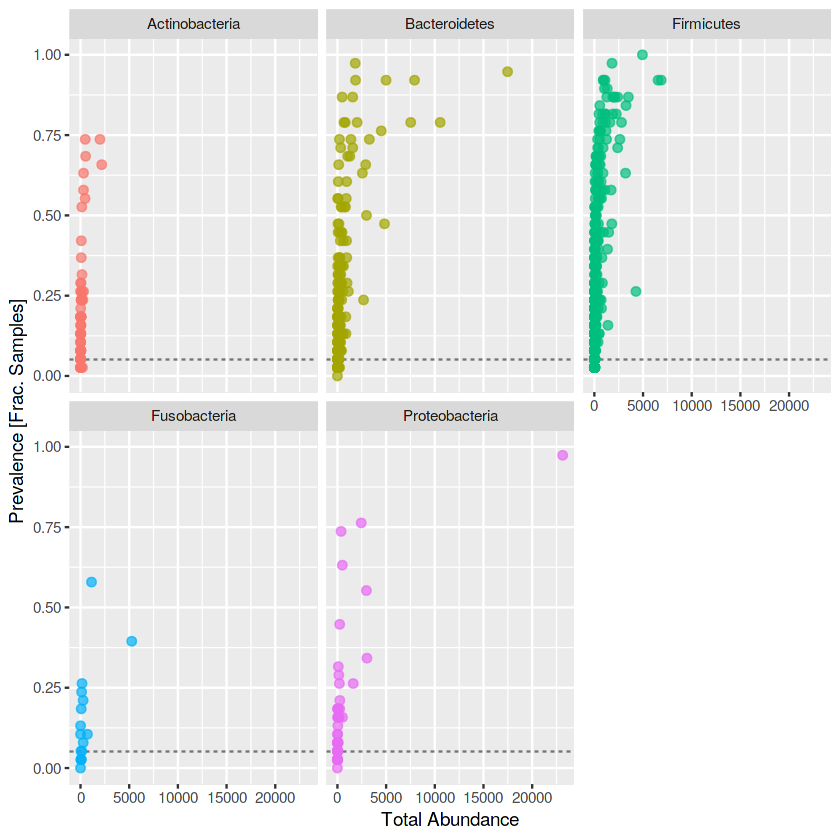

In [54]:
# Determining abundance threshold
prevdf1 = subset(prevdf, Phylum %in% get_taxa_unique(psN_MainPhyla, "Phylum"))
ggplot(prevdf1, aes(TotalAbundance, Prevalence / nsamples(psN_hasPhylum),color=Phylum)) +
  # Include a guess for parameter
  geom_hline(yintercept = 0.05, alpha = 0.5, linetype = 2) + geom_point(size = 2, alpha = 0.7) +
  scale_x_continuous() +  xlab("Total Abundance") + ylab("Prevalence [Frac. Samples]") +
  facet_wrap(~Phylum) + theme(legend.position="none")

# Are differences between participants greater than differences within participants accross time-points?

Make a phyloseq object like psN2 but with all participants, psN2A
Code copied from above.

## Constructing psN2
(phyloseq object of relative abundances)

And psN1 (phyloseq object of counts)

psN1A and psN2A include all participants, and will be used to look at variability within participants

In [55]:
psN %>%
# add all the immune data
phylo_join(immune.table, by = "pub_id") %>%
# only use data from humans (no extraction controls)
subset_samples(is.finite(muVisitRank)) %>%
# only otus from known taxa that show up frequently enough
subset_taxa(!is.na(Phylum)& !Phylum %in% c("", "uncharacterized")) %>%
subset_taxa(!Phylum %in% filterPhyla) %>%
# only otus that show up in at least 10% of samples
prevalence_filter_taxa %>%
# convert to relative abundance

tag_phyloseq%>%
# Instead of naming each taxon with its full sequence, we use the "tag" instead
swap.phyloseq.taxnames %>%
pass -> psN1A # Save pre relative abundance transformation

# add is-male
manColumn <- psN1A %>% sample_data %>% as('data.frame') %>% rownames_to_column  %>% mutate(isMale = testIsMaleVec(sex)) %>% dplyr::select(rowname, isMale)
psN1A <- phylo_join(psN1A, manColumn, by = 'rowname')

## psN2 is like psN1 but with relative abundances
psN1A %>%
transform_sample_counts(function(x) {x/sum(x)}) %>%
# The "tag" is a new name that takes into account the rest of the taxonomy data
# the tag may need to be updated after any agglomeration
pass-> psN2A

In [56]:
# filter to just microbiome visit 1 and experemental treatments
psN1A %>%
subset_samples(muVisitRank == 1) %>%
subset_samples(ct == "T") %>%
pass -> psN1

psN2A %>%
subset_samples(muVisitRank == 1) %>%
subset_samples(ct == "T") %>%
pass -> psN2

In [57]:
# Calculate weighted unifrac distances and role those in.
psN2.wuf <- phyloseq::distance(psN2, method = "wunifrac")
psN2.pcoa <- capscale(psN2.wuf ~ 1)
psN2.pcoa.df <- psN2.pcoa %>% scores(display = "sites") %>%
        as.data.frame %>% 
        rownames_to_column %>% 
        dplyr::select('rowname', 'MDS1', 'MDS2') %>%
        mutate(rMDS1 = rank(MDS1)) %>% # rank order of MDS1
        mutate(rrMDS1 = formatC(format = "d", rMDS1, flag = "0", width=ceiling(log10(max(rMDS1))))) %>%
        unite(newname, rrMDS1, rowname, sep = "_", remove = FALSE) %>%
        dplyr::select(-rrMDS1)

psN2 %>%
phylo_join(
    psN2.pcoa.df,
    by = 'rowname'
) -> psN2

## Even if the data are counts, 
## the weighted unifrac pcoa is still done on the relative abundances
psN1 %>%
phylo_join(
    psN2.pcoa.df,
    by = 'rowname'
) -> psN1

psN2A
psN1A
psN2
psN1

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 651 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 651 taxa by 10 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 651 tips and 650 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 651 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 651 taxa by 10 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 651 tips and 650 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 651 taxa and 21 samples ]
sample_data() Sample Data:       [ 21 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 651 taxa by 10 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 651 tips and 650 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 651 taxa and 21 samples ]
sample_data() Sample Data:       [ 21 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 651 taxa by 10 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 651 tips and 650 internal nodes ]

How many participants that provided samples didn't have a day zero sample so we had to use something else?

In [58]:
psN2 %>% sample_data %>% data.frame %>% group_by(muVisit) %>% summarize(n = length(muVisit))

muVisit n 
1  2       3
2  9      11
3 12       7

How many donors were there from each treatment?

In [59]:
psN2 %>% sample_data %>% data.frame %>% group_by(rx_code) %>% summarize(n = length(muVisit))

rx_code n
1 T1      7
2 T2      3
3 T3      6
4 T4      5

In [60]:
psN2 %>% sample_data %>% data.frame %>% group_by(muVisit, rx_code) %>% summarize(n = length(muVisit))

muVisit rx_code n
1  2      T1      3
2  9      T1      4
3  9      T2      2
4  9      T3      5
5 12      T2      1
6 12      T3      1
7 12      T4      5

# Data Curation Post mortum
How many taxa were still present after each filtering step?

In [61]:
# Find number of taxa in available samples
psN %>%
# add all the immune data
phylo_join(immune.table, by = "pub_id") %>%
# filter to just microbiome visit 1 and experemental treatments
subset_samples(muVisitRank == 1) %>%
subset_samples(ct == "T") %>%
prevalence_filter_taxa(thresh = 0) %>%
pass-> psInSamples
(NInSamples <- dim(otu_table(psInSamples))[2])

[1] 960

In [62]:
# Number of taxa with unidentified phyla
psInSamples %>%
subset_taxa(!is.na(Phylum)& !Phylum %in% c("", "uncharacterized")) %>%
pass -> psIdentifiedPhylum
(NUnkPhylum <- NInSamples - dim(otu_table(psIdentifiedPhylum))[2])

[1] 31

In [63]:
filterPhyla

[1] "Verrucomicrobia" "Tenericutes"     "Elusimicrobia"   "Synergistetes"

In [64]:
# Phyla removed because they are in filterPhyla 
# -- each of which show up fewer than 20 times in the data set
psIdentifiedPhylum %>%
subset_taxa(!Phylum %in% filterPhyla) %>%
pass -> psNotPhylaFiltered
(NFiltPhyla <- dim(otu_table(psIdentifiedPhylum))[2] - dim(otu_table(psNotPhylaFiltered))[2])

[1] 7

In [65]:
# Taxa removed because there were in fewer than 10% of the samples
psNotPhylaFiltered %>%
prevalence_filter_taxa %>%
pass -> psPFT
dim(otu_table(psNotPhylaFiltered))[2] - dim(otu_table(psPFT))[2]

[1] 386

# Immune figure
How to participants' immune profiles change over time?

In [66]:
# When were participants vaccinated?
# Copied from protocol apendix E
# visitno 1 is a screening visit, I assign it NaN
dayTable = data.frame(
    visitno = seq(from = 1, to = 14, by = 1),
    day = c(NaN, 0, 14, 28, 42, 84, 98, 168, 182, 196, 273, 364, 455, 545),
    month = c(NaN, 0, 0.5, 1, 1.5, 3, 3.5, 6, 6.5, 7, 9, 12, 15, 18)
)
vac <- data.frame(
    visitno = c(2, 4, 6, 8)
    )
vac <- left_join(vac, dayTable, by = 'visitno')

vac

visitno day month
1 2         0 0    
2 4        28 1    
3 6        84 3    
4 8       168 6

In [67]:
# Representitive antigens for further considerations
# These are essentially zero (mag = 1) at baseline
ants1 <- c('Con.6.gp120.B', 'ZM96.gp140', 'gp70_B.CaseA_V1_V2')
# These have measurable baseline magnitudes
ants2 <- c('gp41', 'p24')

In [68]:
donor.immune <-  psN2 %>% sample_data %>% as('data.frame') %>% dplyr::select(pub_id) %>%
left_join(immune.data, by = 'pub_id')
donor.immune %>% head

Warning message:
“Column `pub_id` has different attributes on LHS and RHS of join”

pub_id visitno rx_code type antigen mag    mag_bl response day month ct
1 282     5      T1      IgA  gp41    352.00 109.5  0         42  1.5  T 
2 282     7      T1      IgA  gp41    276.50 109.5  0         98  3.5  T 
3 282     9      T1      IgA  gp41    333.25 109.5  0        182  6.5  T 
4 282    12      T1      IgA  gp41      1.00 109.5  0        364 12.0  T 
5 282     5      T1      IgA  p24     313.50 329.8  0         42  1.5  T 
6 282     7      T1      IgA  p24     377.50 329.8  0         98  3.5  T 
  response_j  assay
1 -0.18339353 BAMA 
2 -0.10360764 BAMA 
3  0.19882813 BAMA 
4  0.15338760 BAMA 
5  0.02648181 BAMA 
6 -0.10988643 BAMA

In [69]:
psN %>% sample_data %>%
as('data.frame') %>% 
filter(!is.na(pub_id)) %>%
pull(pub_id) %>%
unique %>%
pass -> microbiomeCohort

In [70]:
immune.data %>% filter(pub_id %in% microbiomeCohort) %>%
pass -> donor.immune

donor.immune %>% head

visitno rx_code type antigen mag    mag_bl response day month ct response_j 
1  5      T1      IgA  gp41    352.00 109.5  0         42  1.5  T  -0.18339353
2  7      T1      IgA  gp41    276.50 109.5  0         98  3.5  T  -0.10360764
3  9      T1      IgA  gp41    333.25 109.5  0        182  6.5  T   0.19882813
4 12      T1      IgA  gp41      1.00 109.5  0        364 12.0  T   0.15338760
5  5      T1      IgA  p24     313.50 329.8  0         42  1.5  T   0.02648181
6  7      T1      IgA  p24     377.50 329.8  0         98  3.5  T  -0.10988643
  assay pub_id
1 BAMA  282   
2 BAMA  282   
3 BAMA  282   
4 BAMA  282   
5 BAMA  282   
6 BAMA  282

Warning message in grid.Call.graphics(C_lines, x$x, x$y, index, x$arrow):
“semi-transparency is not supported on this device: reported only once per page”

Saving 6.67 x 6.67 in image
Warning message in grid.Call.graphics(C_lines, x$x, x$y, index, x$arrow):
“semi-transparency is not supported on this device: reported only once per page”

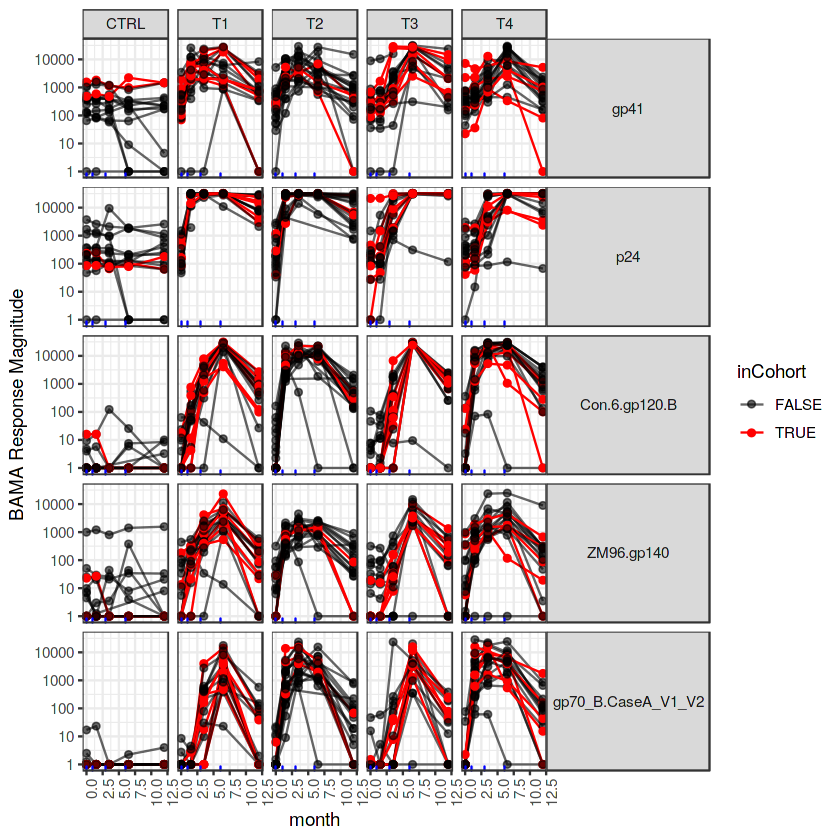

In [71]:
iggplot <- immune.data %>%
mutate(inCohort = pub_id %in% microbiomeCohort) %>%
filter(type == 'IgG', antigen %in% c(ants1, ants2)) %>%
mutate(antigen = factor(antigen, levels = c(ants2, ants1))) %>% # reorder facets
ggplot(aes(x = month, y =mag, group = pub_id, colour = inCohort, alpha = inCohort)) +
geom_line() +
geom_point() +
geom_rug(data = vac, aes(x = month), inherit.aes = F, color = 'blue') +
facet_grid(antigen ~ rx_code, labeller = label_wrap_gen()) +
theme_bw() +
theme(strip.text.y = element_text(angle = 0),
      axis.text.x = element_text(angle = 90, hjust = 1)) +
scale_y_log10(breaks = 10^(0:5)) +
scale_colour_manual(values = c("black", "red")) +
scale_alpha_manual(values = c(.6, 1)) + 
labs(y = "BAMA Response Magnitude")

iggplot

ggsave('figures/useiggsAllParticipants.png')
# To fix. Control groups don't show up in this version.

Warning message in grid.Call.graphics(C_lines, x$x, x$y, index, x$arrow):
“semi-transparency is not supported on this device: reported only once per page”

Saving 6.67 x 6.67 in image
Warning message in grid.Call.graphics(C_lines, x$x, x$y, index, x$arrow):
“semi-transparency is not supported on this device: reported only once per page”

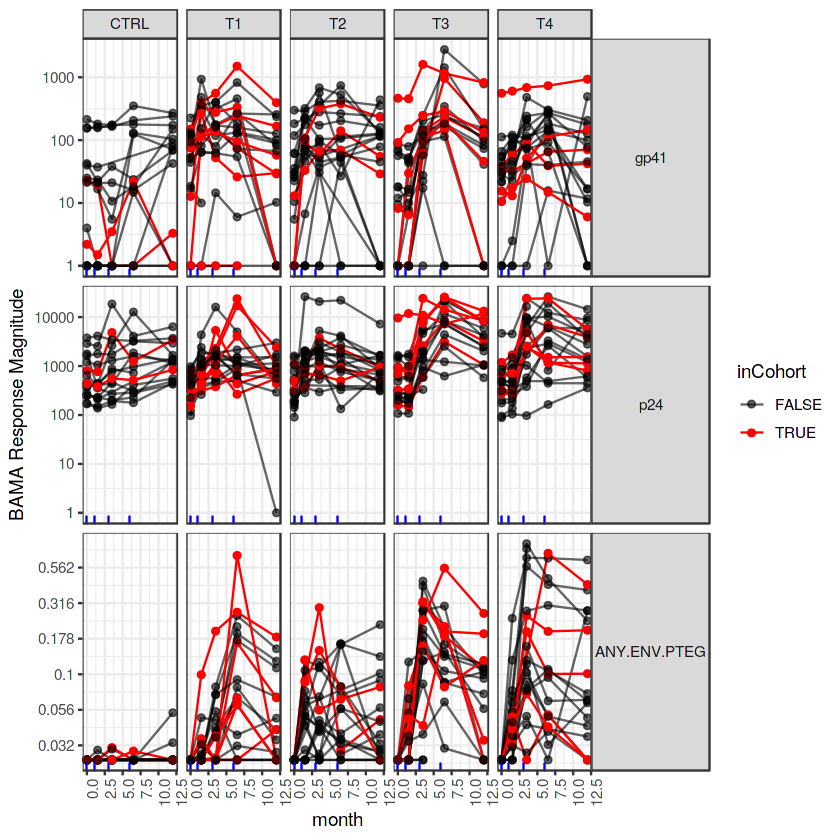

In [72]:
iggplot <- immune.data %>%
mutate(inCohort = pub_id %in% microbiomeCohort) %>%
filter(type %in% c('IgA', 'CD4+') & antigen %in% c(ants2, 'ANY.ENV.PTEG'))%>%
mutate(antigen = factor(antigen, levels = c(ants2, 'ANY.ENV.PTEG'))) %>% # reorder facets
ggplot(aes(x = month, y =mag, group = pub_id, colour = inCohort, alpha = inCohort)) +
geom_line() +
geom_point() +
geom_rug(data = vac, aes(x = month), inherit.aes = F, color = 'blue') +
facet_grid(antigen ~ rx_code, labeller = label_wrap_gen(), scales = 'free_y') +
theme_bw() +
theme(strip.text.y = element_text(angle = 0),
      axis.text.x = element_text(angle = 90, hjust = 1)) +
scale_y_log10(breaks = 10^c(
    seq(from = -2, to = 0, by = 0.25), seq(from = 0, to = 5, by = 1)
), labels = function(x) round(as.numeric(x), digits=3)) +
scale_colour_manual(values = c("black", "red")) +
scale_alpha_manual(values = c(.6, 1)) +
labs(y = "BAMA Response Magnitude")

iggplot

ggsave('figures/useIgACD4AllParticipants.png')
# To fix. Control groups don't show up in this version.

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

Saving 6.67 x 6.67 in image
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

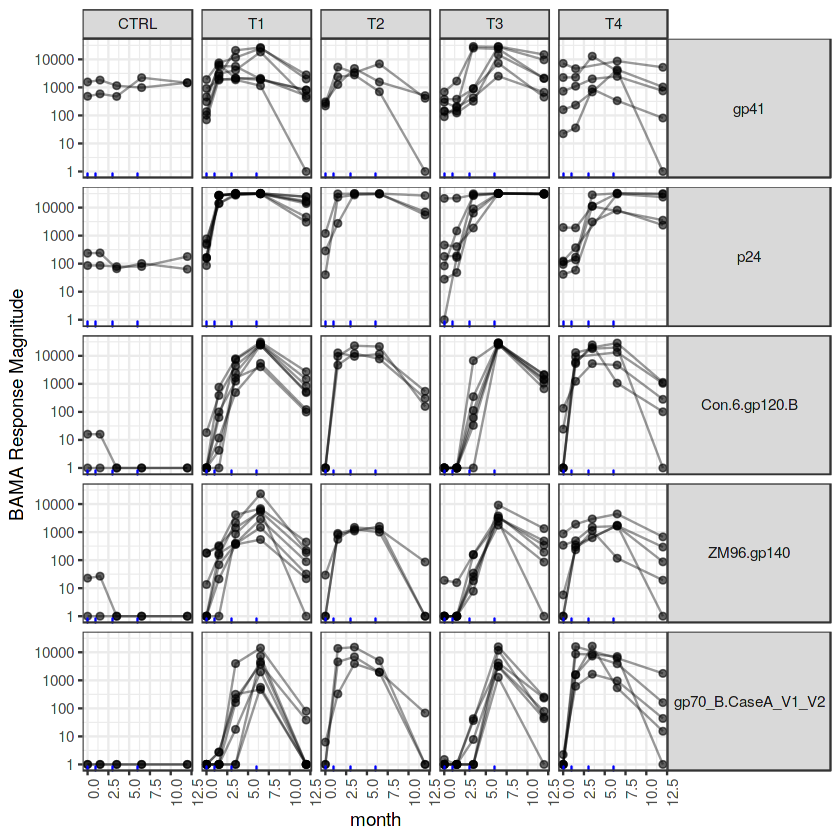

In [73]:
iggplot <- donor.immune %>% filter(type == 'IgG', antigen %in% c(ants1, ants2)) %>%
mutate(antigen = factor(antigen, levels = c(ants2, ants1))) %>% # reorder facets
ggplot(aes(x = month, y =mag, group = pub_id)) + geom_point(alpha = 0.6) + geom_line(alpha = 0.4) +
geom_rug(data = vac, aes(x = month), inherit.aes = F, color = 'blue') +
facet_grid(antigen ~ rx_code, labeller = label_wrap_gen()) +
theme_bw() + theme(strip.text.y = element_text(angle = 0), axis.text.x = element_text(angle = 90, hjust = 1)) +
scale_y_log10(breaks = 10^(0:5)) +
labs(y = "BAMA Response Magnitude")
iggplot
ggsave('figures/useiggs.png')
# To fix. Control groups don't show up in this version.

## Number of participants per group

### All participants

In [74]:
immune.data %>% 
group_by(rx_code) %>%
summarize(Unique_ids = n_distinct(pub_id))

rx_code Unique_ids
1 CTRL    16        
2 T1      20        
3 T2      20        
4 T3      20        
5 T4      20

### Participants with microbiome data

In [75]:
donor.immune %>% 
group_by(rx_code) %>%
summarize(Unique_ids = n_distinct(pub_id))

rx_code Unique_ids
1 CTRL    2         
2 T1      7         
3 T2      3         
4 T3      6         
5 T4      5

# Weighted Unifrac

## Variability within vs between participants

In [76]:
psN2A.wuf <- phyloseq::distance(psN2A, method = "wunifrac")

In [77]:
psN2A %>% sample_data %>% .[1:5, 1:10]

pub_id sex    muVisit muVisitRank rx_code ct
Sample-57 282    Male    9      1           T1      T 
Sample-58 282    Male   12      2           T1      T 
Sample-60 176    Female  9      1           T1      T 
Sample-61 176    Female 12      2           T1      T 
Sample-62 123    Female 12      1           T4      T 
          CD4._ANY.ENV.PTEG_Month_0 CD4._ANY.ENV.PTEG_Month_12
Sample-57 0.025                     0.02500000                
Sample-58 0.025                     0.02500000                
Sample-60 0.025                     0.06841053                
Sample-61 0.025                     0.06841053                
Sample-62 0.025                     0.42710324                
          CD4._ANY.ENV.PTEG_Month_6.5 IgA_gp41_Month_0
Sample-57 0.06146979                  109.5           
Sample-58 0.06146979                  109.5           
Sample-60 0.16678641                  149.5           
Sample-61 0.16678641                  149.5           
Sample-62 0.70855159                   33.5

In [78]:
psN2A %>% sample_data %>% as("data.frame") %>% rownames_to_column(var = "Sample") %>% dplyr::select(Sample, pub_id) %>%
pass -> S2P
S2P %>% dim

[1] 38  2

In [79]:
All.equal <- Vectorize(function(x,y){x == y})

In [80]:
## Convert distance matrix into long form matrix
psN2A.wuf %>% as.matrix %>% as.data.frame %>%
rownames_to_column(var = "SampleX")%>%
gather(key = "SampleY", value = "WufDist", -SampleX) %>%
left_join(S2P, by = c("SampleX" = "Sample")) %>% rename(pub_id_x = pub_id) %>%
left_join(S2P, by = c("SampleY" = "Sample")) %>% rename(pub_id_y = pub_id) %>%
mutate(SampleX = as.numeric(str_extract(SampleX, "[0-9][0-9]"))) %>%
mutate(SampleY = as.numeric(str_extract(SampleY, "[0-9][0-9]"))) %>%
## discard diagonal discard and upper half of triangular matrix
filter(SampleX < SampleY) %>%
mutate(isSamePerson = All.equal(pub_id_x, pub_id_y)) %>%
# ## discard cases where pub_id is unknown
# filter(is.finite(pub_id_x) & is.finite(pub_id_y))
pass -> AllWufDist

AllWufDist %>% head

SampleX SampleY WufDist   pub_id_x pub_id_y isSamePerson
1 57      58      0.3769328 282      282       TRUE       
2 57      60      0.2754723 282      176      FALSE       
3 58      60      0.3852072 282      176      FALSE       
4 57      61      0.4105227 282      176      FALSE       
5 58      61      0.3384203 282      176      FALSE       
6 60      61      0.3868663 176      176       TRUE

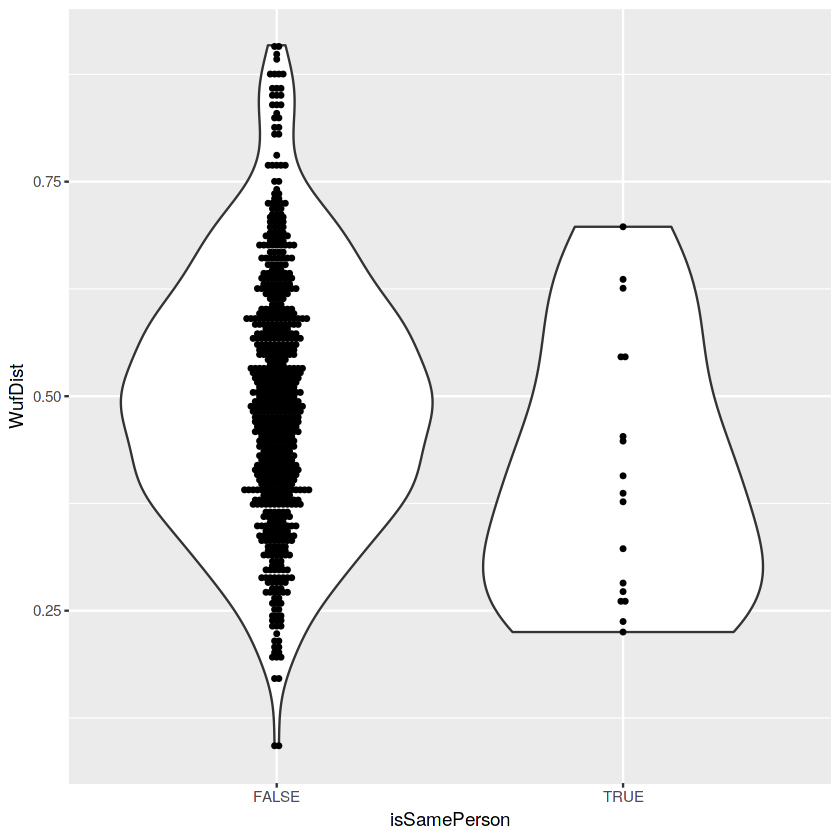

In [81]:
AllWufDist %>% ggplot(aes(x = isSamePerson, y = WufDist)) + geom_violin() + geom_dotplot(binaxis = "y", stackdir = "center", binwidth = .005)

In [82]:
AllWufDist %>% group_by(isSamePerson) %>% summarize(mean = mean(WufDist)) -> WufMeans
WufMeans

isSamePerson mean     
1 FALSE        0.4968027
2  TRUE        0.4108245

Bootstrap some confidence intervals.

In [83]:
# Split the data
SamePersonWufDist <- AllWufDist %>% filter(isSamePerson) #%>% dplyr::select(WufDist)
DifferentPersonWufDist <- AllWufDist %>% filter(!isSamePerson)
set.seed(334)

bootsSame <- rsample::bootstraps(SamePersonWufDist, times = 10000)
bootsDifferent <- rsample::bootstraps(DifferentPersonWufDist, times = 10000)

In [84]:
mean_of_bootstrap <- function(split){
    locVals <- rsample::analysis(split)$WufDist
    mean(locVals)
}

In [85]:
boot_meansSame <- bootsSame %>% mutate(mean = map_dbl(splits, mean_of_bootstrap)) %>% dplyr::select(mean)

boot_meansDifferent <- bootsDifferent %>% mutate(mean = map_dbl(splits, mean_of_bootstrap)) %>% dplyr::select(mean)

boot_means <- bind_cols(same = boot_meansSame$mean, different = boot_meansDifferent$mean) %>%
mutate(isDifferentBigger = different>same)
#boot_means

sum(boot_means$isDifferentBigger)/length(boot_means$isDifferentBigger)

[1] 0.9896

The above is the P value that the two are different from eachother. Its a bootstrapped p value - per a conversation I had with Klaus Hubert.
Still need to find a justification that this approach is legit.

In [86]:
data.frame(comparison = c("same", "different"), WufMeans$mean)

comparison WufMeans.mean
1 same       0.4968027    
2 different  0.4108245

Warning message in grid.Call.graphics(C_circle, x$x, x$y, x$r):
“semi-transparency is not supported on this device: reported only once per page”

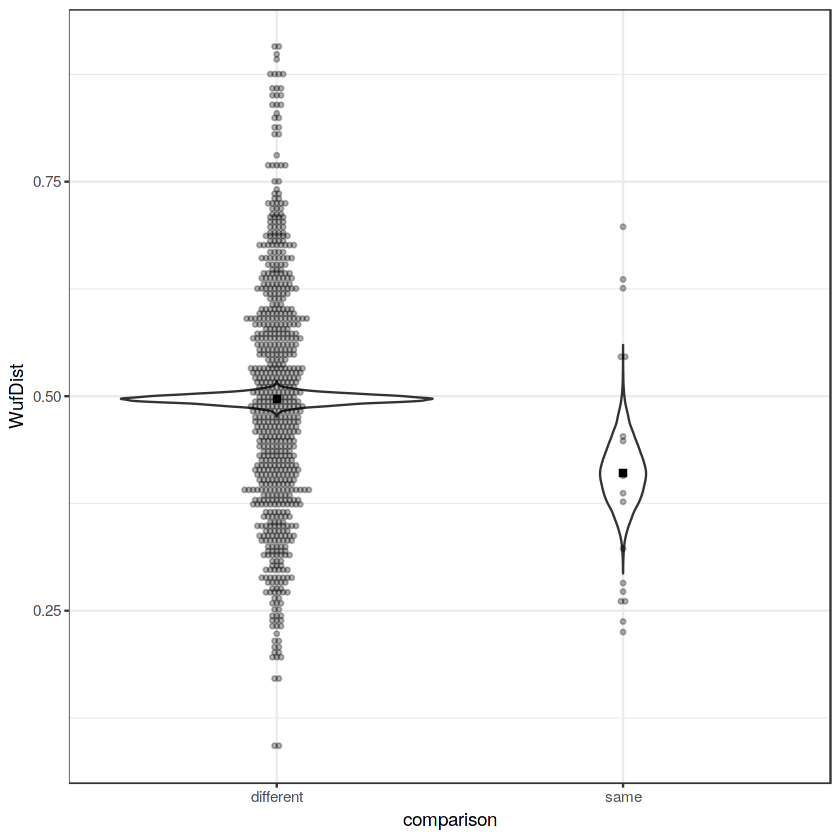

In [87]:
boot_means %>% dplyr::select(-isDifferentBigger) %>% gather(key = "comparison", value = "WufDist") %>% ggplot(aes(x = comparison, y = WufDist)) + 
geom_violin() + theme_bw() + 
geom_point(data = data.frame(comparison = c("same", "different"), WufDist = WufMeans$mean), aes(x = comparison, y = c(WufDist[2], WufDist[1])), shape = 22, fill = "black", size = 2)+
geom_dotplot(data = AllWufDist %>% mutate(isSamePerson2 = if_else(isSamePerson, "same", "different"))
             , aes(x = isSamePerson2, y = WufDist), binaxis = "y", stackdir = "center", binwidth = .005, alpha = 0.3)

# Variability within vs between participants

## Variability at earliest sampling

In [88]:
psN2.wuf <- phyloseq::distance(psN2, method = "wunifrac")

In [89]:
psN2.pcoa <- capscale(psN2.wuf ~ 1)

In [90]:
# How much variance si explained by each weighted unifrac axis
# Note, ten axes cover 95% of the variance. 
# I'm not going to look beyond that for any test.
data.frame(eig = psN2.pcoa$CA$eig) %>%
rownames_to_column('axis') %>%
mutate(proportion = eig/sum(eig)) %>%
mutate(cumulative = cumsum(proportion))

axis  eig         proportion   cumulative
1  MDS1  0.825438822 0.2888040980 0.2888041 
2  MDS2  0.495612315 0.1734045743 0.4622087 
3  MDS3  0.364619128 0.1275727475 0.5897814 
4  MDS4  0.268169168 0.0938268864 0.6836083 
5  MDS5  0.261743609 0.0915787154 0.7751870 
6  MDS6  0.162405998 0.0568225245 0.8320095 
7  MDS7  0.146142884 0.0511323948 0.8831419 
8  MDS8  0.097842330 0.0342330228 0.9173750 
9  MDS9  0.061705028 0.0215893226 0.9389643 
10 MDS10 0.050336955 0.0176118673 0.9565762 
11 MDS11 0.041072011 0.0143702533 0.9709464 
12 MDS12 0.022613493 0.0079119971 0.9788584 
13 MDS13 0.017745217 0.0062086872 0.9850671 
14 MDS14 0.016323022 0.0057110902 0.9907782 
15 MDS15 0.014802146 0.0051789668 0.9959571 
16 MDS16 0.009677461 0.0033859449 0.9993431 
17 MDS17 0.001877523 0.0006569069 1.0000000

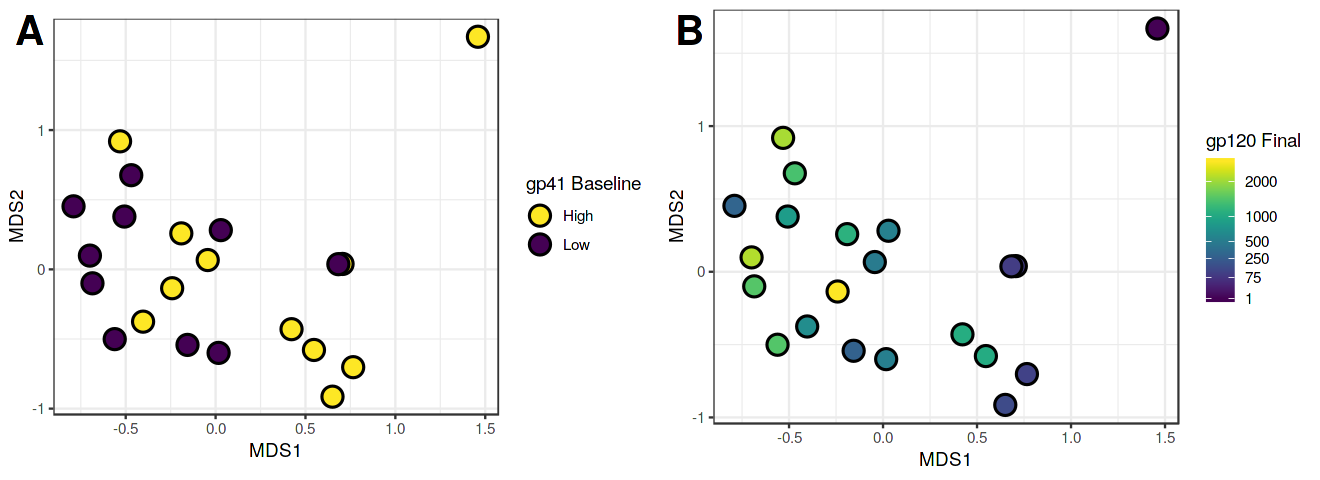

In [91]:
my_breaks = c(1, 75, 250, 500, 1000,2000)
psN2 %>% mutate_phyloseq_sample(
                               mc41 = factor(medcode_hl(IgG_gp41_Month_0)),
                                                log120 = (IgG_Con.6.gp120.B_Month_12)) -> psN2_mod
psN2_mod%>%
sample_data() %>%
ggplot(aes(x = MDS1, y = MDS2)) + geom_point(aes(fill = mc41), size = 5, stroke = 1, shape = 21) +
coord_fixed(sqrt(psN2.pcoa$CA$eig[2]/psN2.pcoa$CA$eig[1])) +
viridis::scale_fill_viridis(name = 'gp41 Baseline', direction = -1, discrete = TRUE) +
#scale_colour_manual(name = 'gp41 Primary', values = c('black', 'grey70')) + 
theme_bw() -> wuford_gp41


psN2_mod %>%
sample_data() %>%
ggplot(aes(x = MDS1, y = MDS2)) + geom_point(aes(fill = log120), size = 5, stroke = 1, shape = 21) +
coord_fixed(sqrt(psN2.pcoa$CA$eig[2]/psN2.pcoa$CA$eig[1])) +
viridis::scale_fill_viridis(name = 'gp120 Final', direction = 1, trans = "sqrt",
                           breaks = my_breaks, labels = my_breaks) +
#scale_colour_manual(name = 'gp41 Primary', values = c('black', 'grey70')) + 
theme_bw() -> wuford_gp120

par <- options()
options(repr.plot.width=11, repr.plot.height= 4)
#g <- grid.arrange(wuford_gp41, wuford_gp120, ncol = 2)
g <- cowplot::plot_grid(wuford_gp41, wuford_gp120, ncol = 2, labels = c("A", "B"), label_size = 24)
g
#ggsave('figures/wunifrac_Agp41_Bgp120_pcoa.png', g, width = 8, height = 4)
#ggsave('figures/wunifrac_Agp41_Bgp120_pcoa.svg', g, width = 8, height = 4)
cowplot::save_plot('figures/wunifrac_Agp41_Bgp120_pcoa.png', g, base_width = 8, base_height = 4)
cowplot::save_plot('figures/wunifrac_Agp41_Bgp120_pcoa.svg', g, base_width = 8, base_height = 4)

# Kernel Regression and Weighted Unifrac GLM

In [92]:
wufKN2 <- D2K(as.matrix(psN2.wuf))

In [93]:
muDoners <- unique(sample_data(psN2)$pub_id)

In [94]:
immune.data %>%
filter(pub_id %in% muDoners) %>%
filter(
    (type == 'IgG' & 
    antigen %in% ants1 &
    month %in% c(6.5,12)
    ) |
    (type %in% c('IgG', 'IgA') &
     antigen %in% ants2 &
     month %in% c(0,6.5,12)
    ) |
    type == 'CD4+' &
    antigen == 'ANY.ENV.PTEG' &
    month %in% c(6.5, 12)
      )-> use.immune
head(use.immune)

visitno rx_code type antigen       mag      mag_bl response day month ct
1  9      T1      IgA  gp41            333.25 109.5  0        182  6.5  T 
2 12      T1      IgA  gp41              1.00 109.5  0        364 12.0  T 
3  9      T1      IgA  p24             658.00 329.8  0        182  6.5  T 
4 12      T1      IgA  p24             862.20 329.8  0        364 12.0  T 
5  9      T1      IgG  Con.6.gp120.B 27127.50   1.0  1        182  6.5  T 
6 12      T1      IgG  Con.6.gp120.B  1488.00   1.0  1        364 12.0  T 
  response_j  assay pub_id
1  0.19882813 BAMA  282   
2  0.15338760 BAMA  282   
3 -0.17841981 BAMA  282   
4 -0.08504074 BAMA  282   
5  1.10518516 BAMA  282   
6  1.09794453 BAMA  282

In [95]:
# Do permanova and related tests to a variable of interest
# This function is pretty specific to this analysis, so I'm going to leave it
# here in the notebook file
CapVar <- function(x, nperm = 9999, transformation = medcode2, family = 'binomial'){
    ## Pull out the needed data
    
    psN2.wMDS <- psN2 %>% phylo_join(scores(psN2.pcoa, display = "sites", choices = 1:10) %>%
                    as.data.frame %>% rownames_to_column, by = 'rowname')
    
    medWuf <- NA
    rankWuf <- NA
    locPS <- phylo_join(psN2.wMDS, x, by = 'pub_id') 
    ydata0 <- sample_data(locPS)$mag
    yna <- is.na(ydata0)
    #loc.wuf <- wufKN2
    #loc.jsd <- jsdKN2
    ydata <- ydata0
    
    ydata <- ydata0[!yna]
    loc.wuf2 <- psN2.wuf %>% as.matrix %>% .[!yna, !yna]
    
    medWuf <- adonis(loc.wuf2 ~ transformation(ydata), permutations = nperm)
    #medWuf$aov.tab[1,c('R2', 'Pr(>F)')]
    
    ## Capscale returns the same results as adonis (permanova), but also gives some other interesting results
    
    medWufCap <- capscale(loc.wuf2 ~ transformation(ydata))
    capanova <- anova(medWufCap, permutations = nperm)
    
    samDf <- locPS %>% sample_data %>% as('data.frame') %>% rownames_to_column %>%
     left_join(
        vegan::scores(medWufCap, display = 'sites') %>% as.data.frame %>% dplyr::select(CAP1) %>%
        rownames_to_column, by = 'rowname') %>% .[!yna,]
    
#     # Is giving only positive results with CAP1, not sure why
#     glmAnova <- glm(medcode(ydata) ~  MDS1 + CAP1, data = samDf, family = 'binomial') %>% anova(test = "Chisq")
    loc_glm <- glm(transformation(ydata) ~  MDS1, data = samDf, family = family)
    glmAnova <- loc_glm %>% anova(test = "Chisq")
    #glmAnova['CAP1', 'Deviance']/out_capanova['NULL', 'Resid. Dev']
    
    ## check against mirkat
    loc.Kwuf2 <- wufKN2[!yna, !yna]
    mirkatP <- MiRKAT(y = transformation(ydata), Ks = loc.Kwuf2, out_type = "C", method = 'permutation', nperm = nperm)
    
    #list(medWuf, capanova, mirkatP)
    
    pred_pct <- predict(loc_glm, type = "response")
    pred_01 <- as.numeric(predict(loc_glm, type = "response") > 0.5)
    
    accuracy <- mean(transformation(ydata) == pred_01)
    
        null_glm <- update(loc_glm, ~1)

    # Canonical caluclation of McFadden's R2 for the GLM
    McFadden = 1- (logLik(loc_glm)/ logLik(null_glm))
    
    # A GLM of all weighted unifrac components
    
    
    data.frame(
        caps.P = capanova['Model', 'Pr(>F)'],
        adonisP = medWuf$aov.tab[1, 'Pr(>F)'],
        mir.P = mirkatP,
        caps.F = capanova['Model', 'F'],
        caps.R2 = medWufCap$CCA$tot.chi/medWufCap$tot.chi, 
        wuf1.P = glmAnova['MDS1', 'Pr(>Chi)'],
        wuf1.DR = glmAnova['MDS1', 'Deviance'] / glmAnova['NULL', 'Resid. Dev'],
        wuf1.McFadden = McFadden,
        accuracy,
        wuf1.coef = coef(loc_glm)[2]
        #cap1.P = glmAnova['CAP1', 'Pr(>Chi)'],
        #cap1.R2 = glmAnova['CAP1', 'Deviance'] / glmAnova['NULL', 'Resid. Dev']
    )
    }
    

In [96]:
use.immune %>%
filter(type == 'IgG' & antigen == 'gp41'& month == 0 & ct == 'T') -> test.immune1

In [97]:
# Just confirming that the function works before it goes in a giant loop. I'd delete this,
# but i'll just end up needing it again if I do.
ptm = proc.time()
tps <- CapVar(test.immune1, nperm = 9999, transformation = medcode, family = 'binomial')
proc.time() - ptm
tps

   user  system elapsed 
  1.158   0.000   1.200 

caps.P adonisP mir.P  caps.F   caps.R2   wuf1.P     wuf1.DR  
MDS1 0.0438 0.0526  0.0478 1.860805 0.0900595 0.01437564 0.2061418
     wuf1.McFadden accuracy  wuf1.coef
MDS1 0.2061418     0.6666667 2.184936

In [98]:
use.immune %>%
filter(type == 'CD4+' & month == 6.5 & ct == 'T') -> test.immune.pteg

In [99]:
# Just confirming that the function works before it goes in a giant loop. I'd delete this,
# but i'll just end up needing it again if I do.
ptm = proc.time()
tps <- CapVar(test.immune.pteg, nperm = jnperm, transformation = medcode, family = 'binomial')
proc.time() - ptm
tps

   user  system elapsed 
  1.907   0.002   1.945 

caps.P adonisP mir.P  caps.F   caps.R2    wuf1.P    wuf1.DR   
MDS1 0.2534 0.2521  0.2541 1.214412 0.06065471 0.2176327 0.05229439
     wuf1.McFadden accuracy  wuf1.coef 
MDS1 0.05229439    0.5714286 -0.9372546

In [100]:
# Run above function against every relevant variable.
ptm <- proc.time()

use.immune %>% 
filter(ct == 'T') %>%
group_by(type, antigen, month) %>%
do(data.frame(CapVar(., nperm = jnperm))) -> permKernTable
permKernTable

proc.time() - ptm

type antigen            month caps.P adonisP mir.P  caps.F    caps.R2   
1  CD4+ ANY.ENV.PTEG        6.5  0.2456 0.2548  0.2461 1.2144117 0.06065471
2  CD4+ ANY.ENV.PTEG       12.0  0.2477 0.2473  0.2417 1.2247640 0.06423676
3  IgA  gp41                0.0  0.9635 0.9560  0.9607 0.4486018 0.02328801
4  IgA  gp41                6.5  0.2035 0.2003  0.2029 1.2935612 0.06435591
5  IgA  gp41               12.0  0.7367 0.7423  0.7388 0.7117788 0.03836130
6  IgA  p24                 0.0  0.8965 0.8842  0.8945 0.5521018 0.02850923
7  IgA  p24                 6.5  0.9022 0.9000  0.9054 0.5407756 0.02794055
8  IgA  p24                12.0  0.3761 0.3858  0.3826 1.0398923 0.05507916
9  IgG  Con.6.gp120.B       6.5  0.0043 0.0032  0.0052 2.8194830 0.13046221
10 IgG  Con.6.gp120.B      12.0  0.0370 0.0341  0.0353 1.9563504 0.09425202
11 IgG  gp41                0.0  0.0453 0.0535  0.0450 1.8608051 0.09005950
12 IgG  gp41                6.5  0.0437 0.0449  0.0465 1.8685689 0.09040161
13 IgG  gp41               12.0  0.6513 0.6395  0.6573 0.7928788 0.04044432
14 IgG  gp70_B.CaseA_V1_V2  6.5  0.9031 0.9022  0.9019 0.5386333 0.02783292
15 IgG  gp70_B.CaseA_V1_V2 12.0  0.0381 0.0385  0.0348 1.9685487 0.09478454
16 IgG  p24                 0.0  0.2173 0.2112  0.2188 1.2761084 0.06354226
17 IgG  p24                 6.5  0.4088 0.4095  0.4279 1.0119660 0.05377025
18 IgG  p24                12.0  0.2845 0.2804  0.2816 1.1650313 0.05833086
19 IgG  ZM96.gp140          6.5  0.0178 0.0167  0.0164 2.2615533 0.10739190
20 IgG  ZM96.gp140         12.0  0.2948 0.2917  0.2948 1.1510065 0.05766877
   wuf1.P      wuf1.DR     wuf1.McFadden accuracy  wuf1.coef 
1  0.217632719 0.052294389 0.052294389   0.5714286 -0.9372546
2  0.227507816 0.052527616 0.052527616   0.6000000 -0.9198106
3  0.650504169 0.007062388 0.007062388   0.6190476  0.3334472
4  0.143386690 0.073671621 0.073671621   0.5714286 -1.1327448
5  0.855066811 0.001203343 0.001203343   0.5000000 -0.1357752
6  0.319779055 0.034056957 0.034056957   0.5714286  0.7517801
7  0.649897829 0.007088670 0.007088670   0.4761905 -0.3327069
8  0.387379740 0.026947776 0.026947776   0.6000000 -0.6568565
9  0.001759476 0.336662211 0.336662211   0.8571429 -3.1035544
10 0.010022385 0.228144417 0.228144417   0.7142857 -2.2894384
11 0.014375638 0.206141833 0.206141833   0.6666667  2.1849365
12 0.030461387 0.161126318 0.161126318   0.6666667 -1.8086140
13 0.778924768 0.002711345 0.002711345   0.5238095 -0.2051359
14 0.618696590 0.008522541 0.008522541   0.5714286 -0.3651956
15 0.014277612 0.206557149 0.206557149   0.7142857 -2.1346836
16 0.443546461 0.020199538 0.020199538   0.6666667 -0.5673520
17 0.396771941 0.025899534 0.025899534   0.6500000 -0.7486813
18 0.158978877 0.068258841 0.068258841   0.6666667 -1.0853279
19 0.008971440 0.234942731 0.234942731   0.8095238 -2.3383845
20 0.162284487 0.067188697 0.067188697   0.6666667 -1.0758087

   user  system elapsed 
 17.912   0.027  18.472 

The above function runs several extra tests. Results as follows:

type antigen visitno - things we run over

caps.P - Capscale test asks whether if we rotate things a bit and then try to use the best axis to compare to the data. Its similar to the wuf1.P value, but with some rotation

adonisP - p-value for a permanova test. Similar to mirkat p-value. One key exception is that igg_gp41_Month_0 falls on different sides of the 0.05 threshold.

mir.P is the p value for the kernel regression test, as run in the MiRKAT package. 
(Zhao et al., 2015)

caps.F and caps R2 are the f and r squared values for the capscale test.

wuf.P - is the p value of a glm comparing weighted unifrac component one against variables of interest. This test appears to always be statistically significantly positive when the mirkat test is positve.

wuf1.DR - one way of calculating an R2 value from a glm. We devide the deviance by the residual deviance

wuf1.McFadden - is a McFadden's pseudo R^2. This turns out to be identical to the previous calculation.

accuracy - the fraction of the time that the glm predicts something falls above or below the median correctly. This turns out to not be super informative. Everything has around a 60% accuracy.

wuf1.coef - the coefficient of the glm model. The sign is relevant. Things with postive sign are associated with high values of weighted unifrac axis 1.

In [101]:
# Clean up so we just see the results of the kernel regression 
concisePermKernTable <- permKernTable %>% ungroup %>%
mutate(Kernel_Q = p2q(mir.P), MDS1_Q = p2q(wuf1.P)) %>%
dplyr::select(Type = type, Antigen = antigen,Month = month, Kernel_P = mir.P, Kernel_Q,
              MDS1_P = wuf1.P, MDS1_Q, GlmMDS1_R2 = wuf1.McFadden, MDS1_Coef = wuf1.coef) %>%
as.data.frame %>% 
pass -> concisePermKernTable
write.csv(format(concisePermKernTable, digits = 3), 'tables/concisePermkernTable.csv')

### Q-Q Plot

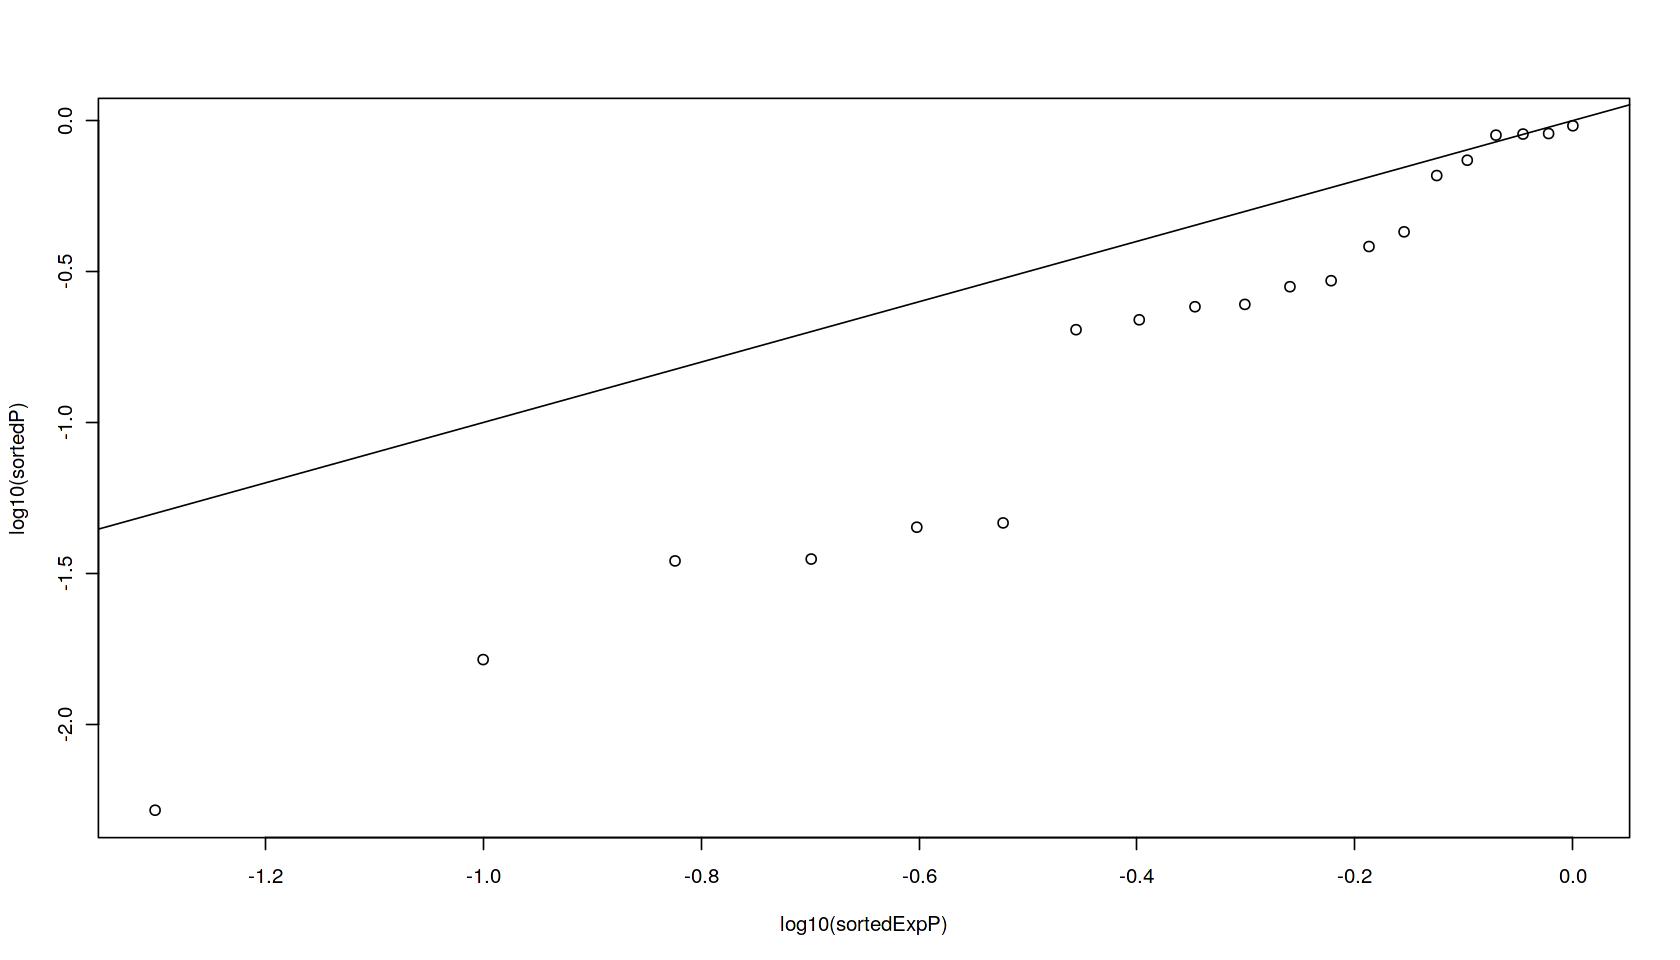

[1] 0.50000000 0.45238095 0.97619048 0.35714286 0.78571429 0.83333333
 [7] 0.92857143 0.64285714 0.07142857 0.21428571 0.26190476 0.30952381
[13] 0.73809524 0.88095238 0.16666667 0.40476190 0.69047619 0.54761905
[19] 0.11904762 0.59523810

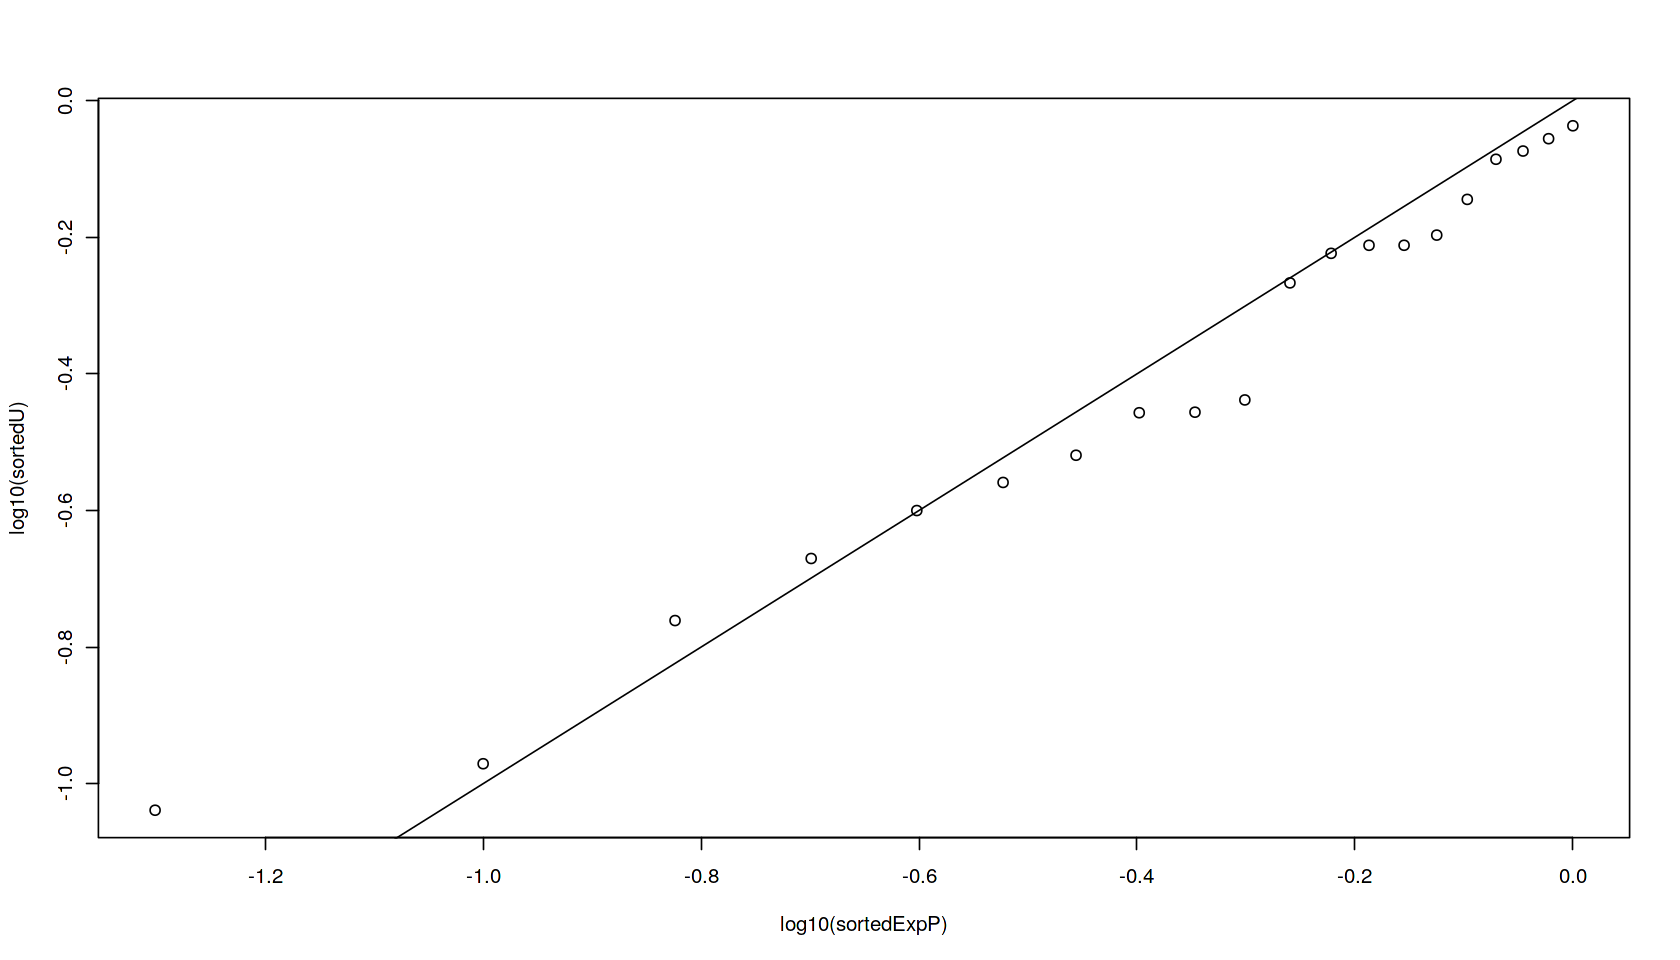

In [245]:
sortedP <- sort(permKernTable$mir.P)
exp2 <- 1:length(permKernTable$mir.P)/length(permKernTable$mir.P)
sortedExpP <- sort(exp2)
plot(log10(sortedExpP), log10(sortedP))
abline(0,1)
plot(log10(sortedExpP), log10(sortedU))
#plot(log10(sortedU), log10(sortedP))
abline(0,1)
#abline(log10(h = 0.05))
#bind_cols(sortedU, sortedP)
expP

In [240]:
permKernTable$mir.P %>% str

 num [1:20] 0.246 0.242 0.961 0.203 0.739 ...


In [241]:
?qq

B_05_qq                package:lattice                 R Documentation

_Q_u_a_n_t_i_l_e-_Q_u_a_n_t_i_l_e _P_l_o_t_s _o_f _T_w_o _S_a_m_p_l_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Quantile-Quantile plots for comparing two Distributions

_U_s_a_g_e:

     qq(x, data, ...)
     
     ## S3 method for class 'formula'
     qq(x, data, aspect = "fill", 
        panel = lattice.getOption("panel.qq"),
        prepanel, scales, strip, 
        groups, xlab, xlim, ylab, ylim, f.value = NULL, 
        drop.unused.levels = lattice.getOption("drop.unused.levels"),
        ...,
        lattice.options = NULL,
        qtype = 7,
        default.scales = list(),
        default.prepanel = lattice.getOption("prepanel.default.qq"),
        subscripts,
        subset)
     
_A_r_g_u_m_e_n_t_s:

       x: The object on which method dispatch is carried out.

          For the ‘"formula"’ method, ‘x’ should be a formula of the
          form ‘y ~ x | g1 * g2 * ...’, where ‘x’ should be a numeric
          variable, and ‘y’ a factor, shingle, character, or numeric
          variable, with the restriction that there must be exactly two
          levels of ‘y’, which divide the values of ‘x’ into two
          groups.  Quantiles for these groups will be plotted against
          each other along the two axes.

    data:

          For the ‘formula’ method, an optional data source (usually a
          data frame) in which variables are to be evaluated (see
          ‘xyplot’ for details).

 f.value:

          An optional numeric vector of probabilities, quantiles
          corresponding to which should be plotted.  This can also be a
          function of a single integer (representing sample size) that
          returns such a numeric vector.  A typical value for this
          argument is the function ‘ppoints’, which is also the S-PLUS
          default.  If specified, the probabilities generated by this
          function is used for the plotted quantiles, through the
          ‘quantile’ function.

          ‘f.value’ defaults to ‘NULL’, which is equivalent to

          
          
                f.value = function(n) ppoints(n, a = 1)
              

          This has the effect of including the minimum and maximum data
          values in the computed quantiles. This is similar to what
          happens for ‘qqplot’ but different from the default behaviour
          of ‘qq’ in S-PLUS.

          For large ‘x’, this argument can be used to restrict the
          number of quantiles plotted.

   panel:

          A function, called once for each panel, that uses the packet
          (subset of panel variables) corresponding to the panel to
          create a display.  The default panel function ‘panel.qq’ is
          documented separately, and has arguments that can be used to
          customize its output in various ways.  Such arguments can
          usually be directly supplied to the high-level function.

   qtype: The ‘type’ argument for ‘quantile’.

  aspect: See ‘xyplot’.

prepanel: See ‘xyplot’.

  scales: See ‘xyplot’.

   strip: See ‘xyplot’.

  groups: See ‘xyplot’.

xlab, ylab: See ‘xyplot’.

xlim, ylim: See ‘xyplot’.

drop.unused.levels: See ‘xyplot’.

lattice.options: See ‘xyplot’.

default.scales: See ‘xyplot’.

subscripts: See ‘xyplot’.

  subset: See ‘xyplot’.

default.prepanel: Fallback prepanel function.  See ‘xyplot’.

     ...: Further arguments.  See corresponding entry in ‘xyplot’ for
          non-trivial details.

_D_e_t_a_i_l_s:

     ‘qq’ produces Q-Q plots of two samples.  The default behaviour of
     ‘qq’ is different from the corresponding S-PLUS function. See the
     entry for ‘f.value’ for specifics.

     This and all other high level Trellis functions have several
     arguments in common. These are extensively documented only in the
     help page for ‘xyplot’, which should be consulted to learn more
     detailed usage.

_V_a_l_u_e:

     

In [237]:
qq(permKernTable$mir.P)

ERROR: Error in UseMethod("qq"): no applicable method for 'qq' applied to an object of class "c('double', 'numeric')"


In [226]:
rank(permKernTable$mir.P, ties.method="first")
qunif()

[1] 10  9 20  7 16 17 19 13  1  4  5  6 15 18  3  8 14 11  2 12

### Table 1

In [103]:
# export conditionally formatted table as html

colNames1 = c(' ' = 3, 'Kernel' = 2, 'MDS' = 4)
colNames2 = c('Type', 'Antigen', 'Month', 'P', 'Q', 'P', 'Q', 'R2', 'Coef' )

concisePermKernTable %>%
mutate(
    # this row needs to happen first, since the reformatting of the nother numbers makes them harder to call
    MDS1_Coef = cell_spec(format(MDS1_Coef, digits = 3), "html",
                           bold = ifelse(Kernel_P < 0.05, 
                                         T,
                                         F),
                          italic = ifelse(Kernel_P < 0.05 & MDS1_Coef < 0,
                                        T,
                                         F)),
    Kernel_P = cell_spec(format_round(Kernel_P, 3), "html",
                                  bold = ifelse(Kernel_P < 0.05, T, F),
                                  background = ifelse(Kernel_P < 0.05, 'yellow', '')
                                 ),
    Kernel_Q = cell_spec(format_round(Kernel_Q, 3), "html",
                                  bold = ifelse(Kernel_Q < 0.2, T, F),
                                  background = ifelse(Kernel_Q < 0.2, 'lightyellow', '')
                                 ),
     MDS1_P  = cell_spec(format_round(MDS1_P, 3), "html",
                                  bold = ifelse(MDS1_P < 0.05, T, F),
                                  background = ifelse(MDS1_P < 0.05, 'yellow', '')
                                 ),
    MDS1_Q = cell_spec(format_round(MDS1_Q, 3), "html",
                                  bold = ifelse(MDS1_Q < 0.2, T, F),
                                  background = ifelse(MDS1_Q < 0.2, 'lightyellow', '')
                                 ),
    #Month = cell_spec(format_round(Month,0), "html")
    Month = cell_spec(Month, "html")

    
      ) %>%
mutate(Antigen = gsub('ANY.ENV.PTEG', 'Any ENV PTEG', Antigen)) %>%
mutate(Antigen = gsub('gp70_B.CaseA_V1_V2', 'gp70 B.CaseA V1-V2', Antigen)) -> toTable

toTable %>%

kable("html", escape = F, digits = 3, align = 'c', col.names = colNames2) %>%
kable_styling("striped", "hover", full_width = F) %>%
add_header_above(colNames1) %>%
collapse_rows(columns = 1:2, latex_hline = "full") -> concisePermKernTable.html

concisePermKernTable.html %>% 
as.character() %>%
display_html()

concisePermKernTable.html %>% cat(file = 'tables/concisePermkernTable.html')

Kernel 
 MDS 
 
 
 Type 
 Antigen 
 Month 
 P 
 Q 
 P 
 Q 
 R2 
 Coef 
 
 
 
 
 CD4+ 
 Any ENV PTEG 
 6.5 
 0.246 
 0.491 
 0.218 
 0.125 
 0.052 
 -0.937 
 
 
 
 
 12 
 0.242 
 0.491 
 0.228 
 0.125 
 0.053 
 -0.920 
 
 
 IgA 
 gp41 
 0 
 0.961 
 0.961 
 0.651 
 0.219 
 0.007 
 0.333 
 
 
 
 
 6.5 
 0.203 
 0.491 
 0.143 
 0.109 
 0.074 
 -1.133 
 
 
 
 
 12 
 0.739 
 0.924 
 0.855 
 0.259 
 0.001 
 -0.136 
 
 
 
 p24 
 0 
 0.894 
 0.953 
 0.320 
 0.161 
 0.034 
 0.752 
 
 
 
 
 6.5 
 0.905 
 0.953 
 0.650 
 0.219 
 0.007 
 -0.333 
 
 
 
 
 12 
 0.383 
 0.589 
 0.387 
 0.172 
 0.027 
 -0.657 
 
 
 IgG 
 Con.6.gp120.B 
 6.5 
 0.005 
 0.104 
 0.002 
 0.011 
 0.337 
 -3.104 
 
 
 
 
 12 
 0.035 
 0.155 
 0.010 
 0.017 
 0.228 
 -2.289 
 
 
 
 gp41 
 0 
 0.045 
 0.155 
 0.014 
 0.017 
 0.206 
 2.185 
 
 
 
 
 6.5 
 0.046 
 0.155 
 0.030 
 0.031 
 0.161 
 -1.809 
 
 
 
 
 12 
 0.657 
 0.876 
 0.779 
 0.248 
 0.003 
 -0.205 
 
 
 
 gp70 B.CaseA V1-V2 
 6.5 
 0.902 
 0.953 
 0.619 
 0.219 
 0.009 
 -0.365 
 
 
 
 
 12 
 0.035 
 0.155 
 0.014 
 0.017 
 0.207 
 -2.135 
 
 
 
 p24 
 0 
 0.219 
 0.491 
 0.444 
 0.179 
 0.020 
 -0.567 
 
 
 
 
 6.5 
 0.428 
 0.611 
 0.397 
 0.172 
 0.026 
 -0.749 
 
 
 
 
 12 
 0.282 
 0.491 
 0.159 
 0.109 
 0.068 
 -1.085 
 
 
 
 ZM96.gp140 
 6.5 
 0.016 
 0.155 
 0.009 
 0.017 
 0.235 
 -2.338 
 
 
 
 
 12 
 0.295 
 0.491 
 0.162 
 0.109 
 0.067 
 -1.076

Latex version of the same table

In [104]:

docHead <- "\\documentclass[12pt]{article} % use larger type; default would be 10pt

\\usepackage[utf8]{inputenc} % set input encoding (not needed with XeLaTeX)
\\usepackage{booktabs}
\\usepackage{longtable}
\\usepackage{array}
\\usepackage{multirow}
\\usepackage[table]{xcolor}
\\usepackage{wrapfig}
\\usepackage{float}
\\usepackage{colortbl}
\\usepackage{pdflscape}
\\usepackage{tabu}
\\usepackage{threeparttable}
\\usepackage{threeparttablex}
\\usepackage[normalem]{ulem}
\\usepackage{makecell}

\\definecolor{green}{rgb}{1, 1, .9}

\\begin{document}
"

docTail <- "\\end{document}
"

In [105]:
# Make latex table

concisePermKernTable %>%
mutate(
    # this row needs to happen first, since the reformatting of the nother numbers makes them harder to call
    MDS1_Coef = cell_spec(format(MDS1_Coef, digits = 3), "latex",
                           bold = ifelse(MDS1_P < 0.05, 
                                         T,
                                         F),
                          italic = ifelse(MDS1_P < 0.05 & MDS1_Coef < 0,
                                        T,
                                         F)),
    Kernel_P = cell_spec(format_round(Kernel_P, 3), "latex",
                                  bold = ifelse(Kernel_P < 0.05, T, F),
                                  background = ifelse(Kernel_P < 0.05, 'yellow', 'white')
                                 ),
    Kernel_Q = cell_spec(format_round(Kernel_Q, 3), "latex",
                                  bold = ifelse(Kernel_Q < 0.2, T, F),
                                  background = ifelse(Kernel_Q < 0.2, 'green', 'white')
                                 ),
     MDS1_P  = cell_spec(format_round(MDS1_P, 3), "latex",
                                  bold = ifelse(MDS1_P < 0.05, T, F),
                                  background = ifelse(MDS1_P < 0.05, 'yellow', 'white')
                                 ),
    MDS1_Q = cell_spec(format_round(MDS1_Q, 3), "latex",
                                  bold = ifelse(MDS1_Q < 0.2, T, F),
                                  background = ifelse(MDS1_Q < 0.2, 'green', 'white')
                                 ),
    #Month = cell_spec(format_round(Month,0), "html")
    Month = cell_spec(Month, "latex")

    
      ) %>%
mutate(Antigen = gsub('ANY.ENV.PTEG', 'Any ENV PTEG', Antigen)) %>%
mutate(Antigen = gsub('gp70_B.CaseA_V1_V2', 'gp70 B.CaseA V1-V2', Antigen)) -> toTable

toTable %>% 
kable("latex", escape = F, digits = 3, align = 'c', col.names = colNames2, booktabs = T) %>%
kable_styling(position = "left") %>%

add_header_above(colNames1) %>%
collapse_rows(columns = 1:2, latex_hline = "full") %>%
pass -> concisePermKernTable.tex

In [106]:
# Print latex table to tex file

cat(docHead, concisePermKernTable.tex, docTail, file = 'tables/concisePermkernTable1.tex')

In [107]:
concisePermKernTable %>% filter(Kernel_P < 0.05) -> shortPermkernTable
shortPermkernTable
write.csv(format(shortPermkernTable, digits = 3), 'tables/shortPermkernTable.csv')

Type Antigen            Month Kernel_P Kernel_Q MDS1_P      MDS1_Q    
1 IgG  Con.6.gp120.B       6.5  0.0052   0.104    0.001759476 0.01064944
2 IgG  Con.6.gp120.B      12.0  0.0353   0.155    0.010022385 0.01740207
3 IgG  gp41                0.0  0.0450   0.155    0.014375638 0.01740207
4 IgG  gp41                6.5  0.0465   0.155    0.030461387 0.03072856
5 IgG  gp70_B.CaseA_V1_V2 12.0  0.0348   0.155    0.014277612 0.01740207
6 IgG  ZM96.gp140          6.5  0.0164   0.155    0.008971440 0.01740207
  GlmMDS1_R2 MDS1_Coef
1 0.3366622  -3.103554
2 0.2281444  -2.289438
3 0.2061418   2.184936
4 0.1611263  -1.808614
5 0.2065571  -2.134684
6 0.2349427  -2.338385

## As above, but this time with gaussian - continuous dependent variables

In [108]:
ptm = proc.time()
tps <- CapVar(test.immune1, nperm = 999, transformation = function(x){jac_box_cox(x)}, family = 'gaussian')
proc.time() - ptm
tps

   user  system elapsed 
  0.273   0.000   0.306 

caps.P adonisP mir.P caps.F   caps.R2    wuf1.P     wuf1.DR  
MDS1 0.2    0.253   0.223 1.311871 0.06520801 0.03795074 0.1848023
     wuf1.McFadden accuracy wuf1.coef
MDS1 0.06143291    0        0.9166749

In [109]:
# Run above function against every relevant variable.
ptm <- proc.time()

use.immune %>%
filter(ct == 'T') %>%
group_by(type, antigen, month) %>%
do(data.frame(CapVar(., nperm = jnperm,
                     transformation = function(x){jac_box_cox(x)},
                     family = 'gaussian'))) -> permKernTableGaus
permKernTableGaus

proc.time() - ptm

type antigen            month caps.P adonisP mir.P  caps.F    caps.R2   
1  CD4+ ANY.ENV.PTEG        6.5  0.6036 0.5990  0.6032 0.8266963 0.04209741
2  CD4+ ANY.ENV.PTEG       12.0  0.1892 0.1970  0.1868 1.3566693 0.07067008
3  IgA  gp41                0.0  0.9902 0.9883  0.9884 0.3111251 0.01626624
4  IgA  gp41                6.5  0.4070 0.4058  0.4131 1.0007220 0.05051583
5  IgA  gp41               12.0  0.6506 0.6517  0.6565 0.7546518 0.04057897
6  IgA  p24                 0.0  0.9535 0.9551  0.9580 0.4166640 0.02166562
7  IgA  p24                 6.5  0.9751 0.9725  0.9778 0.3731337 0.01944573
8  IgA  p24                12.0  0.5680 0.5681  0.5751 0.8520881 0.04558148
9  IgG  Con.6.gp120.B       6.5  0.0698 0.0746  0.0774 1.7212761 0.08386751
10 IgG  Con.6.gp120.B      12.0  0.0005 0.0008  0.0007 3.5501628 0.15894918
11 IgG  gp41                0.0  0.2242 0.2480  0.2267 1.3118711 0.06520801
12 IgG  gp41                6.5  0.2168 0.2263  0.2215 1.2922670 0.06429562
13 IgG  gp41               12.0  0.2695 0.2635  0.2679 1.2290267 0.06134032
14 IgG  gp70_B.CaseA_V1_V2  6.5  0.2796 0.2943  0.2854 1.1895132 0.05948441
15 IgG  gp70_B.CaseA_V1_V2 12.0  0.1069 0.1151  0.1124 1.5539665 0.07633183
16 IgG  p24                 0.0  0.7531 0.7386  0.7515 0.6362013 0.03271122
17 IgG  p24                 6.5  0.0290 0.0294  0.0254 2.1523991 0.10789448
18 IgG  p24                12.0  0.4075 0.4174  0.4199 1.0169695 0.05129432
19 IgG  ZM96.gp140          6.5  0.0296 0.0293  0.0291 2.2385186 0.10641337
20 IgG  ZM96.gp140         12.0  0.2037 0.1939  0.2041 1.3228478 0.06571810
   wuf1.P       wuf1.DR     wuf1.McFadden accuracy   wuf1.coef    
1  5.971764e-01 0.014485795  0.0053541853 0.00000000 -1.900624e-01
2  3.291117e-01 0.050251703  0.0192053098 0.00000000 -3.385119e-01
3  6.330939e-01 0.011851980  0.0027450763 0.00000000  3.860755e-01
4  6.006684e-01 0.014215481  0.0037663801 0.00000000 -3.224610e-01
5  5.043440e-01 0.024167240  0.0061030993 0.00000000  4.634747e-01
6  4.331569e-01 0.031321158 -0.0082768422 0.00000000  1.046364e-02
7  8.573830e-01 0.001696823  0.0004689621 0.00000000 -1.018153e-01
8  3.091250e-01 0.054344243  0.0187354976 0.00000000 -4.160842e-01
9  3.164215e-02 0.195521377  0.0102614255 0.00000000 -7.180391e+03
10 1.431333e-05 0.497712094  0.0730901704 0.00000000 -3.168588e+01
11 3.795074e-02 0.184802261  0.0614329081 0.00000000  9.166749e-01
12 7.975175e-02 0.139101041  0.0445388994 0.00000000 -8.100946e-01
13 1.731298e-01 0.088975079  0.0109021803 0.00000000 -8.655809e+00
14 2.062894e-01 0.077548015  0.0282430460 0.00000000 -4.699340e-01
15 8.341959e-02 0.136245288  0.0318673829 0.04761905 -1.485357e+00
16 9.069707e-01 0.000718239  0.0001753051 0.00000000  8.409274e-02
17 5.296858e-02 0.172220070  0.0010086625 0.00000000 -9.566393e+39
18 1.334352e-01 0.105969726  0.0052187268 0.00000000 -6.027134e+03
19 1.691120e-02 0.230942546  0.0886754821 0.00000000 -8.539100e-01
20 7.767448e-02 0.140773086  0.0331600360 0.00000000 -1.494313e+00

   user  system elapsed 
 18.695   0.012  19.075 

In [110]:
# Clean up so we just see the results of the kernel regression 
concisePermKernTableGaus <- permKernTableGaus %>% ungroup %>%
mutate(Kernel_Q = p2q(mir.P), MDS1_Q = p2q(wuf1.P)) %>%
dplyr::select(Type = type, Antigen = antigen, Month = month, Kernel_P = mir.P, Kernel_Q,
              MDS1_P = wuf1.P, MDS1_Q, MDS1_R2 = wuf1.McFadden, MDS1_Coef = wuf1.coef) %>%
as.data.frame %>% 
pass 

concisePermKernTableGaus

write.csv(format(concisePermKernTableGaus, digits = 3), 'tables/concisePermkernTableGaus.csv')

Type Antigen            Month Kernel_P Kernel_Q  MDS1_P       MDS1_Q      
1  CD4+ ANY.ENV.PTEG        6.5  0.6032   0.8042667 5.971764e-01 0.3441069304
2  CD4+ ANY.ENV.PTEG       12.0  0.1868   0.5037778 3.291117e-01 0.2476839187
3  IgA  gp41                0.0  0.9884   0.9884000 6.330939e-01 0.3441069304
4  IgA  gp41                6.5  0.4131   0.6460000 6.006684e-01 0.3441069304
5  IgA  gp41               12.0  0.6565   0.8206250 5.043440e-01 0.3289526950
6  IgA  p24                 0.0  0.9580   0.9884000 4.331569e-01 0.3027018097
7  IgA  p24                 6.5  0.9778   0.9884000 8.573830e-01 0.4414881726
8  IgA  p24                12.0  0.5751   0.8042667 3.091250e-01 0.2476839187
9  IgG  Con.6.gp120.B       6.5  0.0774   0.3870000 3.164215e-02 0.0928235317
10 IgG  Con.6.gp120.B      12.0  0.0007   0.0140000 1.431333e-05 0.0001400356
11 IgG  gp41                0.0  0.2267   0.5037778 3.795074e-02 0.0928235317
12 IgG  gp41                6.5  0.2215   0.5037778 7.975175e-02 0.1020177828
13 IgG  gp41               12.0  0.2679   0.5189091 1.731298e-01 0.1693829682
14 IgG  gp70_B.CaseA_V1_V2  6.5  0.2854   0.5189091 2.062894e-01 0.1834771570
15 IgG  gp70_B.CaseA_V1_V2 12.0  0.1124   0.4496000 8.341959e-02 0.1020177828
16 IgG  p24                 0.0  0.7515   0.8841176 9.069707e-01 0.4436710261
17 IgG  p24                 6.5  0.0254   0.1940000 5.296858e-02 0.1020177828
18 IgG  p24                12.0  0.4199   0.6460000 1.334352e-01 0.1450526857
19 IgG  ZM96.gp140          6.5  0.0291   0.1940000 1.691120e-02 0.0827260298
20 IgG  ZM96.gp140         12.0  0.2041   0.5037778 7.767448e-02 0.1020177828
   MDS1_R2       MDS1_Coef    
1   0.0053541853 -1.900624e-01
2   0.0192053098 -3.385119e-01
3   0.0027450763  3.860755e-01
4   0.0037663801 -3.224610e-01
5   0.0061030993  4.634747e-01
6  -0.0082768422  1.046364e-02
7   0.0004689621 -1.018153e-01
8   0.0187354976 -4.160842e-01
9   0.0102614255 -7.180391e+03
10  0.0730901704 -3.168588e+01
11  0.0614329081  9.166749e-01
12  0.0445388994 -8.100946e-01
13  0.0109021803 -8.655809e+00
14  0.0282430460 -4.699340e-01
15  0.0318673829 -1.485357e+00
16  0.0001753051  8.409274e-02
17  0.0010086625 -9.566393e+39
18  0.0052187268 -6.027134e+03
19  0.0886754821 -8.539100e-01
20  0.0331600360 -1.494313e+00

### Table S1

In [111]:
# export conditionally formatted table as html
concisePermKernTableGaus %>%
mutate(
    # this row needs to happen first, since the reformatting of the nother numbers makes them harder to call
    MDS1_Coef = cell_spec(format(MDS1_Coef, digits = 3), "html",
                           bold = ifelse(Kernel_P < 0.05, 
                                         T,
                                         F),
                          italic = ifelse(Kernel_P < 0.05 & MDS1_Coef < 0,
                                        T,
                                         F)),
    Kernel_P = cell_spec(format_round(Kernel_P, 3), "html",
                                  bold = ifelse(Kernel_P < 0.05, T, F),
                                  background = ifelse(Kernel_P < 0.05, 'yellow', '')
                                 ),
    Kernel_Q = cell_spec(format_round(Kernel_Q, 3), "html",
                                  bold = ifelse(Kernel_Q < 0.2, T, F),
                                  background = ifelse(Kernel_Q < 0.2, 'lightyellow', '')
                                 ),
     MDS1_P  = cell_spec(format_round(MDS1_P, 3), "html",
                                  bold = ifelse(MDS1_P < 0.05, T, F),
                                  background = ifelse(MDS1_P < 0.05, 'yellow', '')
                                 ),
    MDS1_Q = cell_spec(format_round(MDS1_Q, 3), "html",
                                  bold = ifelse(MDS1_Q < 0.2, T, F),
                                  background = ifelse(MDS1_Q < 0.2, 'lightyellow', '')
                                 ),
    Month = cell_spec(Month, "html")

    
      ) %>%

mutate(Antigen = gsub('ANY.ENV.PTEG', 'Any ENV PTEG', Antigen)) %>%
mutate(Antigen = gsub('gp70_B.CaseA_V1_V2', 'gp70 B.CaseA V1-V2', Antigen)) -> toTable

toTable %>%

kable("html", escape = F, digits = 3, align = 'c', col.names = colNames2) %>%
kable_styling("striped", "hover", full_width = F) %>%
add_header_above(colNames1) %>%
collapse_rows(columns = 1:2, latex_hline = "full") -> concisePermKernTableGaus.html

concisePermKernTableGaus.html %>% 
as.character() %>%
display_html()

concisePermKernTableGaus.html %>% cat(file = 'tables/concisePermkernTableGaus.html')

Kernel 
 MDS 
 
 
 Type 
 Antigen 
 Month 
 P 
 Q 
 P 
 Q 
 R2 
 Coef 
 
 
 
 
 CD4+ 
 Any ENV PTEG 
 6.5 
 0.603 
 0.804 
 0.597 
 0.344 
 0.005 
 -1.90e-01 
 
 
 
 
 12 
 0.187 
 0.504 
 0.329 
 0.248 
 0.019 
 -3.39e-01 
 
 
 IgA 
 gp41 
 0 
 0.988 
 0.988 
 0.633 
 0.344 
 0.003 
 3.86e-01 
 
 
 
 
 6.5 
 0.413 
 0.646 
 0.601 
 0.344 
 0.004 
 -3.22e-01 
 
 
 
 
 12 
 0.656 
 0.821 
 0.504 
 0.329 
 0.006 
 4.63e-01 
 
 
 
 p24 
 0 
 0.958 
 0.988 
 0.433 
 0.303 
 -0.008 
 1.05e-02 
 
 
 
 
 6.5 
 0.978 
 0.988 
 0.857 
 0.441 
 0.000 
 -1.02e-01 
 
 
 
 
 12 
 0.575 
 0.804 
 0.309 
 0.248 
 0.019 
 -4.16e-01 
 
 
 IgG 
 Con.6.gp120.B 
 6.5 
 0.077 
 0.387 
 0.032 
 0.093 
 0.010 
 -7.18e+03 
 
 
 
 
 12 
 0.001 
 0.014 
 0.000 
 0.000 
 0.073 
 -3.17e+01 
 
 
 
 gp41 
 0 
 0.227 
 0.504 
 0.038 
 0.093 
 0.061 
 9.17e-01 
 
 
 
 
 6.5 
 0.222 
 0.504 
 0.080 
 0.102 
 0.045 
 -8.10e-01 
 
 
 
 
 12 
 0.268 
 0.519 
 0.173 
 0.169 
 0.011 
 -8.66e+00 
 
 
 
 gp70 B.CaseA V1-V2 
 6.5 
 0.285 
 0.519 
 0.206 
 0.183 
 0.028 
 -4.70e-01 
 
 
 
 
 12 
 0.112 
 0.450 
 0.083 
 0.102 
 0.032 
 -1.49e+00 
 
 
 
 p24 
 0 
 0.752 
 0.884 
 0.907 
 0.444 
 0.000 
 8.41e-02 
 
 
 
 
 6.5 
 0.025 
 0.194 
 0.053 
 0.102 
 0.001 
 -9.57e+39 
 
 
 
 
 12 
 0.420 
 0.646 
 0.133 
 0.145 
 0.005 
 -6.03e+03 
 
 
 
 ZM96.gp140 
 6.5 
 0.029 
 0.194 
 0.017 
 0.083 
 0.089 
 -8.54e-01 
 
 
 
 
 12 
 0.204 
 0.504 
 0.078 
 0.102 
 0.033 
 -1.49e+00

In [112]:
concisePermKernTableGaus %>% filter(Kernel_P < 0.05) -> shortPermkernTableGaus
shortPermkernTableGaus
write.csv(format(shortPermkernTableGaus, digits = 3), 'tables/shortPermkernTable.csv')

Type Antigen       Month Kernel_P Kernel_Q MDS1_P       MDS1_Q      
1 IgG  Con.6.gp120.B 12.0  0.0007   0.014    1.431333e-05 0.0001400356
2 IgG  p24            6.5  0.0254   0.194    5.296858e-02 0.1020177828
3 IgG  ZM96.gp140     6.5  0.0291   0.194    1.691120e-02 0.0827260298
  MDS1_R2     MDS1_Coef    
1 0.073090170 -3.168588e+01
2 0.001008662 -9.566393e+39
3 0.088675482 -8.539100e-01

In [113]:
# Make latex table

concisePermKernTableGaus %>%
mutate(
    # this row needs to happen first, since the reformatting of the nother numbers makes them harder to call
    MDS1_Coef = cell_spec(format(MDS1_Coef, digits = 3), "latex",
                           bold = ifelse(Kernel_P < 0.05, 
                                         T,
                                         F),
                          italic = ifelse(Kernel_P < 0.05 & MDS1_Coef < 0,
                                        T,
                                         F)),
    Kernel_P = cell_spec(format_round(Kernel_P, 3), "latex",
                                  bold = ifelse(Kernel_P < 0.05, T, F),
                                  background = ifelse(Kernel_P < 0.05, 'yellow', 'white')
                                 ),
    Kernel_Q = cell_spec(format_round(Kernel_Q, 3), "latex",
                                  bold = ifelse(Kernel_Q < 0.2, T, F),
                                  background = ifelse(Kernel_Q < 0.2, 'green', 'white')
                                 ),
     MDS1_P  = cell_spec(format_round(MDS1_P, 3), "latex",
                                  bold = ifelse(MDS1_P < 0.05, T, F),
                                  background = ifelse(MDS1_P < 0.05, 'yellow', 'white')
                                 ),
    MDS1_Q = cell_spec(format_round(MDS1_Q, 3), "latex",
                                  bold = ifelse(MDS1_Q < 0.2, T, F),
                                  background = ifelse(MDS1_Q < 0.2, 'green', 'white')
                                 ),
    #Month = cell_spec(format_round(Month,0), "html")
    Month = cell_spec(Month, "latex")

    
      ) %>%
mutate(Antigen = gsub('ANY.ENV.PTEG', 'Any ENV PTEG', Antigen)) %>%
mutate(Antigen = gsub('gp70_B.CaseA_V1_V2', 'gp70 B.CaseA V1-V2', Antigen)) -> toTable

toTable %>% 
kable("latex", escape = F, digits = 3, align = 'c', col.names = colNames2, booktabs = T) %>%
kable_styling(position = "left") %>%

add_header_above(colNames1) %>%
collapse_rows(columns = 1:2, latex_hline = "full") %>%
pass -> concisePermKernTableGaus.tex

In [114]:
# Print latex table to tex file

cat(docHead, concisePermKernTableGaus.tex, docTail, file = 'tables/concisePermkernTableGaus.tex')

## Chi Squared test for statistical associations between each pair of immune variables

In [115]:
use.immune %>% dplyr::select(pub_id, visitno, type, antigen, mag) -> tmp
full_join(tmp, tmp, by = 'pub_id') %>% 
group_by(visitno.x, type.x, antigen.x, visitno.y, type.y, antigen.y) %>%
nest %>%
mutate(x2 = map(data, function(df){unwarn(chisq.test(df$mag.x, df$mag.y))})) %>%
mutate(glance = map(x2, glance)) %>%
dplyr::select(-data, -x2) %>%
unnest(glance) %>%
#mutate(q.value = p2q(p.value)) %>% # reurns NaNs
pass -> compareImmuneX2

In [116]:
compareImmuneX2 %>% filter(
    type.x == 'IgG' &
    antigen.x == 'gp41' &
    type.y == 'IgG' &
    antigen.y == 'gp41'
)

visitno.x type.x antigen.x visitno.y type.y antigen.y statistic p.value   
1  9        IgG    gp41       9        IgG    gp41      420       0.23603033
2  9        IgG    gp41      12        IgG    gp41      378       0.24676604
3  9        IgG    gp41       2        IgG    gp41      420       0.23603033
4 12        IgG    gp41       9        IgG    gp41      378       0.24676604
5 12        IgG    gp41      12        IgG    gp41      378       0.02069535
6 12        IgG    gp41       2        IgG    gp41      378       0.24676604
7  2        IgG    gp41       9        IgG    gp41      420       0.23603033
8  2        IgG    gp41      12        IgG    gp41      378       0.24676604
9  2        IgG    gp41       2        IgG    gp41      420       0.23603033
  parameter method                    
1 400       Pearson's Chi-squared test
2 360       Pearson's Chi-squared test
3 400       Pearson's Chi-squared test
4 360       Pearson's Chi-squared test
5 324       Pearson's Chi-squared test
6 360       Pearson's Chi-squared test
7 400       Pearson's Chi-squared test
8 360       Pearson's Chi-squared test
9 400       Pearson's Chi-squared test

In [117]:
compareImmuneX2 %>%
filter(type.x == 'IgG' & type.y == 'IgG' & antigen.x != antigen.y) %>%
write_csv('tables/chisq_IgG_comparasons.csv')

# MDS GLM for each other MDS Axis

In [118]:
psN2 %>% phylo_join(scores(psN2.pcoa, display = "sites", choices = 1:10) %>%
                    as.data.frame %>% rownames_to_column, by = 'rowname') %>%
sample_data %>% as('data.frame') %>% rownames_to_column -> hereSam


In [119]:
data_frame(formula = paste("transformation(ydata) ~ MDS", 1:10, sep = ""))

Warning message:
“`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session.”

formula                      
1  transformation(ydata) ~ MDS1 
2  transformation(ydata) ~ MDS2 
3  transformation(ydata) ~ MDS3 
4  transformation(ydata) ~ MDS4 
5  transformation(ydata) ~ MDS5 
6  transformation(ydata) ~ MDS6 
7  transformation(ydata) ~ MDS7 
8  transformation(ydata) ~ MDS8 
9  transformation(ydata) ~ MDS9 
10 transformation(ydata) ~ MDS10

In [120]:
EachMDS <- function(x, nperm = 9999, transformation = medcode2, family = 'binomial'){
    ## Pull out the needed data
    
    psN2.wMDS <- psN2 %>% phylo_join(scores(psN2.pcoa, display = "sites", choices = 1:10) %>%
                    as.data.frame %>% rownames_to_column, by = 'rowname')
    
#     medWuf <- NA
#     rankWuf <- NA
    locPS <- phylo_join(psN2.wMDS, x, by = 'pub_id') 
    ydata0 <- sample_data(locPS)$mag
    yna <- is.na(ydata0)
    #loc.wuf <- wufKN2
    #loc.jsd <- jsdKN2
    ydata <- ydata0
    
    ydata <- ydata0[!yna]
    loc.wuf2 <- psN2.wuf %>% as.matrix %>% .[!yna, !yna]
    
     samDf <- locPS %>% sample_data %>% as('data.frame') %>% rownames_to_column %>%
    .[!yna,]

#     # Is giving only positive results with CAP1, not sure why
    loc_glm <- glm(as.formula("transformation(ydata) ~  MDS1"), data = samDf, family = family)
    glmAnova <- loc_glm %>% anova(test = "Chisq")
    
    # data_frame, rather than data.frame
    # https://stackoverflow.com/questions/48450308/iterating-over-formulas-in-purrr#48450308
    data_frame(formulaString = paste("transformation(ydata) ~ MDS", 1:10, sep = "")) %>%
     mutate(model = map(formulaString, function(fs){
         glm(as.formula(fs), data = samDf, family = family)})) %>%
    mutate(anova = map(model, anova)) %>%
    mutate(glance = map(model, glance)) %>%
    mutate(tidy = map(model, tidy)) %>%
    mutate(coef = map(model, ~ coef(summary(.))[2,])) %>%
    pass -> allmodels

    allmodels %>% dplyr::select("tidy") %>% unnest %>% filter(term != '(Intercept)')
    
 
    }
    

In [121]:
# Just confirming that the function works before it goes in a giant loop. I'd delete this,
# but i'll just end up needing it again if I do.
ptm = proc.time()
tps <- EachMDS(test.immune.pteg, nperm = 9999, transformation = medcode, family = 'binomial')
proc.time() - ptm

   user  system elapsed 
  0.353   0.000   0.391 

In [122]:
tps

term  estimate   std.error statistic  p.value   
1  MDS1  -0.9372546 0.7928586 -1.1821208 0.23715778
2  MDS2   0.4473399 0.7579852  0.5901696 0.55507694
3  MDS3  -0.2135926 0.7322827 -0.2916806 0.77053086
4  MDS4  -1.4613048 0.9083120 -1.6088136 0.10765710
5  MDS5  -0.9969821 0.8438185 -1.1815125 0.23739921
6  MDS6  -1.4736487 0.9071848 -1.6244195 0.10428630
7  MDS7   0.2669663 0.7361916  0.3626316 0.71688014
8  MDS8  -1.7426325 1.0077942 -1.7291551 0.08378135
9  MDS9   0.3603777 0.7405370  0.4866438 0.62651080
10 MDS10  0.7839233 0.7866895  0.9964837 0.31901518

In [123]:
use.immune %>%
group_by(type, antigen, month) %>%
nest %>%
mutate(coefs = map(data, ~ EachMDS(.))) %>%
dplyr::select(-data) %>% unnest(coefs) -> glmMDScoefs

In [124]:
ants1

[1] "Con.6.gp120.B"      "ZM96.gp140"         "gp70_B.CaseA_V1_V2"

In [125]:
glmMDScoefs %>%
gather(key = "key", value = "value", estimate:p.value) %>%
filter(key == "p.value") %>%
spread(key = term, value = value) %>%
dplyr::select(-key, -MDS10, MDS10) %>%
dplyr::rename(Type = type, Antigen = antigen, Month = month) %>%
mutate(Type = factor(Type, levels = c( "IgA", "IgG",  "CD4+"))) %>%
mutate(Antigen = factor(Antigen, levels = c(ants1, ants2, "ANY.ENV.PTEG"))) %>%
#Clean up labels
mutate(Antigen = stringr::str_replace_all(Antigen, "_", " ")) %>%
mutate(Antigen = stringr::str_replace_all(Antigen, "V1 V2", "V1-V2")) %>%
mutate(Antigen = stringr::str_replace_all(Antigen, "ANY.ENV.PTEG", "Any ENV PTEG")) %>%
arrange(Type) -> allMDS
allMDS

Type Antigen            Month MDS1       MDS2      MDS3      MDS4     
1  IgA  gp41                0.0  0.65284234 0.6072001 0.4013664 0.7022874
2  IgA  gp41                6.5  0.16782650 0.3680443 0.7011007 0.9540930
3  IgA  gp41               12.0  0.85521356 0.2009057 0.4617610 0.4077197
4  IgA  p24                 0.0  0.33502651 0.6289395 0.5204310 0.9393990
5  IgA  p24                 6.5  0.65157891 0.2813199 0.6809126 0.4135088
6  IgA  p24                12.0  0.39811629 0.7236717 0.2274421 0.2022304
7  IgG  Con.6.gp120.B       6.5  0.01749116 0.5364235 0.4200660 0.8898408
8  IgG  Con.6.gp120.B      12.0  0.03146661 0.8775132 0.3774489 0.6347356
9  IgG  gp41                0.0  0.03994921 0.8942844 0.3043413 0.9671177
10 IgG  gp41                6.5  0.05674319 0.2744338 0.2264211 0.8911440
11 IgG  gp41               12.0  0.77929886 0.3097352 0.4425219 0.2276396
12 IgG  gp70 B.CaseA V1-V2  6.5  0.62091218 0.8534311 0.2997457 0.4580607
13 IgG  gp70 B.CaseA V1-V2 12.0  0.03731702 0.6647681 0.8079267 0.4469934
14 IgG  p24                 0.0  0.45074451 0.2306789 0.9861471 0.0876440
15 IgG  p24                 6.5  0.40419516 0.8278703 0.2427155 0.2502715
16 IgG  p24                12.0  0.18242188 0.7209067 0.2368050 0.6763780
17 IgG  ZM96.gp140          6.5  0.02993147 0.6313015 0.2437660 0.7501628
18 IgG  ZM96.gp140         12.0  0.18551146 0.3529847 0.2864784 0.7217152
19 CD4+ Any ENV PTEG        6.5  0.23715778 0.5550769 0.7705309 0.1076571
20 CD4+ Any ENV PTEG       12.0  0.24761754 0.5645823 0.4338805 0.1031925
   MDS5      MDS6       MDS7      MDS8       MDS9       MDS10     
1  0.7860283 0.65048628 0.2423808 0.34934118 0.03844787 0.69953304
2  0.1124896 0.14218152 0.4558570 0.47505393 0.78906310 0.86448506
3  0.9940853 0.79831489 0.4690827 0.10563973 0.07915788 0.23197601
4  0.6655797 0.65717163 0.1476507 0.85267081 0.92121975 0.51718333
5  0.4384130 0.59934813 0.9989336 0.19876409 0.88086744 0.35123396
6  0.1277817 0.46533115 0.4448600 0.15630246 0.51643872 0.15889343
7  0.3250267 0.42729288 0.8528816 0.80646184 0.63375822 0.24974655
8  0.9885773 0.53960322 0.5687684 0.37417744 0.68554645 0.29864090
9  0.4416664 0.23071810 0.5036276 0.59530511 0.85596396 0.50936982
10 0.8583719 0.16469387 0.6013773 0.42622677 0.21153982 0.60598421
11 0.6804417 0.26790766 0.9953341 0.03909822 0.35698079 0.05430476
12 0.5073999 0.69045746 0.5056879 0.16116863 0.03937848 0.87982989
13 0.3181010 0.29628108 0.7429134 0.14326398 0.40327522 0.27633807
14 0.1489218 0.05098643 0.8823727 0.50738302 0.38402938 0.43871771
15 0.6888307 0.08192654 0.1800631 0.84570277 0.35981043 0.10099911
16 0.9329911 0.37112425 0.0417736 0.42319967 0.71580489 0.14728774
17 0.2341533 0.94902610 0.8901503 0.99394182 0.09035332 0.50426450
18 0.8888453 0.40865192 0.4586089 0.37608466 0.02096731 0.18851732
19 0.2373992 0.10428630 0.7168801 0.08378135 0.62651080 0.31901518
20 0.1165604 0.85553507 0.8609070 0.12783357 0.77342093 0.72310712

### Table S2

In [126]:
allMDS %>%
kable("html", escape = F, digits = 3, align = 'c') %>%
collapse_rows(columns = 1:2, latex_hline = "full") %>%
as.character() -> allMDS.html

allMDS.html %>% 
display_html()

allMDS.html %>% cat(file = 'tables/allMDS.html')

Type 
 Antigen 
 Month 
 MDS1 
 MDS2 
 MDS3 
 MDS4 
 MDS5 
 MDS6 
 MDS7 
 MDS8 
 MDS9 
 MDS10 
 
 
 
 
 IgA 
 gp41 
 0.0 
 0.653 
 0.607 
 0.401 
 0.702 
 0.786 
 0.650 
 0.242 
 0.349 
 0.038 
 0.700 
 
 
 
 
 6.5 
 0.168 
 0.368 
 0.701 
 0.954 
 0.112 
 0.142 
 0.456 
 0.475 
 0.789 
 0.864 
 
 
 
 
 12.0 
 0.855 
 0.201 
 0.462 
 0.408 
 0.994 
 0.798 
 0.469 
 0.106 
 0.079 
 0.232 
 
 
 
 p24 
 0.0 
 0.335 
 0.629 
 0.520 
 0.939 
 0.666 
 0.657 
 0.148 
 0.853 
 0.921 
 0.517 
 
 
 
 
 6.5 
 0.652 
 0.281 
 0.681 
 0.414 
 0.438 
 0.599 
 0.999 
 0.199 
 0.881 
 0.351 
 
 
 
 
 12.0 
 0.398 
 0.724 
 0.227 
 0.202 
 0.128 
 0.465 
 0.445 
 0.156 
 0.516 
 0.159 
 
 
 IgG 
 Con.6.gp120.B 
 6.5 
 0.017 
 0.536 
 0.420 
 0.890 
 0.325 
 0.427 
 0.853 
 0.806 
 0.634 
 0.250 
 
 
 
 
 12.0 
 0.031 
 0.878 
 0.377 
 0.635 
 0.989 
 0.540 
 0.569 
 0.374 
 0.686 
 0.299 
 
 
 
 gp41 
 0.0 
 0.040 
 0.894 
 0.304 
 0.967 
 0.442 
 0.231 
 0.504 
 0.595 
 0.856 
 0.509 
 
 
 
 
 6.5 
 0.057 
 0.274 
 0.226 
 0.891 
 0.858 
 0.165 
 0.601 
 0.426 
 0.212 
 0.606 
 
 
 
 
 12.0 
 0.779 
 0.310 
 0.443 
 0.228 
 0.680 
 0.268 
 0.995 
 0.039 
 0.357 
 0.054 
 
 
 
 gp70 B.CaseA V1-V2 
 6.5 
 0.621 
 0.853 
 0.300 
 0.458 
 0.507 
 0.690 
 0.506 
 0.161 
 0.039 
 0.880 
 
 
 
 
 12.0 
 0.037 
 0.665 
 0.808 
 0.447 
 0.318 
 0.296 
 0.743 
 0.143 
 0.403 
 0.276 
 
 
 
 p24 
 0.0 
 0.451 
 0.231 
 0.986 
 0.088 
 0.149 
 0.051 
 0.882 
 0.507 
 0.384 
 0.439 
 
 
 
 
 6.5 
 0.404 
 0.828 
 0.243 
 0.250 
 0.689 
 0.082 
 0.180 
 0.846 
 0.360 
 0.101 
 
 
 
 
 12.0 
 0.182 
 0.721 
 0.237 
 0.676 
 0.933 
 0.371 
 0.042 
 0.423 
 0.716 
 0.147 
 
 
 
 ZM96.gp140 
 6.5 
 0.030 
 0.631 
 0.244 
 0.750 
 0.234 
 0.949 
 0.890 
 0.994 
 0.090 
 0.504 
 
 
 
 
 12.0 
 0.186 
 0.353 
 0.286 
 0.722 
 0.889 
 0.409 
 0.459 
 0.376 
 0.021 
 0.189 
 
 
 CD4+ 
 Any ENV PTEG 
 6.5 
 0.237 
 0.555 
 0.771 
 0.108 
 0.237 
 0.104 
 0.717 
 0.084 
 0.627 
 0.319 
 
 
 
 
 12.0 
 0.248 
 0.565 
 0.434 
 0.103 
 0.117 
 0.856 
 0.861 
 0.128 
 0.773 
 0.723

In [127]:
allMDS %>%
kable("latex", escape = F, digits = 3, align = 'c', booktabs = T) %>%
collapse_rows(columns = 1:2, latex_hline = "full") %>%
pass -> allMDS.latex


allMDS.latex %>% cat(file = 'tables/allMDS.tex')

In [128]:
# Print latex table to tex file
cat(docHead, allMDS.latex, docTail, file = 'tables/allMDS.tex')

In [129]:
write_csv(allMDS, 'tables/allMDSGlmPValues.csv')

# Jensen Shannon Kernel Regression
at each taxonomic level

## Agglomeration

In [130]:
# How many taxa do we see if we agglomerate at different levels
psN2 %>% tax_table %>% as.data.frame %>% dplyr::select(Phylum:Genus) %>% colnames -> taxLevels

data_frame(taxLevels) %>%
mutate(ntaxa = map(taxLevels,
    function(lev){
        psN2 %>% tax_glom(lev) %>% ntaxa
    }
                                             )) %>%
mutate(ntaxa = unlist(ntaxa)) %>%
pass -> NTaxaAtLevel
NTaxaAtLevel

taxLevels ntaxa
1 Phylum      5  
2 Class      12  
3 Order      17  
4 Family     39  
5 Genus     104

In [131]:
data_frame(taxLevels = "Species", ntaxa = ntaxa(psN2), ps = list((psN2))) -> specRow
data_frame(taxLevels = "Species", ntaxa = ntaxa(psN1), psCount = list((psN1))) -> specRowC

In [132]:
D2K_savename <- function(distmat){
    # cascade names forward with the D2K operation
    require(MiRKAT)
    out <- MiRKAT::D2K(distmat)
    colnames(out) <- colnames(distmat)
    rownames(out) <- rownames(distmat)
    out
}

In [133]:
# Data frame of phyloseq objects distances and kernels at a bunch of taxonomic levels
NTaxaAtLevel %>%
mutate(ps = map(ntaxa, ~tip_glom_saveid(psN2, k = .))) %>%
# process the phyloseq objects so they have better names
mutate(ps = map(ps, ~swap.phyloseq.taxnames(tag_phyloseq(remove_tag_phyloseq(.)), oldname = 'oldname2'))) %>%
# add in the species data row (which should already have correct names)
bind_rows(specRow) %>%
# calculate jensen-shannon distance matrix
mutate(jsd = map(ps, ~phyloseq::distance(., method = "jsd") )) %>%
# convert to 2d matrix
mutate(jsdMat = map(jsd, ~as.matrix(.))) %>%
# calculate kernel
mutate(kjsd = map(jsdMat, ~D2K_savename(.))) -> tmp

tmp %>%
mutate(psNoZero = map(ps, ~transform_sample_counts(., function(x) x+(1/1000)))) -> tmp

tmp %>%
## chemometrics::clr just works, while compositions::clr throws a criptic error message here
mutate(clr = map(psNoZero, ~ transform_otu_table(., chemometrics::clr))) %>%
#mutate(clr = map(psNoZero, ~ transform_otu_table(., function(x) as.matrix(compositions::clr(x))))) %>%
pass -> psDf0 # Original way

Loading required package: cluster


In [134]:
# Data frame of phyloseq objects distances and kernels at a bunch of taxonomic levels
# I use psN1 because I need count data for some downstream steps.
NTaxaAtLevel %>%
mutate(psCount = map(ntaxa, ~tip_glom_saveid(psN1, k = .))) %>%
# process the phyloseq objects so they have better names
mutate(psCount = map(psCount, ~swap.phyloseq.taxnames(tag_phyloseq(remove_tag_phyloseq(.)), oldname = 'oldname2'))) %>%
# add in the species data row (which should already have correct names)
bind_rows(specRowC) %>%
pass -> tmp

In [135]:
tmp %>%
# calculate jensen-shannon distance matrix
mutate(ps = map(psCount, ~transform_sample_counts(., function(x) {x/sum(x)}))) %>%
mutate(jsd = map(ps, ~phyloseq::distance(., method = "jsd") )) %>%
# convert to 2d matrix
mutate(jsdMat = map(jsd, ~as.matrix(.))) %>%
# calculate kernel
mutate(kjsd = map(jsdMat, ~D2K_savename(.))) -> tmp

tmp %>%
mutate(psNoZero = map(ps, ~transform_sample_counts(., function(x) x+(1/1000)))) %>%
## chemometrics::clr just works, while compositions::clr throws a criptic error message here
mutate(clr = map(psNoZero, ~ transform_otu_table(., chemometrics::clr))) %>%
#mutate(clr = map(psNoZero, ~ transform_otu_table(., function(x) as.matrix(compositions::clr(x))))) %>%
pass -> psDf

In [136]:
print(psDf)

# A tibble: 6 x 9
  taxLevels ntaxa psCount   ps       jsd     jsdMat    kjsd    psNoZero  clr    
  <chr>     <int> <list>    <list>   <list>  <list>    <list>  <list>    <list> 
1 Phylum        5 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
2 Class        12 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
3 Order        17 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
4 Family       39 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
5 Genus       104 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
6 Species     651 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…


In [137]:
MirMulti <- function(x, KsDf = psDf, ps = psN2, nperm = 9999){
    
    Ks = KsDf$kjsd
    
    # I  bind to the phyloseq object and then peel off again later to guerentee
    # that the y-data is in the same order as the Ks
    locPS <- phylo_join(ps, x, by = 'pub_id')
    
    ydata0 <- sample_data(locPS)$mag
    yna <- is.na(ydata0)

    ydata <- ydata0[!yna]
    loc.Ks <- lapply(Ks, function(K){K[!yna, !yna]})  
  
    bcxJSD <- MiRKAT(y = jac_box_cox(ydata), Ks = loc.Ks, out_type = "C", method = 'permutation', nperm = nperm)
    medJSD <- MiRKAT(y = medcode(ydata), Ks = loc.Ks, out_type = "D", method = 'permutation', nperm = nperm)
    mmDf = data.frame(
        taxLevels = KsDf$taxLevels,
        ntaxa = KsDf$ntaxa,
        bcxJSD = bcxJSD$indivP, medJSD = medJSD$indivP,
        bcxJSDOmni = bcxJSD$omnibus_p, medJSDOmni = medJSD$omnibus_p)
    mmDf
    
    }

In [138]:
# Test case

use.immune %>%
filter(type == 'IgG' & antigen == 'gp41'& visitno == 2 & ct == 'T') -> test.immune1

test.mm <- MirMulti(test.immune1, Ks = psDf, nperm = 999)

test.mm

taxLevels ntaxa bcxJSD medJSD bcxJSDOmni medJSDOmni
1 Phylum      5   0.217  0.199  0.198      0.0285    
2 Class      12   0.249  0.200  0.198      0.0285    
3 Order      17   0.063  0.008  0.198      0.0285    
4 Family     39   0.146  0.023  0.198      0.0285    
5 Genus     104   0.246  0.035  0.198      0.0285    
6 Species   651   0.516  0.147  0.198      0.0285

In [139]:
ptm = proc.time()

use.immune %>%
group_by(type, antigen, month) %>%
nest %>%
mutate(mir = map(data,
    ~MirMulti(., Ks = psDf, ps = psN2, nperm = 999)
)) %>%
dplyr::select(-data) %>% unnest(mir) %>%
pass -> mirLevels

proc.time() - ptm

   user  system elapsed 
  4.266   0.000   4.468 

In [140]:
mirLevels %>% dplyr::select(-ntaxa, -medJSD) %>% spread(key = taxLevels, value = bcxJSD)

type antigen            month bcxJSDOmni medJSDOmni Class Family Genus Order
1  CD4+ ANY.ENV.PTEG        6.5  0.7460     0.2595     0.490 0.512  0.729 0.381
2  CD4+ ANY.ENV.PTEG       12.0  0.0725     0.1515     0.020 0.130  0.146 0.062
3  IgA  gp41                0.0  0.9940     0.8745     0.998 0.868  0.913 0.939
4  IgA  gp41                6.5  0.3040     0.3680     0.294 0.568  0.393 0.392
5  IgA  gp41               12.0  0.5135     0.9220     0.858 0.402  0.334 0.699
6  IgA  p24                 0.0  0.8830     0.3735     0.924 0.794  0.904 0.923
7  IgA  p24                 6.5  0.9810     0.8270     0.912 0.934  0.786 0.849
8  IgA  p24                12.0  0.4030     0.0900     0.151 0.603  0.636 0.296
9  IgG  Con.6.gp120.B       6.5  0.4255     0.0295     0.237 0.181  0.176 0.197
10 IgG  Con.6.gp120.B      12.0  0.0080     0.0385     0.034 0.002  0.004 0.003
11 IgG  gp41                0.0  0.1760     0.0400     0.273 0.140  0.244 0.058
12 IgG  gp41                6.5  0.3520     0.0715     0.116 0.281  0.153 0.160
13 IgG  gp41               12.0  0.3130     0.7605     0.169 0.299  0.177 0.149
14 IgG  gp70_B.CaseA_V1_V2  6.5  0.5650     0.9240     0.246 0.403  0.432 0.359
15 IgG  gp70_B.CaseA_V1_V2 12.0  0.1150     0.0685     0.168 0.077  0.100 0.033
16 IgG  p24                 0.0  0.8730     0.4965     0.732 0.935  0.616 0.920
17 IgG  p24                 6.5  0.0630     0.8675     0.015 0.061  0.037 0.066
18 IgG  p24                12.0  0.7655     0.7065     0.959 0.449  0.514 0.387
19 IgG  ZM96.gp140          6.5  0.0885     0.0515     0.077 0.109  0.057 0.118
20 IgG  ZM96.gp140         12.0  0.2960     0.3355     0.455 0.201  0.101 0.118
   Phylum Species
1  0.854  0.934  
2  0.909  0.173  
3  0.946  0.975  
4  0.116  0.738  
5  0.687  0.214  
6  0.967  0.550  
7  0.830  0.975  
8  0.518  0.978  
9  0.161  0.504  
10 0.006  0.062  
11 0.249  0.517  
12 0.232  0.472  
13 0.112  0.227  
14 0.339  0.619  
15 0.654  0.442  
16 0.554  0.665  
17 0.769  0.058  
18 0.571  0.674  
19 0.027  0.306  
20 0.341  0.169

In [141]:
mirLevels %>% dplyr::select(-ntaxa, -bcxJSD) %>% spread(key = taxLevels, value = medJSD)

type antigen            month bcxJSDOmni medJSDOmni Class Family Genus Order
1  CD4+ ANY.ENV.PTEG        6.5  0.7460     0.2595     0.093 0.171  0.240 0.080
2  CD4+ ANY.ENV.PTEG       12.0  0.0725     0.1515     0.045 0.156  0.148 0.051
3  IgA  gp41                0.0  0.9940     0.8745     0.876 0.802  0.893 0.908
4  IgA  gp41                6.5  0.3040     0.3680     0.630 0.460  0.430 0.354
5  IgA  gp41               12.0  0.5135     0.9220     0.911 0.683  0.660 0.839
6  IgA  p24                 0.0  0.8830     0.3735     0.924 0.569  0.765 0.852
7  IgA  p24                 6.5  0.9810     0.8270     0.841 0.803  0.688 0.549
8  IgA  p24                12.0  0.4030     0.0900     0.023 0.248  0.411 0.118
9  IgG  Con.6.gp120.B       6.5  0.4255     0.0295     0.077 0.011  0.008 0.008
10 IgG  Con.6.gp120.B      12.0  0.0080     0.0385     0.135 0.033  0.046 0.010
11 IgG  gp41                0.0  0.1760     0.0400     0.213 0.031  0.039 0.011
12 IgG  gp41                6.5  0.3520     0.0715     0.076 0.075  0.084 0.020
13 IgG  gp41               12.0  0.3130     0.7605     0.926 0.758  0.363 0.717
14 IgG  gp70_B.CaseA_V1_V2  6.5  0.5650     0.9240     0.743 0.963  0.984 0.913
15 IgG  gp70_B.CaseA_V1_V2 12.0  0.1150     0.0685     0.566 0.040  0.028 0.017
16 IgG  p24                 0.0  0.8730     0.4965     0.387 0.271  0.202 0.730
17 IgG  p24                 6.5  0.0630     0.8675     0.500 0.688  0.514 0.692
18 IgG  p24                12.0  0.7655     0.7065     0.753 0.342  0.395 0.359
19 IgG  ZM96.gp140          6.5  0.0885     0.0515     0.063 0.076  0.086 0.050
20 IgG  ZM96.gp140         12.0  0.2960     0.3355     0.142 0.485  0.477 0.313
   Phylum Species
1  0.759  0.468  
2  0.675  0.357  
3  0.513  0.877  
4  0.130  0.363  
5  0.625  0.697  
6  0.768  0.123  
7  0.446  0.879  
8  0.489  0.796  
9  0.075  0.016  
10 0.143  0.455  
11 0.217  0.144  
12 0.058  0.506  
13 0.760  0.533  
14 0.578  0.994  
15 0.573  0.270  
16 0.665  0.487  
17 0.749  0.498  
18 0.902  0.384  
19 0.013  0.206  
20 0.111  0.624

I'd like to combine the above into one table, when it isn't 7:45.
Probably has soemething to do with merging columns or something.
Or maybe I just want to plot it as a figure.

In [142]:
mirLevels %>%
gather(metric, P, bcxJSD:medJSD) -> mirDat

In [143]:
mirDat %>% dplyr::select(type:month, bcxJSD = bcxJSDOmni, medJSD = medJSDOmni) %>%
group_by(type, antigen, month) %>%
summarize(bcxJSD = mean(bcxJSD), medJSD = mean(medJSD)) %>%
gather(metric, P, bcxJSD, medJSD) -> mirOmni

In [144]:
mirOmni

type antigen            month metric P     
1  CD4+ ANY.ENV.PTEG        6.5  bcxJSD 0.7460
2  CD4+ ANY.ENV.PTEG       12.0  bcxJSD 0.0725
3  IgA  gp41                0.0  bcxJSD 0.9940
4  IgA  gp41                6.5  bcxJSD 0.3040
5  IgA  gp41               12.0  bcxJSD 0.5135
6  IgA  p24                 0.0  bcxJSD 0.8830
7  IgA  p24                 6.5  bcxJSD 0.9810
8  IgA  p24                12.0  bcxJSD 0.4030
9  IgG  Con.6.gp120.B       6.5  bcxJSD 0.4255
10 IgG  Con.6.gp120.B      12.0  bcxJSD 0.0080
11 IgG  gp41                0.0  bcxJSD 0.1760
12 IgG  gp41                6.5  bcxJSD 0.3520
13 IgG  gp41               12.0  bcxJSD 0.3130
14 IgG  gp70_B.CaseA_V1_V2  6.5  bcxJSD 0.5650
15 IgG  gp70_B.CaseA_V1_V2 12.0  bcxJSD 0.1150
16 IgG  p24                 0.0  bcxJSD 0.8730
17 IgG  p24                 6.5  bcxJSD 0.0630
18 IgG  p24                12.0  bcxJSD 0.7655
19 IgG  ZM96.gp140          6.5  bcxJSD 0.0885
20 IgG  ZM96.gp140         12.0  bcxJSD 0.2960
21 CD4+ ANY.ENV.PTEG        6.5  medJSD 0.2595
22 CD4+ ANY.ENV.PTEG       12.0  medJSD 0.1515
23 IgA  gp41                0.0  medJSD 0.8745
24 IgA  gp41                6.5  medJSD 0.3680
25 IgA  gp41               12.0  medJSD 0.9220
26 IgA  p24                 0.0  medJSD 0.3735
27 IgA  p24                 6.5  medJSD 0.8270
28 IgA  p24                12.0  medJSD 0.0900
29 IgG  Con.6.gp120.B       6.5  medJSD 0.0295
30 IgG  Con.6.gp120.B      12.0  medJSD 0.0385
31 IgG  gp41                0.0  medJSD 0.0400
32 IgG  gp41                6.5  medJSD 0.0715
33 IgG  gp41               12.0  medJSD 0.7605
34 IgG  gp70_B.CaseA_V1_V2  6.5  medJSD 0.9240
35 IgG  gp70_B.CaseA_V1_V2 12.0  medJSD 0.0685
36 IgG  p24                 0.0  medJSD 0.4965
37 IgG  p24                 6.5  medJSD 0.8675
38 IgG  p24                12.0  medJSD 0.7065
39 IgG  ZM96.gp140          6.5  medJSD 0.0515
40 IgG  ZM96.gp140         12.0  medJSD 0.3355

In [145]:
NTaxaAtLevel %>% bind_rows(specRow[,1:2]) %>% unite(nLev, taxLevels, ntaxa, remove = FALSE) -> NTaxaAtLevel2
NTaxaAtLevel2

nLev        taxLevels ntaxa
1 Phylum_5    Phylum      5  
2 Class_12    Class      12  
3 Order_17    Order      17  
4 Family_39   Family     39  
5 Genus_104   Genus     104  
6 Species_651 Species   651

In [146]:
bind_rows(
    permKernTable %>% mutate(metric = 'med'),
    permKernTableGaus %>% mutate(metric = 'bcx')
    ) %>%
dplyr::select(type, antigen, month, metric, mir.P) %>%
pass -> WufPData

In [147]:
fixant <- function(df){
    df %>%
    mutate(antigen = stringr::str_replace_all(antigen, "\\.", " ")) %>%
    mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
    #mutate(metric =  stringr::str_replace_all(metric, "bcx", "")) %>%
    pass
}

fixstuff <- function(df){
    df %>%
    fixant %>%
    mutate(metric =  stringr::str_replace_all(metric, "JSD", "")) %>%
    pass
}

In [148]:
mirDat %>% fixant %>% head

type antigen month taxLevels ntaxa bcxJSDOmni medJSDOmni metric P    
1 IgA  gp41    6.5   Phylum      5   0.304      0.368      bcxJSD 0.116
2 IgA  gp41    6.5   Class      12   0.304      0.368      bcxJSD 0.294
3 IgA  gp41    6.5   Order      17   0.304      0.368      bcxJSD 0.392
4 IgA  gp41    6.5   Family     39   0.304      0.368      bcxJSD 0.568
5 IgA  gp41    6.5   Genus     104   0.304      0.368      bcxJSD 0.393
6 IgA  gp41    6.5   Species   651   0.304      0.368      bcxJSD 0.738

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

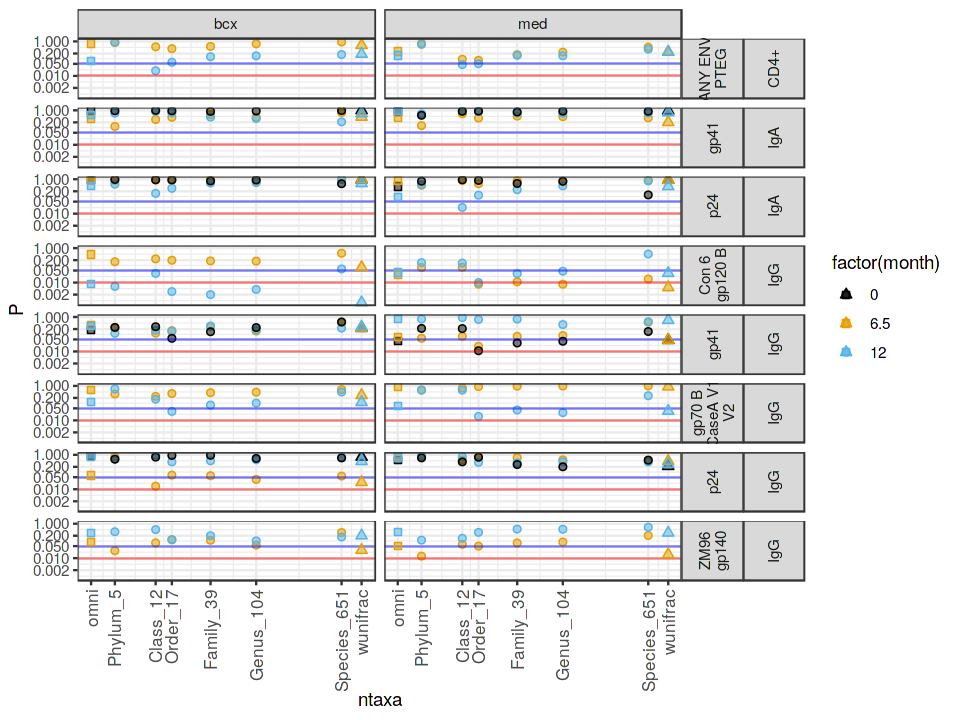

In [149]:
mirDat %>% 
#mutate(antigen = stringr::str_replace_all(antigen, "\\.", " ")) %>% 
fixstuff %>%
ggplot(aes(x = ntaxa, y = P, col = factor(month), fill = factor(month))) +
geom_point(pch = 21) +
facet_grid(type + antigen ~ metric, labeller = labeller(antigen = label_wrap_gen(width = 10))) + 
scale_x_log10(breaks = c(3, NTaxaAtLevel2$ntaxa, 1000), labels = c("omni", NTaxaAtLevel2$nLev, "wunifrac")) +
scale_y_log10(breaks = c(0.002, 0.01, 0.05, 0.2, 1)) + 
geom_hline(yintercept=0.05, col = 'blue', alpha = 0.5) + geom_hline(yintercept=0.01, col = 'red', alpha = 0.5) +
#geom_hline(data = mirOmni, aes(yintercept = P, col = factor(month))) +
#annotation_logticks(sides = 'bl') +
#geom_rug(data = mirOmni, aes(y = P, col = factor(month)), inherit.aes = F) +
geom_point(data = mirOmni %>% ungroup %>% fixstuff,
           aes(x = 3, y = P, col = factor(month), fill = factor(month)), inherit.aes = F, pch = 22, size = 2) +
geom_point(data = WufPData %>% ungroup %>% fixant,
           aes(x = 1000, y = mir.P, col = factor(month), fill = factor(month)), inherit.aes = F, pch = 24, size = 2) +

scale_colour_manual(values=cbPalette) + 
scale_fill_manual(values=alpha(cbPalette, 0.5)) + 
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90))) -> pjsd0

options(repr.plot.width=8, repr.plot.height= 6)
pjsd0
options(par0)
# I'd like to add weighted unifrac as a tick mark on the right.

In [150]:
NTaxaAtLevel2

nLev        taxLevels ntaxa
1 Phylum_5    Phylum      5  
2 Class_12    Class      12  
3 Order_17    Order      17  
4 Family_39   Family     39  
5 Genus_104   Genus     104  
6 Species_651 Species   651

In [151]:
# New combined data frame that has omnibus, regular, and wunifrac all in one
bind_rows(
     mirDat %>% mutate(metric =  stringr::str_replace_all(metric, "JSD", "")) %>%
    mutate(test = "JSD"),
     mirOmni %>% ungroup %>% mutate(metric =  stringr::str_replace_all(metric, "JSD", "")) %>%
    mutate(taxLevels = "Omnibus") %>% mutate(test = "Omnibus"),
     WufPData %>% ungroup %>% dplyr::rename(P = mir.P) %>%
    mutate(taxLevels = "WUnifrac") %>% mutate(test = "WUnifrac")
) %>% 
mutate(antigen = factor(antigen, levels = c(ants2, ants1, "ANY.ENV.PTEG"))) %>%
mutate(type = factor(type, levels = c("IgA", "IgG", "CD4+"))) %>%
mutate(taxLevels = factor(taxLevels, levels = c("Omnibus", NTaxaAtLevel2$taxLevels, "WUnifrac"))) %>%
dplyr::select(-c(bcxJSDOmni:medJSDOmni))%>%
unite(nLev, taxLevels, ntaxa, remove = FALSE) %>%
mutate(nLev = stringr::str_replace(nLev, "_NA", "")) %>%
#mutate(antigen = stringr::str_replace_all(antigen, "\\.", " ")) %>%
#mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
 mutate(antigen = factor(antigen, labels = stringr::str_replace_all(levels(antigen), "\\.", " "))) %>%
 mutate(antigen = factor(antigen, labels = stringr::str_replace_all(levels(antigen), "_", " "))) %>%


# mutate(antigen = factor(antigen, labels = (levels(antigen)))) %>%
# mutate(antigen = factor(antigen, labels = (levels(antigen)))) %>%

mutate(test = factor(test, levels = c('Omnibus', 'JSD', 'WUnifrac'))) %>%
pass -> mirDat2
mirDat2 %>% filter(type == 'CD4+')

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

type antigen      month nLev        taxLevels ntaxa metric P      test    
1  CD4+ ANY ENV PTEG  6.5  Phylum_5    Phylum      5   bcx    0.8540 JSD     
2  CD4+ ANY ENV PTEG  6.5  Class_12    Class      12   bcx    0.4900 JSD     
3  CD4+ ANY ENV PTEG  6.5  Order_17    Order      17   bcx    0.3810 JSD     
4  CD4+ ANY ENV PTEG  6.5  Family_39   Family     39   bcx    0.5120 JSD     
5  CD4+ ANY ENV PTEG  6.5  Genus_104   Genus     104   bcx    0.7290 JSD     
6  CD4+ ANY ENV PTEG  6.5  Species_651 Species   651   bcx    0.9340 JSD     
7  CD4+ ANY ENV PTEG 12.0  Phylum_5    Phylum      5   bcx    0.9090 JSD     
8  CD4+ ANY ENV PTEG 12.0  Class_12    Class      12   bcx    0.0200 JSD     
9  CD4+ ANY ENV PTEG 12.0  Order_17    Order      17   bcx    0.0620 JSD     
10 CD4+ ANY ENV PTEG 12.0  Family_39   Family     39   bcx    0.1300 JSD     
11 CD4+ ANY ENV PTEG 12.0  Genus_104   Genus     104   bcx    0.1460 JSD     
12 CD4+ ANY ENV PTEG 12.0  Species_651 Species   651   bcx    0.1730 JSD     
13 CD4+ ANY ENV PTEG  6.5  Phylum_5    Phylum      5   med    0.7590 JSD     
14 CD4+ ANY ENV PTEG  6.5  Class_12    Class      12   med    0.0930 JSD     
15 CD4+ ANY ENV PTEG  6.5  Order_17    Order      17   med    0.0800 JSD     
16 CD4+ ANY ENV PTEG  6.5  Family_39   Family     39   med    0.1710 JSD     
17 CD4+ ANY ENV PTEG  6.5  Genus_104   Genus     104   med    0.2400 JSD     
18 CD4+ ANY ENV PTEG  6.5  Species_651 Species   651   med    0.4680 JSD     
19 CD4+ ANY ENV PTEG 12.0  Phylum_5    Phylum      5   med    0.6750 JSD     
20 CD4+ ANY ENV PTEG 12.0  Class_12    Class      12   med    0.0450 JSD     
21 CD4+ ANY ENV PTEG 12.0  Order_17    Order      17   med    0.0510 JSD     
22 CD4+ ANY ENV PTEG 12.0  Family_39   Family     39   med    0.1560 JSD     
23 CD4+ ANY ENV PTEG 12.0  Genus_104   Genus     104   med    0.1480 JSD     
24 CD4+ ANY ENV PTEG 12.0  Species_651 Species   651   med    0.3570 JSD     
25 CD4+ ANY ENV PTEG  6.5  Omnibus     Omnibus    NA   bcx    0.7460 Omnibus 
26 CD4+ ANY ENV PTEG 12.0  Omnibus     Omnibus    NA   bcx    0.0725 Omnibus 
27 CD4+ ANY ENV PTEG  6.5  Omnibus     Omnibus    NA   med    0.2595 Omnibus 
28 CD4+ ANY ENV PTEG 12.0  Omnibus     Omnibus    NA   med    0.1515 Omnibus 
29 CD4+ ANY ENV PTEG  6.5  WUnifrac    WUnifrac   NA   med    0.2461 WUnifrac
30 CD4+ ANY ENV PTEG 12.0  WUnifrac    WUnifrac   NA   med    0.2417 WUnifrac
31 CD4+ ANY ENV PTEG  6.5  WUnifrac    WUnifrac   NA   bcx    0.6032 WUnifrac
32 CD4+ ANY ENV PTEG 12.0  WUnifrac    WUnifrac   NA   bcx    0.1868 WUnifrac

In [152]:
mirDat2 %>% head

type antigen month nLev        taxLevels ntaxa metric P     test
1 IgA  gp41    6.5   Phylum_5    Phylum      5   bcx    0.116 JSD 
2 IgA  gp41    6.5   Class_12    Class      12   bcx    0.294 JSD 
3 IgA  gp41    6.5   Order_17    Order      17   bcx    0.392 JSD 
4 IgA  gp41    6.5   Family_39   Family     39   bcx    0.568 JSD 
5 IgA  gp41    6.5   Genus_104   Genus     104   bcx    0.393 JSD 
6 IgA  gp41    6.5   Species_651 Species   651   bcx    0.738 JSD

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

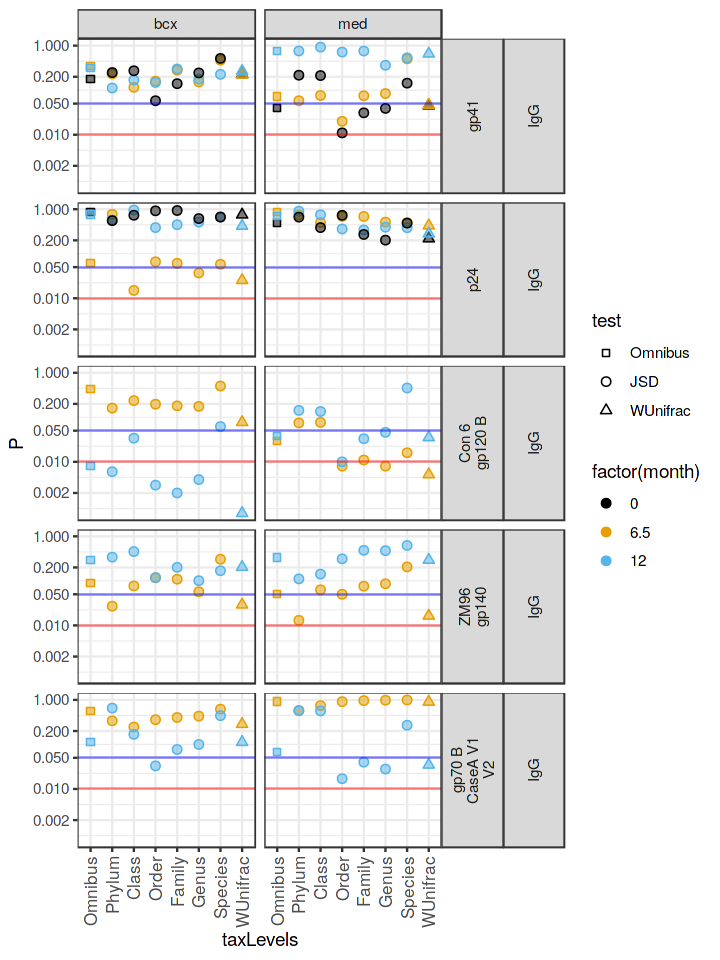

In [153]:
mirDat2 %>%
filter(type == "IgG") %>%
ggplot(aes(x = taxLevels, y = P, col = factor(month), fill = factor(month), shape = test)) +
geom_point(size = 2) +
facet_grid(type + antigen ~ metric, labeller = labeller(antigen = label_wrap_gen(width = 10))) + 
#scale_x_log10(breaks = c(3, NTaxaAtLevel2$ntaxa, 1000), labels = c("omni", NTaxaAtLevel2$nLev, "wunifrac")) +
scale_y_log10(breaks = c(0.002, 0.01, 0.05, 0.2, 1)) + 
geom_hline(yintercept=0.05, col = 'blue', alpha = 0.5) + geom_hline(yintercept=0.01, col = 'red', alpha = 0.5) +

scale_shape_manual(values = c(22, 21, 24)) +
scale_colour_manual(values=cbPalette) + 
scale_fill_manual(values=alpha(cbPalette, 0.5)) + 
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90))) -> pjsd


options(repr.plot.width=6, repr.plot.height= 8)
pjsd

ggsave('figures/KernelPVsLevel.png', width = 6, height = 8)
options(par0)

X-axis is now spaced evenly

Table SX. P values of kernel regression tests. Circles indicate jensen shannon values at different taxonomic resolutions. Squares are the omnibus p-value for that cohort of tests. Triangles indicate kernel regression p-values for the corresponding weighted unifrac test.

The blue and red lines indicate p values of 5% and 1% respectively.

Observations: The weighted unifrac test is sensitive. In cases where only one taxonic level hits, weighted unifrac often also falls at some statistically significant value. The omnibus p value is often higher than the weighted unifrac one.
Weighted unifrac seems like a good test for identifying patterns at any level that relate to an outcome. The jensen shannon informs us about which level the pattern is observed.

# Local Tests

## Family, genera and species vs wuf1
I might even be able to drill down to every level.

In [154]:
model_each_species <- function(ps, f, pthresh = 1, q = FALSE){
    # Start with the otu table
ps %>%
# reshape it so we have clr values for every taxon-sample pair
otu_table %>% as.data.frame %>% rownames_to_column("Sample") %>% gather(Taxon, clr, -Sample) %>%
    # bind that to the sample data
    # doing this here seems remarkably inefficient, but its not creating a bottleneck so I'll leave it.
left_join(
    ps %>%
    # the sample data need to have MDS1 and MDS2 appended to them
    phylo_join(
    psN2.pcoa %>% scores(display = "sites") %>% # hardcoded psN2.pcoa
        as.data.frame %>% 
        rownames_to_column %>% 
        dplyr::select('rowname', 'MDS1', 'MDS2'),
    by = 'rowname'
) %>%
    # back to binding to sample data
    sample_data %>% as('data.frame') %>% rownames_to_column("Sample"),
     by = 'Sample') %>%

group_by(Taxon) %>%  # group and nest for model run
nest %>%
mutate(Mod = map(data, f)) %>% # apply model over each species
mutate(Glance = map(Mod, glance), Tidy = map(Mod, tidy)) %>% # extract relevant data from model
# view model
dplyr::select(Taxon, Tidy) %>% unnest %>%
mutate(term = gsub('[\\( \\)]','', term)) %>% # remove parentheses from "(Intercept)"
gather(meas, val, estimate:p.value) %>% 
unite(meas, term, meas) %>% spread(meas, val) %>% arrange(clr_estimate) %>% 
dplyr::select(Taxon, Intercept_estimate, clr_estimate, clr_std.error, clr_p.value) %>%
    # add q value
    {if(q) mutate(., clr_q.value = p2q(clr_p.value)) else .} %>%
    
 filter(clr_p.value < pthresh) %>%

     #Join taxonomy information
     left_join(
     ps %>% tax_table %>% as.data.frame %>% as.tibble %>% dplyr::select(Kingdom:Genus, Species, tag) %>%
         mutate(tag = as.character(tag)), # mutate so tag is and taxon are both character class
     by = c("Taxon" = "tag")) %>%
pass
 }

In [155]:
model_each_species_for_antigen <- function(antigen, ps = psN2){
    ps %>%
    model_each_species(function(df){glm(medcode2(get(antigen)) ~ clr, data = df, family = 'binomial')}, q = TRUE, pthresh = 1)
}

In [156]:
ColsToRun <- c('IgG_Con.6.gp120.B_Month_6.5', 'IgG_Con.6.gp120.B_Month_12', 'IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_gp70_B.CaseA_V1_V2_Month_12', 'IgG_ZM96.gp140_Month_6.5', 'MDS1', 'isMale' ) 



In [157]:
model_each_species_case <- function(ps){
    
    ps %>% model_each_species(function(df){glm(MDS1 ~ clr, data = df, family = 'gaussian')}, q = TRUE, pthresh = 1) %>%
arrange(clr_estimate) %>%
mutate(Taxon = factor(Taxon, levels = Taxon[order(clr_estimate)])) %>%
    mutate(test = 'gaussian', antigen = 'MDS1') %>%
pass -> loc_mds1Glms
    
        ps %>% model_each_species(function(df){glm(log10(IgG_Con.6.gp120.B_Month_12 + 100) ~ clr, data = df, family = 'gaussian')}, q = TRUE, pthresh = 1) %>%
arrange(clr_estimate) %>%
 mutate(Taxon = factor(Taxon, levels = levels(loc_mds1Glms$Taxon))) %>%
    mutate(test = 'gaussian', antigen = 'Con.6.gp120.B_Month_12') %>%
 pass -> loc_gp120Glms
    
      tibble(antigen = ColsToRun) %>% mutate(model = map(antigen, ~model_each_species_for_antigen(., ps = ps))) %>%
  unnest %>% mutate(Taxon = factor(Taxon, levels = levels(loc_mds1Glms$Taxon))) %>%
        mutate(test = 'binomial') %>%
    pass-> loc_logitCoefs
    

    #list(loc_mds1Glms, loc_gp120Glms, loc_logitCoefs)
     bind_rows(loc_mds1Glms, loc_gp120Glms, loc_logitCoefs) %>% dplyr::select(test, antigen, everything())
    
}

In [158]:
#psDf %>% mutate(ps2 = map(ps, ~swap.phyloseq.taxnames(tag_phyloseq(remove_tag_phyloseq(.))))) -> test

In [159]:
#psDf[[1,"clr"]] %>% tax_table

In [160]:
psDf[[1]]

[1] "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"

In [161]:
psDf %>% print

# A tibble: 6 x 9
  taxLevels ntaxa psCount   ps       jsd     jsdMat    kjsd    psNoZero  clr    
  <chr>     <int> <list>    <list>   <list>  <list>    <list>  <list>    <list> 
1 Phylum        5 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
2 Class        12 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
3 Order        17 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
4 Family       39 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
5 Genus       104 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
6 Species     651 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…


In [162]:
ptm = proc.time()
psDf %>% dplyr::select(taxLevels, ntaxa, clr) %>% mutate(localmod = map(clr, model_each_species_case)) ->psDfLoc
proc.time() - ptm

Warning message:
“`as.tibble()` is deprecated, use `as_tibble()` (but mind the new semantics).
This warning is displayed once per session.”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit

   user  system elapsed 
 90.803   0.036  93.430 

In [163]:
print(psDfLoc)

# A tibble: 6 x 4
  taxLevels ntaxa clr            localmod             
  <chr>     <int> <list>         <list>               
1 Phylum        5 <S4: phyloseq> <tibble [50 × 15]>   
2 Class        12 <S4: phyloseq> <tibble [120 × 15]>  
3 Order        17 <S4: phyloseq> <tibble [170 × 15]>  
4 Family       39 <S4: phyloseq> <tibble [390 × 15]>  
5 Genus       104 <S4: phyloseq> <tibble [1,040 × 15]>
6 Species     651 <S4: phyloseq> <tibble [6,510 × 15]>


In [164]:
psDfLoc %>% dplyr::select(-clr) %>% unnest(localmod) -> tmp

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning mess

In [165]:
psDfLoc$taxLevels

[1] "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"

In [166]:
tmp %>% mutate(taxLevels = factor(taxLevels, levels = psDfLoc$taxLevels)) -> LocalTests

In [167]:
LocalTests %>% 
filter(antigen != "MDS1") %>%
write_csv("tables/AllLocalTests.csv")

## I want to show the local tests vs antibodies.

In [168]:
LocalTests %>% head

taxLevels ntaxa test     antigen                Taxon             
1 Phylum    5     gaussian MDS1                   Bacteroidetes     
2 Phylum    5     gaussian MDS1                   Porphyromonadaceae
3 Phylum    5     gaussian MDS1                   Actinobacteria    
4 Phylum    5     gaussian MDS1                   Campylobacter     
5 Phylum    5     gaussian MDS1                   Bacteria          
6 Phylum    5     gaussian Con.6.gp120.B_Month_12 Bacteria          
  Intercept_estimate clr_estimate clr_std.error clr_p.value clr_q.value
1  1.9443243         -0.7622328   0.2349166     0.004264256 0.01011813 
2 -1.0302247         -0.5143265   0.1765723     0.008923246 0.01058644 
3 -0.2010517         -0.1041377   0.2094541     0.624761928 0.29648421 
4  0.4385440          0.2418733   0.1060291     0.034245249 0.02708545 
5 -1.4206574          0.4445145   0.2587776     0.102097896 0.06056390 
6  3.7552950         -0.2854611   0.1713032     0.112032914 0.18672152 
  Kingdom  Phylum         Class                 Order            
1 Bacteria Bacteroidetes  NA                    NA               
2 Bacteria Bacteroidetes  Bacteroidia           Bacteroidales    
3 Bacteria Actinobacteria Actinobacteria        NA               
4 Bacteria Proteobacteria Epsilonproteobacteria Campylobacterales
5 Bacteria NA             NA                    NA               
6 Bacteria NA             NA                    NA               
  Family             Genus         Species
1 NA                 NA            NA     
2 Porphyromonadaceae NA            NA     
3 NA                 NA            NA     
4 Campylobacteraceae Campylobacter NA     
5 NA                 NA            NA     
6 NA                 NA            NA

Saving 6.67 x 6.67 in image


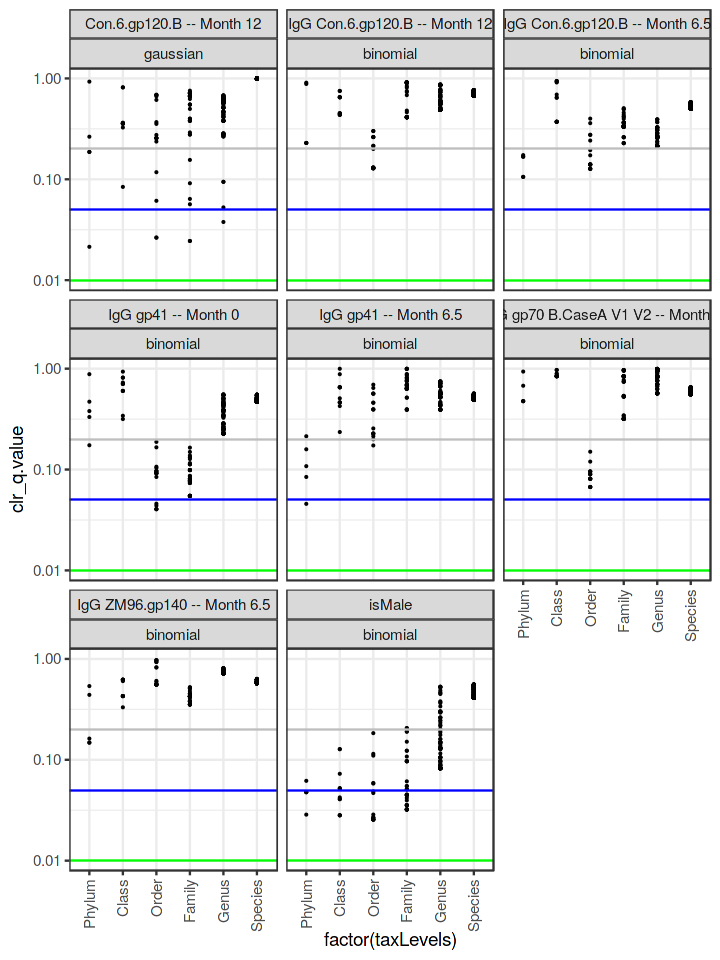

In [169]:
options(repr.plot.width=6, repr.plot.height=8)
LocalTests %>% 
filter(antigen != "MDS1") %>%
#Clean up labels
mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " Month", " -- Month")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " IgG ", "")) %>%
ggplot(aes(x = factor(taxLevels), y = clr_q.value)) + geom_point(size = 0.1) +
geom_hline(yintercept = 0.2, color = 'grey') +
 geom_hline(yintercept = 0.05, color = 'blue') + geom_hline(yintercept = 0.01, color = 'green') +
facet_wrap(~antigen + test) + scale_y_log10() +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

ggsave('figures/LocalQEveryLevel.png')

Saving 6.67 x 6.67 in image


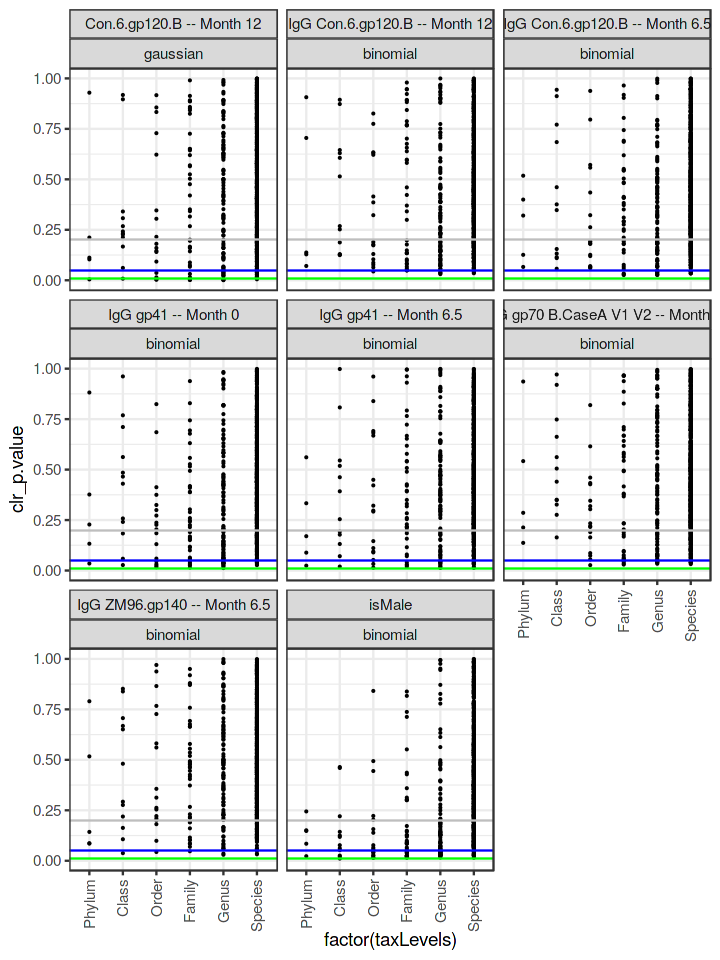

In [170]:
options(repr.plot.width=6, repr.plot.height=8)
LocalTests %>% 
filter(antigen != "MDS1") %>%
#Clean up labels
mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " Month", " -- Month")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " IgG ", "")) %>%
ggplot(aes(x = factor(taxLevels), y = clr_p.value)) + geom_point(size = 0.1) +
geom_hline(yintercept = 0.2, color = 'grey') +
 geom_hline(yintercept = 0.05, color = 'blue') + geom_hline(yintercept = 0.01, color = 'green') +
facet_wrap(~antigen + test) +# scale_y_log10() +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))
ggsave('figures/LocalPEveryLevel.png')

Saving 6.67 x 6.67 in image


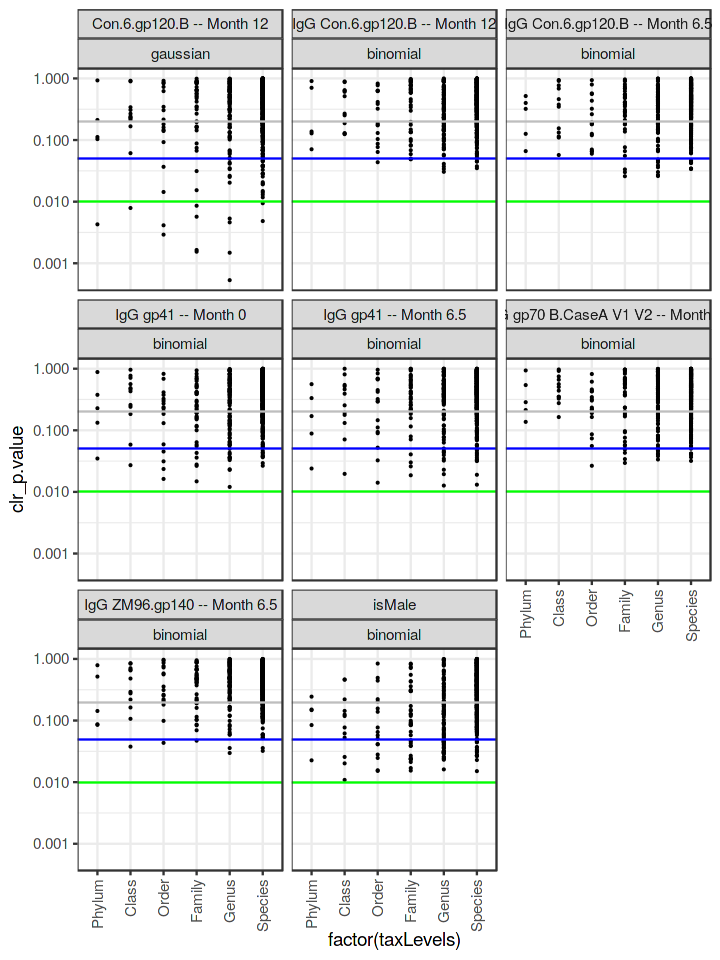

In [171]:
options(repr.plot.width=6, repr.plot.height=8)
LocalTests %>% 
filter(antigen != "MDS1") %>%
#Clean up labels
mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " Month", " -- Month")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " IgG ", "")) %>%
ggplot(aes(x = factor(taxLevels), y = clr_p.value)) + geom_point(size = 0.1) +
geom_hline(yintercept = 0.2, color = 'grey') +
 geom_hline(yintercept = 0.05, color = 'blue') + geom_hline(yintercept = 0.01, color = 'green') +
facet_wrap(~antigen + test) + scale_y_log10() +
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))
ggsave('figures/LocalPEveryLevel_LogScale.png')

In [172]:
order_taxa_by_mds1 <- function(df){
    # this has to be a model_each_species type of data frame
    df %>% filter(antigen == 'MDS1' & test == 'gaussian') %>%
    mutate(TaxonF = factor(Taxon, levels = Taxon[order(clr_estimate)])) -> mds1df
    df %>% mutate(TaxonF = factor(Taxon, levels = levels(mds1df$TaxonF)))
}

To my annoyance, everything is labeled with IgG except gp120_12

In [173]:
LocalTests %>%
filter(taxLevels == 'Family') %>%
order_taxa_by_mds1 %>%

filter(
    (antigen %in% c('IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_Con.6.gp120.B_Month_6.5'))|
    (antigen == 'Con.6.gp120.B_Month_12' & test == 'gaussian')
      ) %>%
mutate(antigen = factor(antigen,
                        levels = c('IgG_gp41_Month_0', 'IgG_gp41_Month_6.5',
                                   'IgG_Con.6.gp120.B_Month_6.5', 'Con.6.gp120.B_Month_12'))) %>%
filter(clr_p.value < 0.05 & clr_q.value < 0.2) %>%
dplyr::select(antigen:clr_estimate) %>%
dplyr::select(-Intercept_estimate) %>%
mutate(cordir = sign(clr_estimate)) %>%
pass

antigen                Taxon                clr_estimate cordir
1  Con.6.gp120.B_Month_12 Bacteroidetes.4      -0.3067043   -1    
2  Con.6.gp120.B_Month_12 Firmicutes.4         -0.2948059   -1    
3  Con.6.gp120.B_Month_12 Firmicutes.2         -0.1574782   -1    
4  Con.6.gp120.B_Month_12 Clostridia           -0.1430810   -1    
5  Con.6.gp120.B_Month_12 Bacteroides           0.2039353    1    
6  Con.6.gp120.B_Month_12 Firmicutes.5          0.2072785    1    
7  IgG_gp41_Month_0       Porphyromonadaceae.1 -2.1234799   -1    
8  IgG_gp41_Month_0       Porphyromonadaceae   -1.6898656   -1    
9  IgG_gp41_Month_0       Bacteroidetes.1      -1.1970959   -1    
10 IgG_gp41_Month_0       Clostridia            1.3111506    1    
11 IgG_gp41_Month_0       Anaerococcus          1.5256300    1

In [174]:
LocalTests %>% pull(antigen) %>% unique

[1] "MDS1"                            "Con.6.gp120.B_Month_12"         
[3] "IgG_Con.6.gp120.B_Month_6.5"     "IgG_Con.6.gp120.B_Month_12"     
[5] "IgG_gp41_Month_0"                "IgG_gp41_Month_6.5"             
[7] "IgG_gp70_B.CaseA_V1_V2_Month_12" "IgG_ZM96.gp140_Month_6.5"       
[9] "isMale"

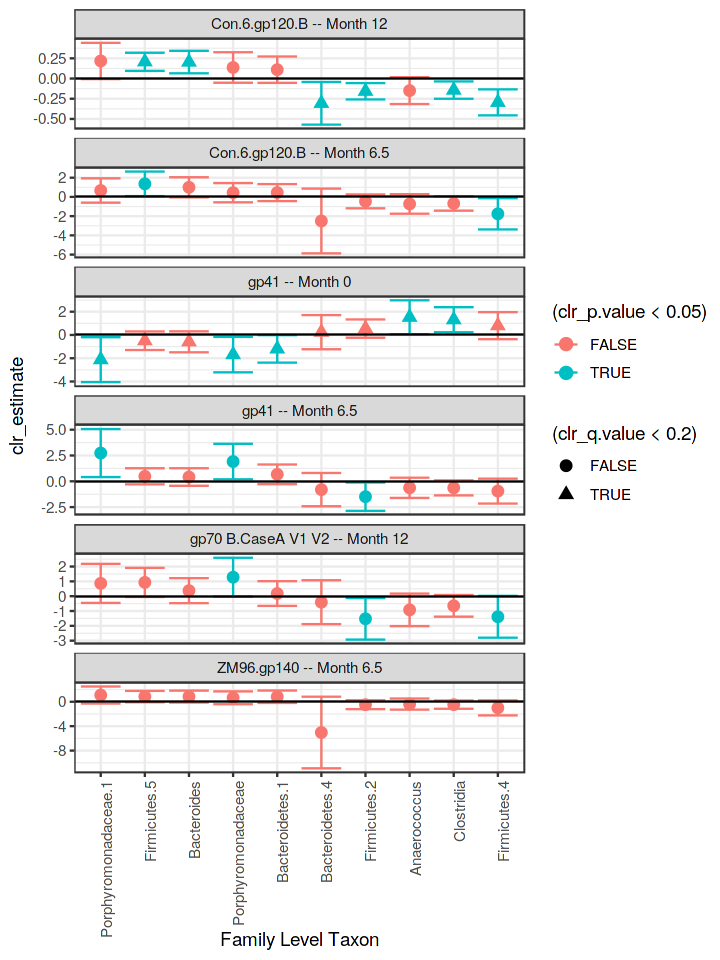

In [175]:
# Family Hits
LocalTests %>%
filter(taxLevels == 'Family') %>%
order_taxa_by_mds1 %>%

filter(
    (antigen %in% c('IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_Con.6.gp120.B_Month_6.5', 
                    'IgG_ZM96.gp140_Month_6.5','IgG_gp70_B.CaseA_V1_V2_Month_12'))|
    (antigen == 'Con.6.gp120.B_Month_12' & test == 'gaussian')
      ) %>%
mutate(antigen = factor(antigen, levels = c(
    'IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_Con.6.gp120.B_Month_6.5', 'Con.6.gp120.B_Month_12',
    'IgG_ZM96.gp140_Month_6.5','IgG_gp70_B.CaseA_V1_V2_Month_12'
))) %>%

pass -> tmp

#tmp$antigen %>% unique

tmp %>% filter(clr_p.value < 0.05 & clr_q.value < 0.2) %>%
pull(Taxon) %>% unique -> useFamily

tmp %>% filter(Taxon %in% useFamily) %>%

#Clean up labels
mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " Month", " -- Month")) %>%
mutate(antigen = stringr::str_replace_all(antigen, "IgG ", "")) %>%

ggplot(aes(x = TaxonF, y = clr_estimate,
           color = (clr_p.value < 0.05), shape =(clr_q.value < 0.2))) +
geom_point(size = 3) + 
geom_errorbar(aes(ymin = clr_estimate - 2*clr_std.error, ymax = clr_estimate + 2*clr_std.error)) + 
theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + geom_hline(yintercept = 0) +
facet_wrap(~antigen, ncol = 1, scales = 'free_y') + xlab("Family Level Taxon")
# Show the censored ones accross - so this would be everything with at least one hit
# but also show what they are in all cases.

ggsave('figures/anyFamilyIgg.png', width = 6, height = 8)

I think its worth digging into clostridia and Prophyromonidaceae with stacked bars

# Proportionality heatmap

Family level

Lets come back to this after we've done the local tests. Since we need them to color code the axes.

In [176]:
psDf %>% print

# A tibble: 6 x 9
  taxLevels ntaxa psCount   ps       jsd     jsdMat    kjsd    psNoZero  clr    
  <chr>     <int> <list>    <list>   <list>  <list>    <list>  <list>    <list> 
1 Phylum        5 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
2 Class        12 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
3 Order        17 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
4 Family       39 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
5 Genus       104 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
6 Species     651 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…


In [177]:
psDf %>% filter(taxLevels == 'Family') %>% dplyr::select(ps) %>% pull %>%.[[1]]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 39 taxa and 21 samples ]
sample_data() Sample Data:       [ 21 samples by 35 sample variables ]
tax_table()   Taxonomy Table:    [ 39 taxa by 12 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 39 tips and 38 internal nodes ]

In [178]:
print(psDf)

# A tibble: 6 x 9
  taxLevels ntaxa psCount   ps       jsd     jsdMat    kjsd    psNoZero  clr    
  <chr>     <int> <list>    <list>   <list>  <list>    <list>  <list>    <list> 
1 Phylum        5 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
2 Class        12 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
3 Order        17 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
4 Family       39 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
5 Genus       104 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…
6 Species     651 <S4: phy… <S4: ph… <S3: d… <dbl [21… <dbl [… <S4: phy… <S4: p…


In [179]:
#nFamilyTaxa <- NTaxaAtLevel %>% filter(taxLevels == 'Family') %>% pull(ntaxa)

psDf %>% filter(taxLevels == 'Family') %>% dplyr::select(psNoZero) %>% pull %>%.[[1]] %>%
otu_table %>% as.data.frame %>%
pass -> myRel

ptm = proc.time()
phiBoot <- boot(data = myRel, statistic = boot_phi, R = 1000)
proc.time() - ptm

ptm = proc.time()
tidyCI <- unwarn(
    tidy(phiBoot,conf.int=TRUE,conf.method="bca")
    )
proc.time() - ptm

myRel %>% make_proportionality_matrix %>% 
         as.data.frame %>%
         rownames_to_column("TaxonX") %>% gather(TaxonY, phi, -TaxonX) %>%
    filter(TaxonX != TaxonY) %>% data.frame(tidyCI) -> namedTidyCI

   user  system elapsed 
 12.726   0.011  13.013 

   user  system elapsed 
 18.053   0.024  18.386 

In [180]:
head(LocalTests)

taxLevels ntaxa test     antigen                Taxon             
1 Phylum    5     gaussian MDS1                   Bacteroidetes     
2 Phylum    5     gaussian MDS1                   Porphyromonadaceae
3 Phylum    5     gaussian MDS1                   Actinobacteria    
4 Phylum    5     gaussian MDS1                   Campylobacter     
5 Phylum    5     gaussian MDS1                   Bacteria          
6 Phylum    5     gaussian Con.6.gp120.B_Month_12 Bacteria          
  Intercept_estimate clr_estimate clr_std.error clr_p.value clr_q.value
1  1.9443243         -0.7622328   0.2349166     0.004264256 0.01011813 
2 -1.0302247         -0.5143265   0.1765723     0.008923246 0.01058644 
3 -0.2010517         -0.1041377   0.2094541     0.624761928 0.29648421 
4  0.4385440          0.2418733   0.1060291     0.034245249 0.02708545 
5 -1.4206574          0.4445145   0.2587776     0.102097896 0.06056390 
6  3.7552950         -0.2854611   0.1713032     0.112032914 0.18672152 
  Kingdom  Phylum         Class                 Order            
1 Bacteria Bacteroidetes  NA                    NA               
2 Bacteria Bacteroidetes  Bacteroidia           Bacteroidales    
3 Bacteria Actinobacteria Actinobacteria        NA               
4 Bacteria Proteobacteria Epsilonproteobacteria Campylobacterales
5 Bacteria NA             NA                    NA               
6 Bacteria NA             NA                    NA               
  Family             Genus         Species
1 NA                 NA            NA     
2 Porphyromonadaceae NA            NA     
3 NA                 NA            NA     
4 Campylobacteraceae Campylobacter NA     
5 NA                 NA            NA     
6 NA                 NA            NA

In [181]:
LocalTests %>% filter(test == 'gaussian' &
                        antigen == 'MDS1' &
                         clr_p.value <0.05 &
                        clr_q.value < 0.2&
                        taxLevels == "Family") -> tmp
tmp %>% pull(Taxon) -> MDS1Fam
tmp %>% filter(clr_estimate < 0) %>% pull(Taxon) -> lowMDS1Fam
tmp %>% filter(clr_estimate >= 0) %>% pull(Taxon) -> highMDS1Fam

https://stackoverflow.com/questions/48531987/incorporate-more-information-about-variables-on-axes-into-a-heatmap-in-ggplot/48532983#48532983

I'd like to do this, but for gp41 baseline and gp120 as well.

In [182]:
useFamily

[1] "Bacteroidetes.4"      "Firmicutes.4"         "Firmicutes.2"        
 [4] "Clostridia"           "Bacteroides"          "Firmicutes.5"        
 [7] "Porphyromonadaceae.1" "Porphyromonadaceae"   "Bacteroidetes.1"     
[10] "Anaerococcus"

In [183]:
LocalTests %>% head

taxLevels ntaxa test     antigen                Taxon             
1 Phylum    5     gaussian MDS1                   Bacteroidetes     
2 Phylum    5     gaussian MDS1                   Porphyromonadaceae
3 Phylum    5     gaussian MDS1                   Actinobacteria    
4 Phylum    5     gaussian MDS1                   Campylobacter     
5 Phylum    5     gaussian MDS1                   Bacteria          
6 Phylum    5     gaussian Con.6.gp120.B_Month_12 Bacteria          
  Intercept_estimate clr_estimate clr_std.error clr_p.value clr_q.value
1  1.9443243         -0.7622328   0.2349166     0.004264256 0.01011813 
2 -1.0302247         -0.5143265   0.1765723     0.008923246 0.01058644 
3 -0.2010517         -0.1041377   0.2094541     0.624761928 0.29648421 
4  0.4385440          0.2418733   0.1060291     0.034245249 0.02708545 
5 -1.4206574          0.4445145   0.2587776     0.102097896 0.06056390 
6  3.7552950         -0.2854611   0.1713032     0.112032914 0.18672152 
  Kingdom  Phylum         Class                 Order            
1 Bacteria Bacteroidetes  NA                    NA               
2 Bacteria Bacteroidetes  Bacteroidia           Bacteroidales    
3 Bacteria Actinobacteria Actinobacteria        NA               
4 Bacteria Proteobacteria Epsilonproteobacteria Campylobacterales
5 Bacteria NA             NA                    NA               
6 Bacteria NA             NA                    NA               
  Family             Genus         Species
1 NA                 NA            NA     
2 Porphyromonadaceae NA            NA     
3 NA                 NA            NA     
4 Campylobacteraceae Campylobacter NA     
5 NA                 NA            NA     
6 NA                 NA            NA

In [184]:
reshape2::melt

function (data, ..., na.rm = FALSE, value.name = "value") 
{
    UseMethod("melt", data)
}
<environment: namespace:reshape2>

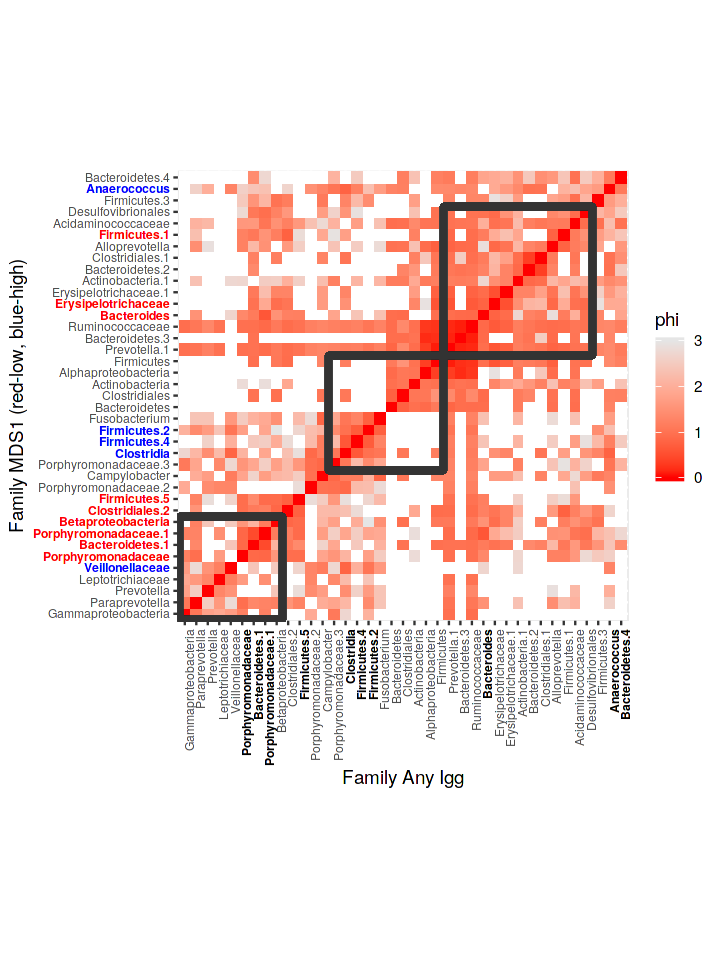

In [185]:
targStat <- "phi"
namedTidyCI %>% dplyr::select(TaxonX, TaxonY, targStat) %>% spread(key = TaxonY, value = targStat) %>%
remove_rownames %>% column_to_rownames("TaxonX") %>%
as.dist %>% as.matrix -> phidata

phi_dd <- as.dist(phidata)
phi_hc <- hclust(phi_dd)

phidata %>%
#.[phi_hc$order, phi_hc$order] %>% # this way also worked just fine
reshape2::melt() %>%
mutate(Var1 = factor(Var1, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
mutate(Var2 = factor(Var2, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
pass-> tmp

p_phi_1 <- ggplot(tmp, aes(Var1, Var2, fill =(value))) + 
geom_tile() +
  scale_fill_gradient(high = "grey90", low = "red", 
    space = "Lab", 
    name="phi",
                    limits = c(NA, 3), na.value = "white") +
#  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(
     angle = 90, vjust = 1, size = 7, hjust = 1,
     face = ifelse(levels(tmp$Var1) %in% useFamily, "bold", "plain"),
     colour = ifelse(levels(tmp$Var1) %in% useFamily, "black", "grey30")
                                 ),
       axis.text.y = element_text(
           size = 7,
           face = ifelse(levels(tmp$Var1) %in% MDS1Fam, "bold", "plain"),
           colour = ifelse(levels(tmp$Var1) %in% lowMDS1Fam, "red",
                          ifelse(levels(tmp$Var1) %in% highMDS1Fam, "blue", "grey30"))
       ))+
 coord_fixed() +
labs(x = "Family Any Igg",y = "Family MDS1 (red-low, blue-high)" ) +
# rectangles around the three clusters, positioned by eye
  geom_rect(aes(xmin = 0 + 0.5, xmax = 10 - 0.5, ymin = 0 + 0.5, ymax = 10 - 0.5),
               fill = "transparent", color = "gray20", size = 1.5) +
  geom_rect(aes(xmin = 13 + 0.5, xmax = 24 - 0.5, ymin = 13 + 0.5, ymax = 24 - 0.5),
               fill = "transparent", color = "gray20", size = 1.5) +
  geom_rect(aes(xmin = 23 + 0.5, xmax = 37 - 0.5, ymin = 23 + 0.5, ymax = 37 - 0.5),
               fill = "transparent", color = "gray20", size = 1.5)


p_phi_1
# ggsave("figures/phi_vs_mds1_and_igg.png", p_phi_1, width = 6, height = 6)

In [186]:
LocalTests %>%
filter(taxLevels == 'Family') %>%
order_taxa_by_mds1 %>%

filter(
    (antigen %in% c('IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_Con.6.gp120.B_Month_6.5',
                   'IgG_ZM96.gp140_Month_6.5','IgG_gp70_B.CaseA_V1_V2_Month_12'))|
    (antigen == 'Con.6.gp120.B_Month_12' & test == 'gaussian')
      ) %>%
mutate(antigen = factor(antigen, levels = c('IgG_gp41_Month_0', 'IgG_gp41_Month_6.5', 'IgG_Con.6.gp120.B_Month_6.5', 'Con.6.gp120.B_Month_12',
                                           'IgG_ZM96.gp140_Month_6.5','IgG_gp70_B.CaseA_V1_V2_Month_12'))) %>%
pass -> tmp

tmp %>% dplyr::select(antigen, Taxon, clr_estimate, clr_p.value, clr_q.value) %>%
mutate(clr_sign = sign(clr_estimate)) %>%
mutate(isHit = ifelse(clr_p.value < 0.05 & clr_q.value < 0.2, 1, 0)) %>%
mutate(Taxon = factor(Taxon, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
pass -> chorddata

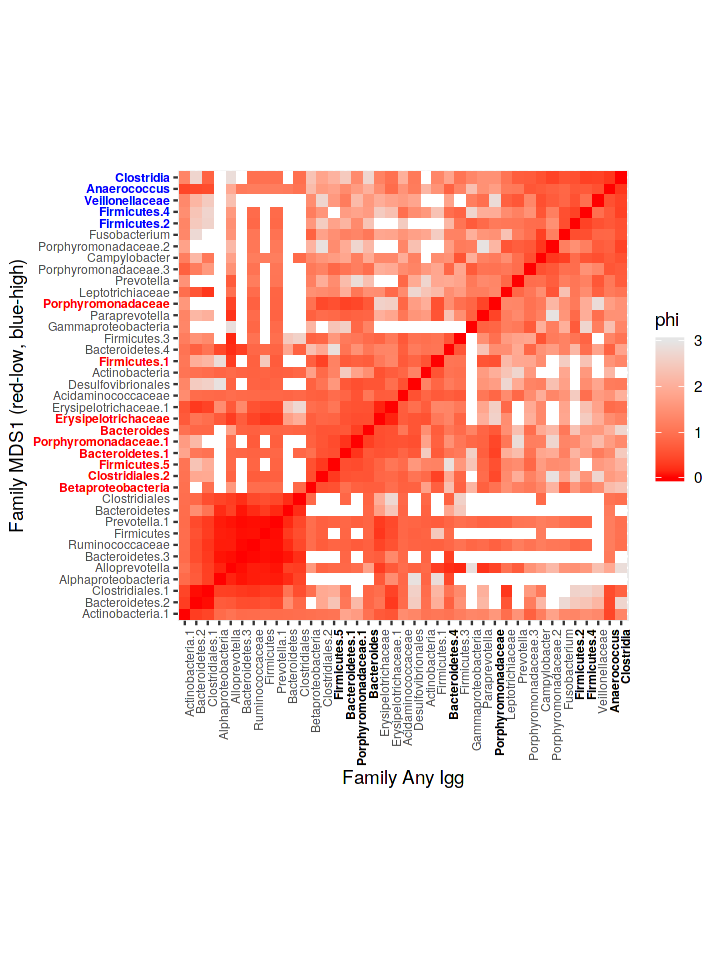

In [187]:
targStat <- "conf.low"
namedTidyCI %>% dplyr::select(TaxonX, TaxonY, targStat) %>% spread(key = TaxonY, value = targStat) %>%
remove_rownames %>% column_to_rownames("TaxonX") %>%
as.dist %>% as.matrix -> phidata

phi_dd <- as.dist(phidata)
phi_hc <- hclust(phi_dd)

phidata %>%
#.[phi_hc$order, phi_hc$order] %>% # this way also worked just fine
reshape2::melt() %>%
mutate(Var1 = factor(Var1, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
mutate(Var2 = factor(Var2, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
pass-> tmp

ggplot(tmp, aes(Var1, Var2, fill =(value))) + 
geom_tile() +
  scale_fill_gradient(high = "grey90", low = "red", 
    space = "Lab", 
    name="phi",
                    limits = c(NA, 3), na.value = "white") +
#  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(
     angle = 90, vjust = 1, size = 7, hjust = 1,
     face = ifelse(levels(tmp$Var1) %in% useFamily, "bold", "plain"),
     colour = ifelse(levels(tmp$Var1) %in% useFamily, "black", "grey30")
                                 ),
       axis.text.y = element_text(
           size = 7,
           face = ifelse(levels(tmp$Var1) %in% MDS1Fam, "bold", "plain"),
           colour = ifelse(levels(tmp$Var1) %in% lowMDS1Fam, "red",
                          ifelse(levels(tmp$Var1) %in% highMDS1Fam, "blue", "grey30"))
       ))+
 coord_fixed() +
labs(x = "Family Any Igg",y = "Family MDS1 (red-low, blue-high)" )-> p_phi_low
p_phi_low

# ggsave("figures/phi_vs_mds1_and_igg.png", p_phi_1, width = 6, height = 6)

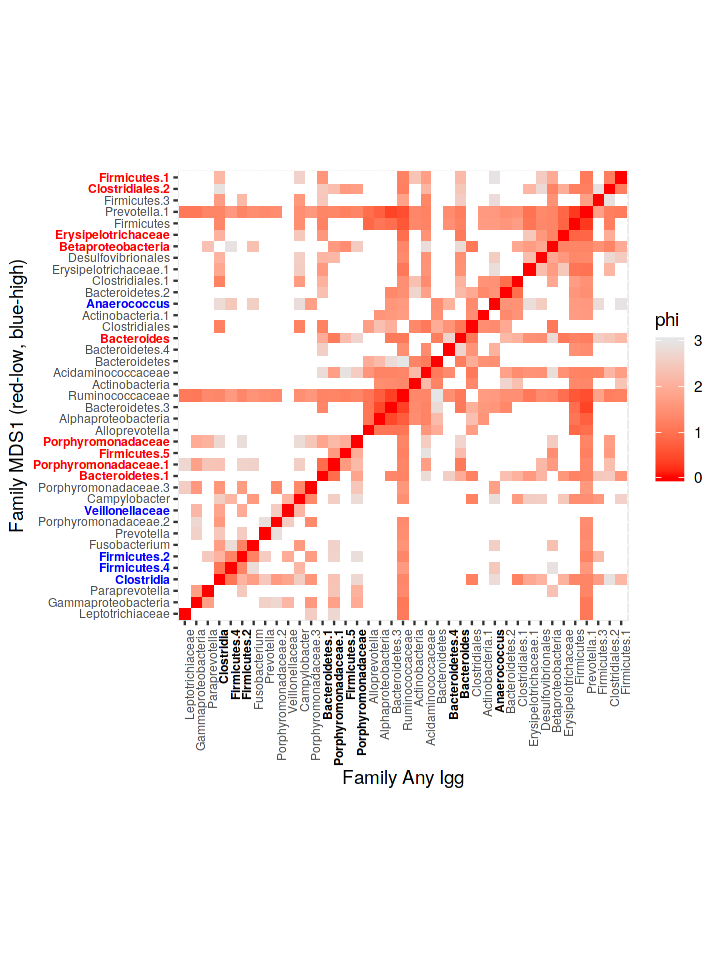

In [188]:
targStat <- "conf.high"
namedTidyCI %>% dplyr::select(TaxonX, TaxonY, targStat) %>% spread(key = TaxonY, value = targStat) %>%
remove_rownames %>% column_to_rownames("TaxonX") %>%
as.dist %>% as.matrix -> phidata

phi_dd <- as.dist(phidata)
phi_hc <- hclust(phi_dd)

phidata %>%
#.[phi_hc$order, phi_hc$order] %>% # this way also worked just fine
reshape2::melt() %>%
mutate(Var1 = factor(Var1, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
mutate(Var2 = factor(Var2, levels = unique(phi_hc$labels)[phi_hc$order])) %>%
pass-> tmp

ggplot(tmp, aes(Var1, Var2, fill =(value))) + 
geom_tile() +
  scale_fill_gradient(high = "grey90", low = "red", 
    space = "Lab", 
    name="phi",
                    limits = c(NA, 3), na.value = "white") +
#  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(
     angle = 90, vjust = 1, size = 7, hjust = 1,
     face = ifelse(levels(tmp$Var1) %in% useFamily, "bold", "plain"),
     colour = ifelse(levels(tmp$Var1) %in% useFamily, "black", "grey30")
                                 ),
       axis.text.y = element_text(
           size = 7,
           face = ifelse(levels(tmp$Var1) %in% MDS1Fam, "bold", "plain"),
           colour = ifelse(levels(tmp$Var1) %in% lowMDS1Fam, "red",
                          ifelse(levels(tmp$Var1) %in% highMDS1Fam, "blue", "grey30"))
       ))+
 coord_fixed() +
labs(x = "Family Any Igg",y = "Family MDS1 (red-low, blue-high)" )-> p_phi_high
p_phi_high
# ggsave("figures/phi_vs_mds1_and_igg.png", p_phi_1, width = 6, height = 6)

Warning message:
“Using alpha for a discrete variable is not advised.”

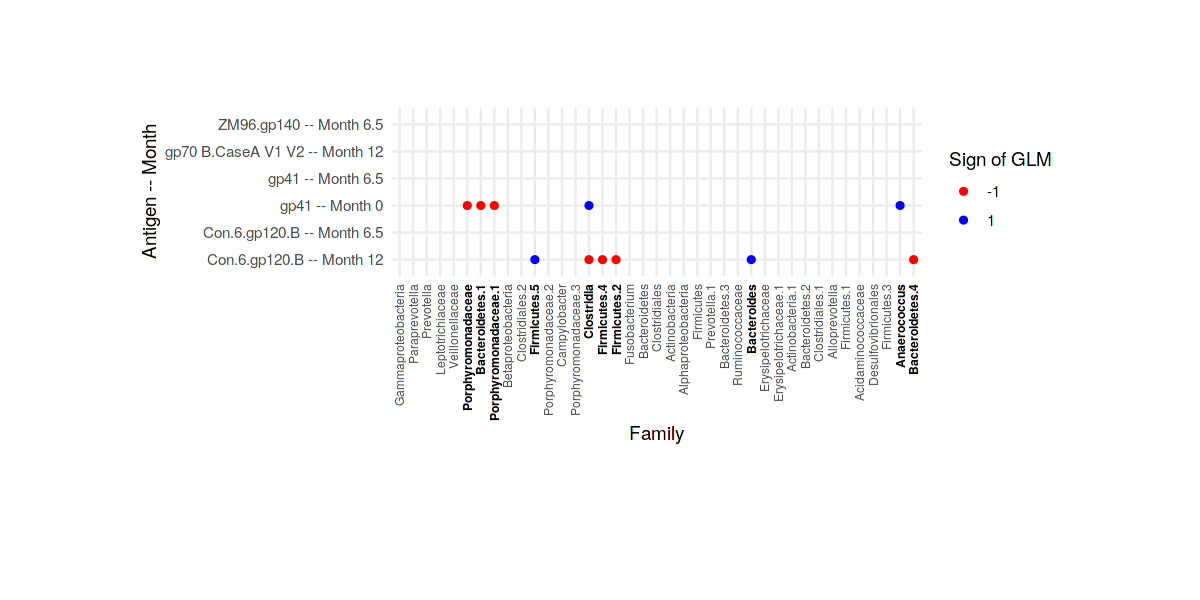

In [189]:
chorddata %>%
#Clean up labels
mutate(antigen = stringr::str_replace_all(antigen, "_", " ")) %>%
mutate(antigen = stringr::str_replace_all(antigen, " Month", " -- Month")) %>%
mutate(antigen = stringr::str_replace_all(antigen, "IgG ", "")) %>%

ggplot(
    aes(x = Taxon, y = antigen, alpha = factor(isHit), color = factor(clr_sign))) +
scale_alpha_discrete(range = c(0, 1)) +
guides(alpha = FALSE) +
theme_minimal() +
     coord_fixed(ratio = 2) +
scale_colour_manual(values = c("red", "blue")) +
 theme(axis.text.x = element_text(
     angle = 90, vjust = 0.5, size = 7, hjust = 1,
     face = ifelse(levels(chorddata$Taxon) %in% useFamily, "bold", "plain"),
     colour = ifelse(levels(chorddata$Taxon) %in% useFamily, "black", "grey30")),
     plot.margin = unit(c(0,3,1,3), "cm")
     ) +
#guides(col = TRUE) +
guides(color=guide_legend(title="Sign of GLM")) +
labs(x = "Family",y = "Antigen -- Month" ) +
geom_point() -> guitar_chords



par <- options()
options(repr.plot.width=10, repr.plot.height= 5)
guitar_chords
options(par)

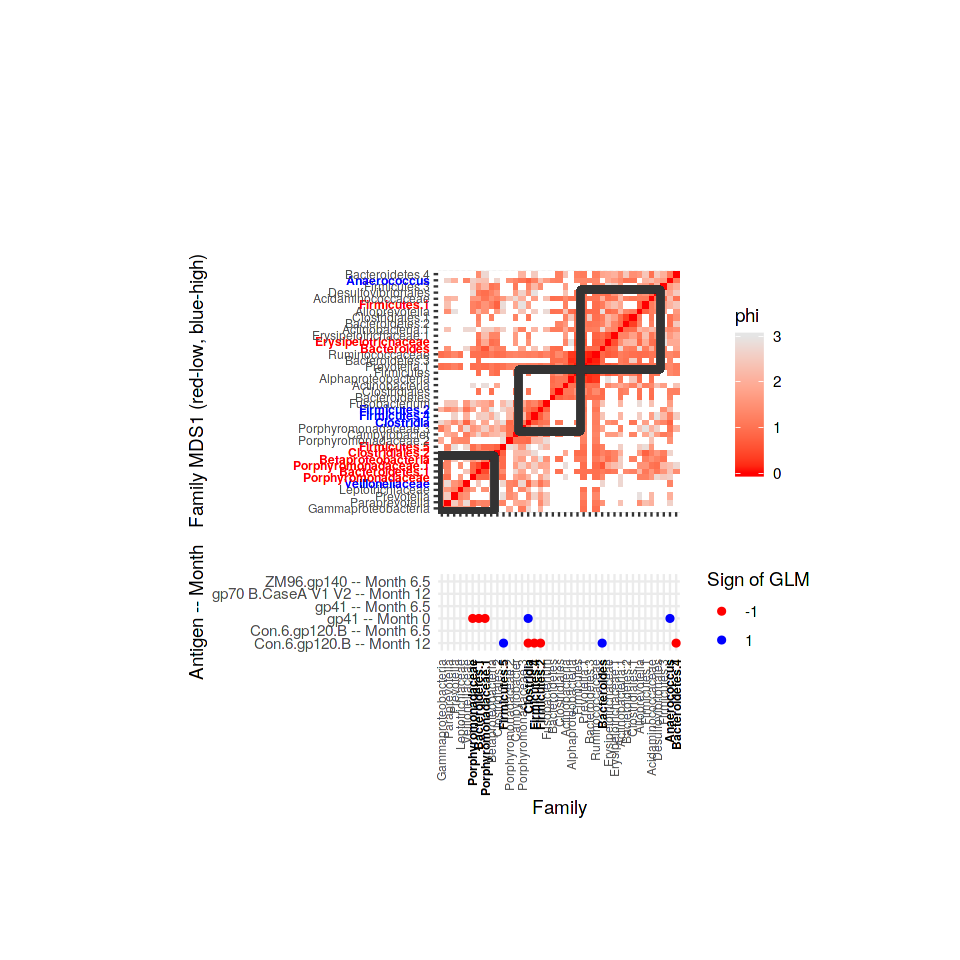

In [190]:
p_phi_1a <- p_phi_1 + 
theme(axis.text.x = element_blank(),
     axis.title.x = element_blank(),
     plot.margin = unit(c(1, 3, -5.5, 4), "cm"))

par <- options()
options(repr.plot.width=8, repr.plot.height= 8)

p_phi_cord <- cowplot::plot_grid(p_phi_1a, guitar_chords, nrow = 2, align = "v")

p_phi_cord

#phi_legend <- cowplot::get_legend(p_phi_1)
# cowplot::ggdraw(
#     cowplot::plot_grid(
#     cowplot::plot_grid(p_phi_1a, guitar_chords, ncol = 1, align = "v"),
#       cowplot::plot_grid(phi_legend, NULL, ncol = 1),
#       rel_widths = c(10,1)
#         ))

 ggsave('figures/phi_heatmap_withlegend.png', width = 10, height = 10)

options(par)

# Stacked bars

In [191]:
# More color-blind friendly colorbalettes
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=10
cb10 <- c('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a')

cb12 <- c('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928')

# Less color-blind friendly, but still nice.
#https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
trub20 <- c('#e6194b','#3cb44b','#ffe119','#0082c8','#f58231','#911eb4','#46f0f0','#f032e6','#d2f53c','#fabebe','#008080','#e6beff','#aa6e28','#fffac8','#800000','#aaffc3','#808000','#ffd8b1','#000080','#808080','#FFFFFF','#000000')

In [192]:
options(repr.plot.width=8, repr.plot.height= 4)

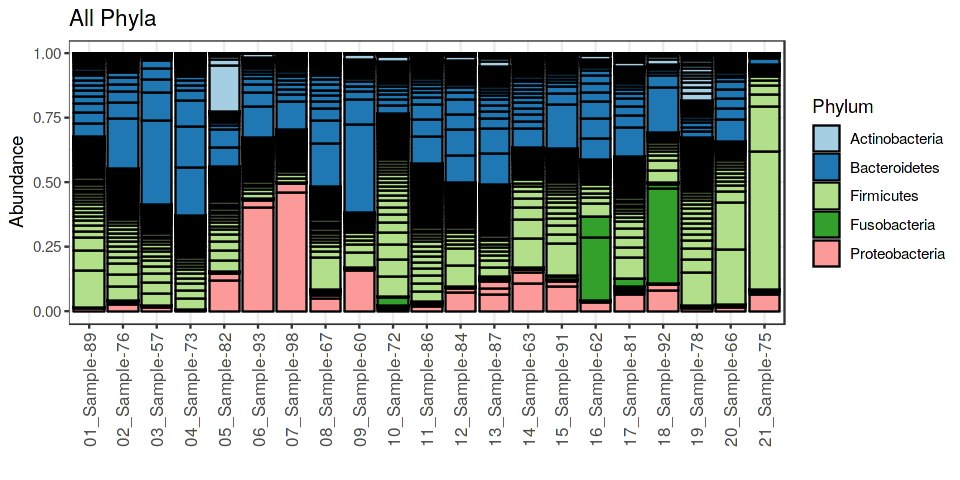

In [193]:
p_phy <- plot_bar(psN2, x = 'newname', fill = 'Phylum') + scale_fill_manual(values = cb10)  + xlab("") +
ggtitle("All Phyla")+ theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90)))
p_phy
#ggsave('plots/Phyla_by_wuf1.png')

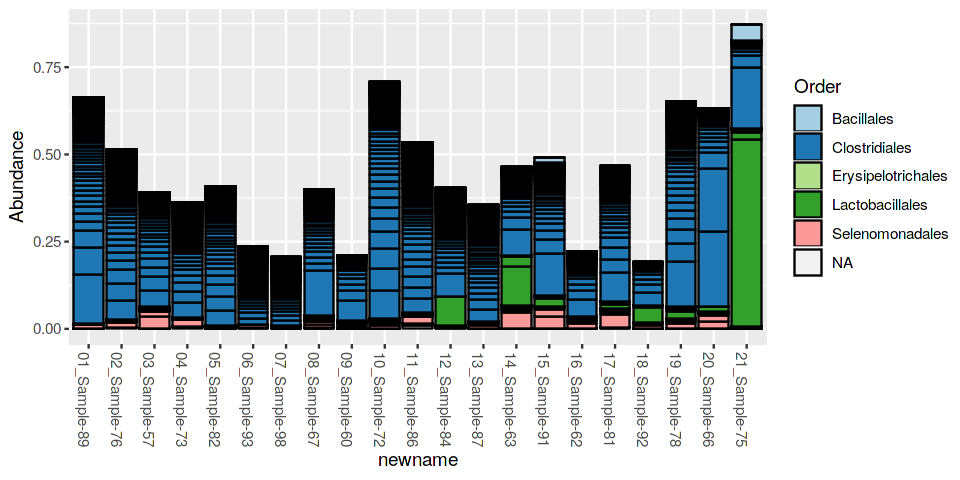

In [194]:
p_firm <-  subset_taxa(psN2, Phylum == 'Firmicutes') %>%
plot_bar( x = 'newname', fill = 'Order') + scale_fill_manual(values = cb10) #+ theme_bw()
p_firm
#ggsave('plots/MostFirmicutesAreClostridiales.png')

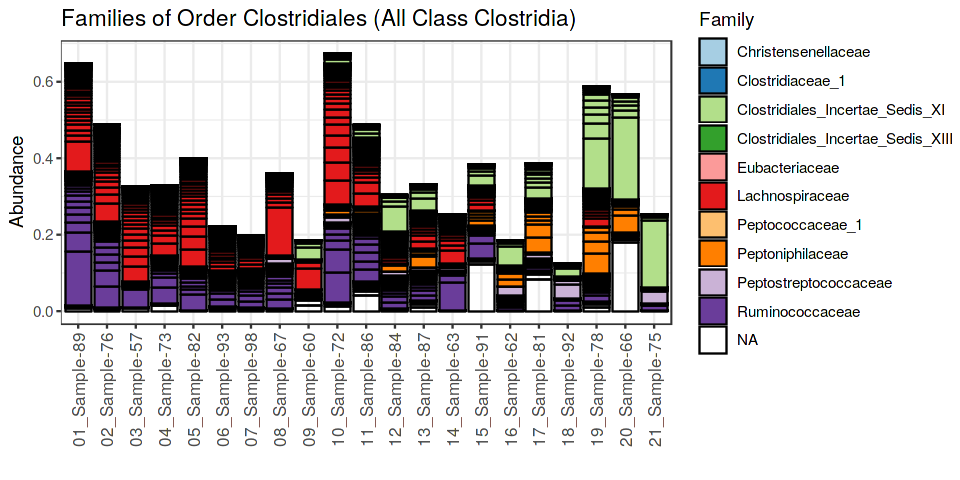

In [195]:
p_clostridia <-  subset_taxa(psN2, Class == 'Clostridia') %>%
plot_bar( x = 'newname', fill = 'Family') + scale_fill_manual(values = cb10)  + xlab("") +
ggtitle("Families of Order Clostridiales (All Class Clostridia)")+ theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90)))
p_clostridia

In [196]:
# p_porph <-  subset_taxa(psN2, Family == 'Porphyromonadaceae') %>%
# plot_bar( x = 'newname', fill = 'Genus') + scale_fill_manual(values = cb10) #+ theme_bw()
# p_porph

In [197]:
# p_bact <- subset_taxa(psN2, Phylum == 'Bacteroidetes') %>% # all class (Bacteroidia), order (Bacteroidales)
# plot_bar(x = 'newname', fill = 'Family') + scale_fill_manual(values = cb10) #+ theme_bw()
# p

# ggsave('figures/Bacteroidetes_Families.png')

Saving 6.67 x 6.67 in image


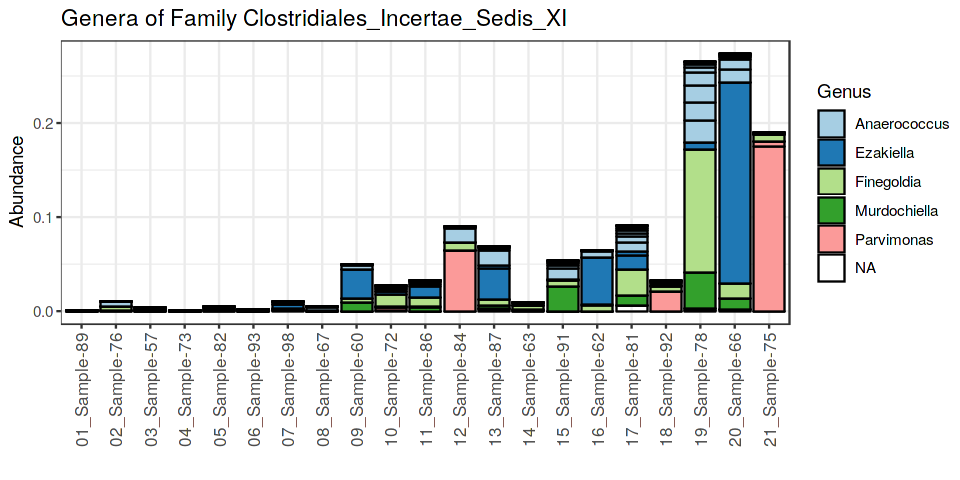

In [198]:
p_ClosXI <- subset_taxa(psN2, Family == 'Clostridiales_Incertae_Sedis_XI') %>%
plot_bar( x = 'newname', fill = 'Genus') + scale_fill_manual(values = cb10) + xlab("") +
ggtitle("Genera of Family Clostridiales_Incertae_Sedis_XI")+ theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90)))
p_ClosXI
ggsave('figures/Clostridiales_Incertae_Sedis_XI_Genus.png')

Saving 6.67 x 6.67 in image


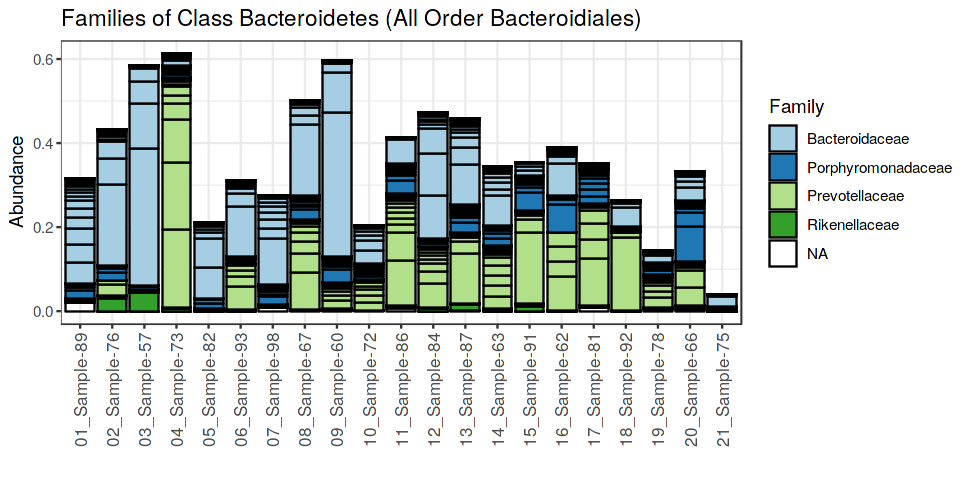

In [199]:

p_Bact <- subset_taxa(psN2, Phylum == 'Bacteroidetes') %>%
plot_bar( x = 'newname', fill = 'Family') + scale_fill_manual(values = cb10) + xlab("") +
ggtitle("Families of Class Bacteroidetes (All Order Bacteroidiales)")+ theme_bw() +
theme(axis.text.x = element_text(angle = 90, hjust = 1,, vjust = 0.5, size = 10),
     strip.text.y = (element_text(angle = 90)))
p_Bact
ggsave('figures/Bacteroides.png')

In [200]:
lay <- rbind(c(1,2), c(3,4))

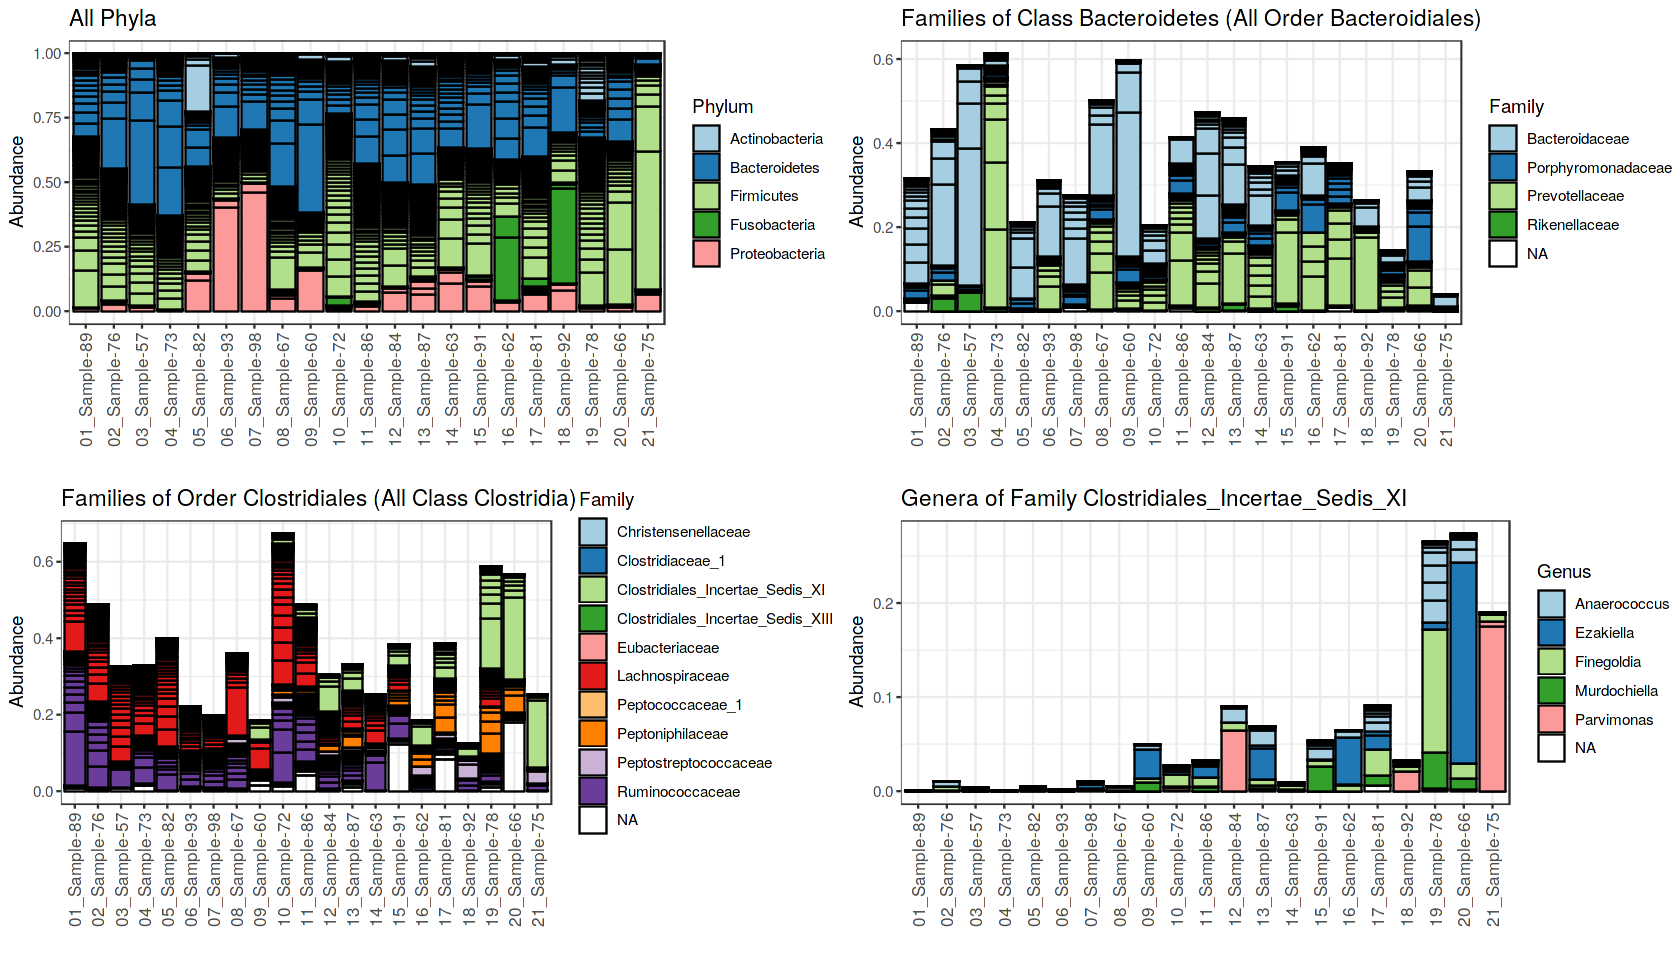

In [201]:
options(repr.plot.width=14, repr.plot.height= 8)
grid.arrange(p_phy, p_Bact,p_clostridia,p_ClosXI, layout_matrix = lay)

In [202]:
stacked_bars <- arrangeGrob(
    p_phy, p_Bact,p_clostridia,p_ClosXI, layout_matrix = lay
)
ggsave('figures/stacked_bars.png', stacked_bars, width = 14, height = 8)
ggsave('figures/stacked_bars.svg', stacked_bars, width = 14, height = 8)

# Exporting OTU tables and Taxa tables at each agglomeration level

In [203]:
psDf %>%
mutate(OTU = map(ps, ~data.frame(otu_table(.)))) %>%
mutate(Tax = map(ps, ~data.frame(tax_table(.)))) %>%
mutate(OTUCount = map (psCount, ~data.frame(otu_table(.)))) %>%
pass -> psDf1


In [204]:
psDf1 %>%
.[1:5,] %>%
mutate(Tax = map(Tax, ~dplyr::select(.,-oldname2))) %>%
print

# A tibble: 5 x 12
  taxLevels ntaxa psCount ps    jsd   jsdMat kjsd  psNoZero clr   OTU   Tax  
  <chr>     <int> <list>  <lis> <lis> <list> <lis> <list>   <lis> <lis> <lis>
1 Phylum        5 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
2 Class        12 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
3 Order        17 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
4 Family       39 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
5 Genus       104 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
# … with 1 more variable: OTUCount <list>


In [205]:
# https://stackoverflow.com/questions/50341012/return-the-mapped-object-if-expression-inside-of-purrrpossibly-fails/50341205#50341205
rm_oldname2 <- function(x){
    f = possibly(function() dplyr::select(x, -oldname2), otherwise = x)
        f()
}

In [206]:
psDf1 %>%
#.[1:5,] %>%
mutate(Tax = map(Tax, rm_oldname2)) %>%
pass -> psDf1b

In [207]:
print(psDf1)

# A tibble: 6 x 12
  taxLevels ntaxa psCount ps    jsd   jsdMat kjsd  psNoZero clr   OTU   Tax  
  <chr>     <int> <list>  <lis> <lis> <list> <lis> <list>   <lis> <lis> <lis>
1 Phylum        5 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
2 Class        12 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
3 Order        17 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
4 Family       39 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
5 Genus       104 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
6 Species     651 <S4: p… <S4:… <S3:… <dbl … <dbl… <S4: ph… <S4:… <dat… <dat…
# … with 1 more variable: OTUCount <list>


In [208]:
# Show which species level OTUs are contained in each agglomerated group:
psDf1b %>%
.[1:5,] %>%
mutate(TaxIdx = map(Tax, function(df){
    df %>%
    mutate(tag = as.character(tag), oldGroups = as.character(oldGroups)) %>%
    dplyr::select(tag, oldGroups) %>%
    mutate(oldGroups = strsplit(oldGroups, ",")) %>%
    unnest(oldGroups)
})) %>%
dplyr::select(taxLevels, TaxIdx) %>%
unnest(TaxIdx) %>%
mutate(oldGroups = trimws(oldGroups)) %>% # Some of these have leading or trailing whitespace
spread(taxLevels, tag) %>%
dplyr::select(oldGroups, Phylum, Class, Order, Family, Genus) %>%
pass -> taxGroupMapping
write_csv(taxGroupMapping, 'tables/taxGroupMapping.csv')

In [209]:
# Print out each otu table (relative abundances).
walk2(psDf1b$taxLevels, psDf1b$OTU, 
      ~write.csv(.y, file = paste0("tables/OTU/otu_",.x, ".csv")))

In [210]:
# Print out each otu table (counts).
walk2(psDf1b$taxLevels, psDf1b$OTUCount, 
      ~write.csv(.y, file = paste0("tables/OTU/otuCount_",.x, ".csv")))

In [211]:
# Print out each taxonomy table.
walk2(psDf1b$taxLevels, psDf1b$Tax, 
      ~write_csv(.y, path = paste0("tables/Tax/tax_",.x, ".csv")))

In [212]:
save.image(file = "workspace.Rdata")